In [265]:
import pandas as pd
df=pd.read_csv('default_of_credit_card_clients.csv')
import numpy as np

In [266]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [267]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
0  798fc410-45c1      20000    2          2         1   24     2      2   
1  8a8c8f3b-8eb4     120000    2          2         2   26    -1      2   
2  85698822-43f5      90000    2          2         2   34     0      0   
3  0737c11b-be42      50000    2          2         1   37     0      0   
4  3b7f77cc-dbc0      50000    1          2         1   57    -1      0   

   PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1     -1  ...          0          0          0         0       689   
1      0      0  ...       3272       3455       3261         0      1000   
2      0      0  ...      14331      14948      15549      1518      1500   
3      0      0  ...      28314      28959      29547      2000      2019   
4     -1      0  ...      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0         0                           1  
1      1000      1000         0      2000                           1  
2      1000      1000      1000      5000                           0  
3      1200      1100      1069      1000                           0  
4     10000      9000       689       679                           0  

[5 rows x 25 columns]

In [268]:
df.shape

(30000, 25)

In [269]:
df['ID'].nunique()

29687

In [270]:
id_counts = df['ID'].value_counts()
id_counts.head()

ae6a7eed-bb58    2
08425e64-bf76    2
956cbf4a-d24e    2
30729bb5-55d7    2
16ee3668-0b5b    2
Name: ID, dtype: int64

In [271]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [272]:
np.random.seed(seed=24)
random_integers = np.random.randint(low=1,high=5,size=100)
is_equal_to_3 = random_integers == 3
is_equal_to_3[:5]
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [273]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

ae6a7eed-bb58    True
08425e64-bf76    True
956cbf4a-d24e    True
30729bb5-55d7    True
16ee3668-0b5b    True
Name: ID, dtype: bool

In [274]:
id_counts.index[0:5]


Index(['ae6a7eed-bb58', '08425e64-bf76', '956cbf4a-d24e', '30729bb5-55d7',
       '16ee3668-0b5b'],
      dtype='object')

In [275]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [276]:
dupe_ids[0:5]


['ae6a7eed-bb58',
 '08425e64-bf76',
 '956cbf4a-d24e',
 '30729bb5-55d7',
 '16ee3668-0b5b']

In [277]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
1840   08425e64-bf76      70000    2          2         1   31     0      0   
1940   08425e64-bf76          0    0          0         0    0     0      0   
11731  ae6a7eed-bb58      20000    1          2         1   51     0      0   
11831  ae6a7eed-bb58          0    0          0         0    0     0      0   
21588  956cbf4a-d24e     500000    2          1         2   37    -2     -2   
21688  956cbf4a-d24e          0    0          0         0    0     0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
1840       0      0  ...      41127      39137      28712      1834      1608   
1940       0      0  ...          0          0          0         0         0   
11731      0      0  ...      18235      16259      10640      1355      1136   
11831      0      0  ...          0          0          0         0         0   
21588     -2     -2  ...        813          0       4443      2579      3824   
21688      0      0  ...          0          0          0         0         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1840       1559      1630      1300      1000                           0  
1940          0         0         0         0                           0  
11731       646       381       337      1251                           0  
11831         0         0         0         0                           0  
21588       813         0      4443       330                           0  
21688         0         0         0         0                           0  

[6 rows x 25 columns]

In [278]:
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
print(df_clean_1.shape)

(30000, 25)


In [279]:
df_clean_1['ID'].nunique()

29687

In [280]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [281]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [282]:
df_clean_1['PAY_1'].value_counts()

0                13402
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [283]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [284]:
sum(valid_pay_1_mask)

26979

In [285]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26979, 25)

In [286]:
df_clean_2['PAY_1'].value_counts()

0     13402
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: PAY_1, dtype: int64

In [287]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26979 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26979 non-null  int64
 1   PAY_2   26979 non-null  int64
dtypes: int64(2)
memory usage: 632.3 KB


In [288]:
import matplotlib.pyplot as plt #import plotting package
 
#render plotting automatically
%matplotlib inline
 
import matplotlib as mpl #additional plotting functionality
 
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

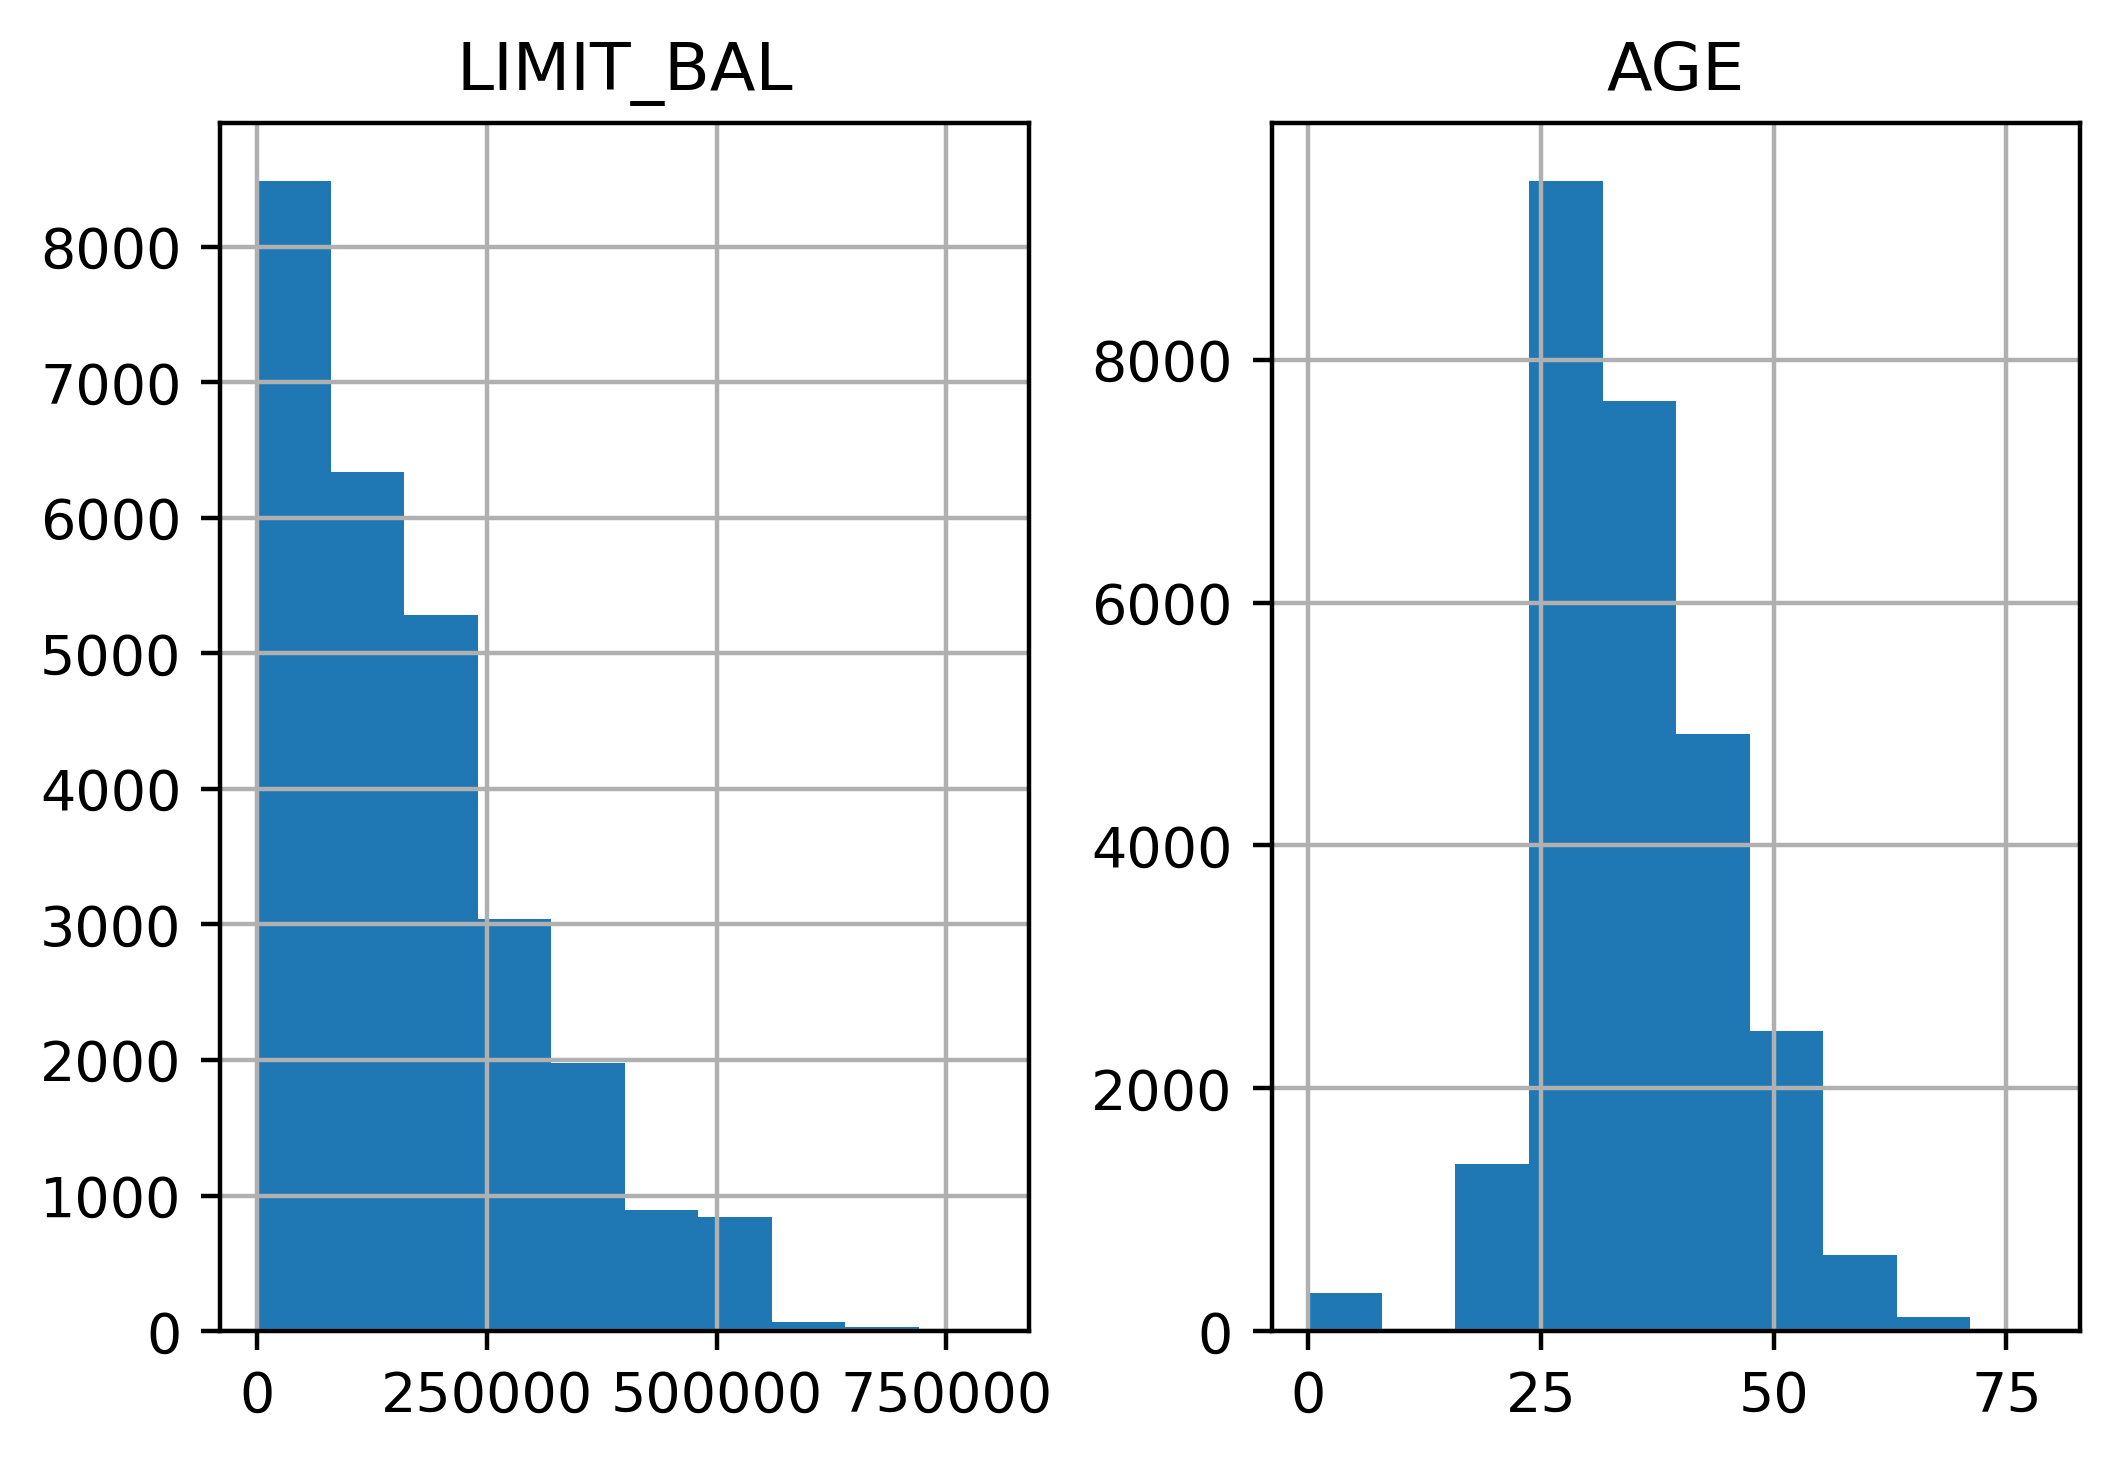

In [289]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [290]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

LIMIT_BAL           AGE
count   26979.000000  26979.000000
mean   165958.474369     35.090663
std    130333.534550      9.934731
min         0.000000      0.000000
25%     50000.000000     28.000000
50%    140000.000000     34.000000
75%    240000.000000     41.000000
max    800000.000000     79.000000

In [291]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
0      326
5      245
4      115
6       43
Name: EDUCATION, dtype: int64

In [292]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      729
Name: EDUCATION, dtype: int64

In [293]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
0      363
3      286
Name: MARRIAGE, dtype: int64

In [294]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      649
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

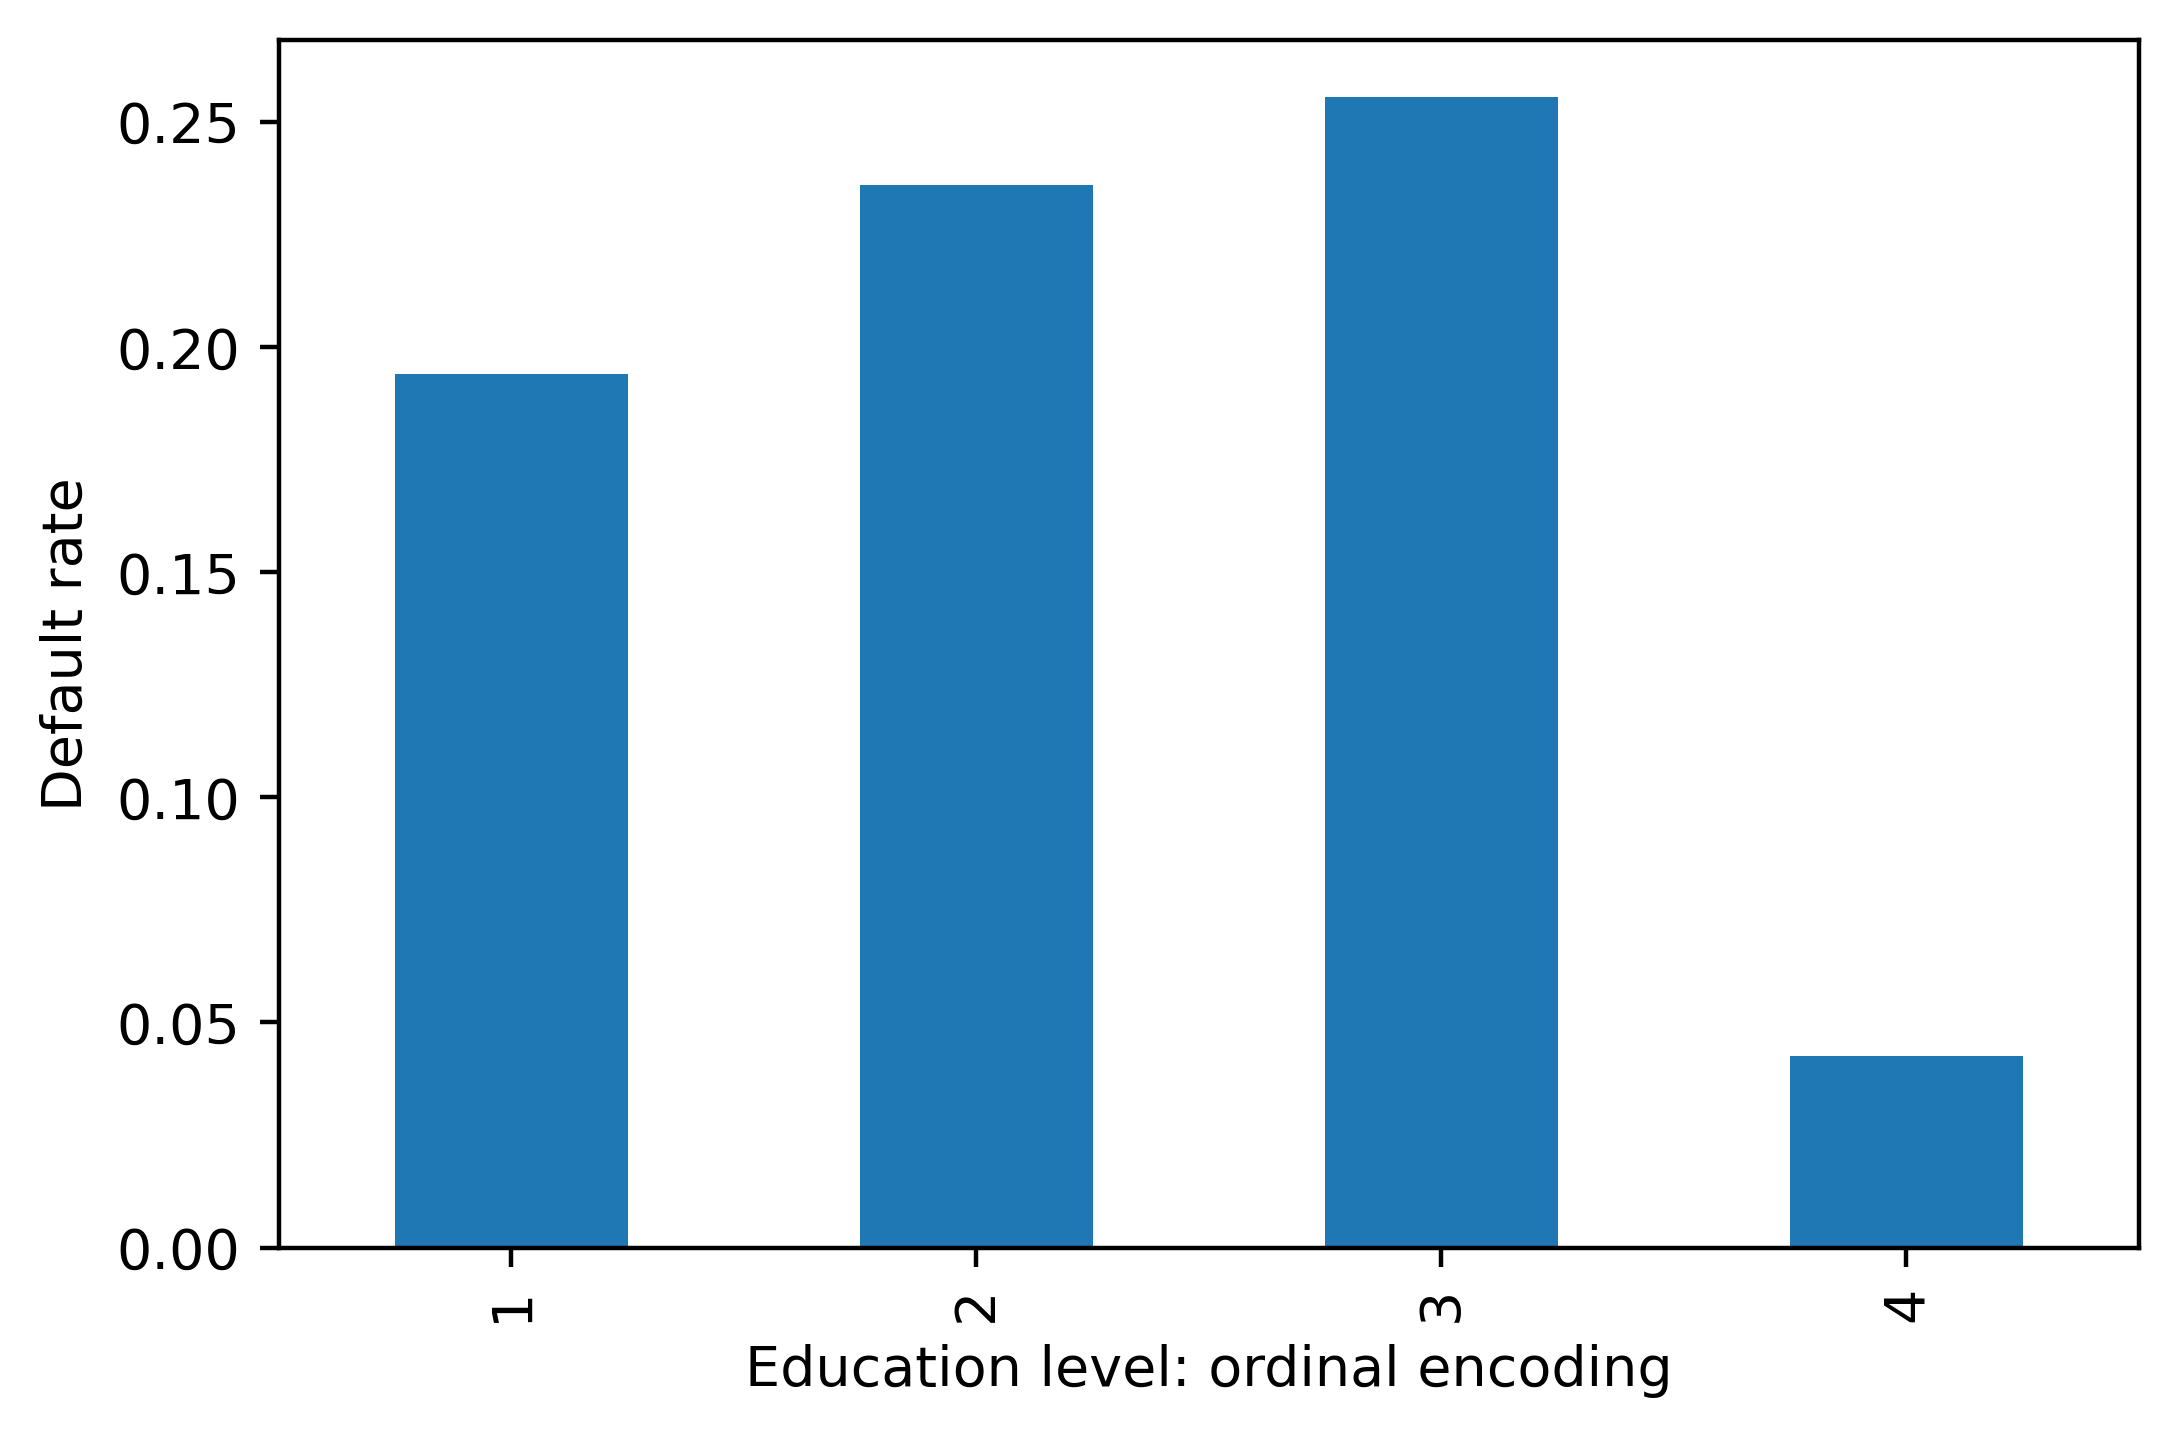

In [295]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [296]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [297]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

EDUCATION EDUCATION_CAT
0          2          none
1          2          none
2          2          none
3          2          none
4          2          none
5          1          none
6          1          none
7          2          none
8          3          none
9          3          none

In [298]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [299]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

EDUCATION    EDUCATION_CAT
0          2       university
1          2       university
2          2       university
3          2       university
4          2       university
5          1  graduate school
6          1  graduate school
7          2       university
8          3      high school
9          3      high school

In [300]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

graduate school  high school  others  university
0                0            0       0           1
1                0            0       0           1
2                0            0       0           1
3                0            0       0           1
4                0            0       0           1
5                1            0       0           0
6                1            0       0           0
7                0            0       0           1
8                0            1       0           0
9                0            1       0           0

In [301]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

EDUCATION_CAT  graduate school  high school  university  others
0       university                0            0           1       0
1       university                0            0           1       0
2       university                0            0           1       0
3       university                0            0           1       0
4       university                0            0           1       0
5  graduate school                1            0           0       0
6  graduate school                1            0           0       0
7       university                0            0           1       0
8      high school                0            1           0       0
9      high school                0            1           0       0

In [302]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

In [303]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [304]:
df[pay_feats].describe()

PAY_2         PAY_3         PAY_4         PAY_5         PAY_6
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000
mean      -0.132867     -0.164333     -0.219300     -0.263900     -0.288033
std        1.191215      1.191096      1.162348      1.127519      1.144981
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000      0.000000
max        8.000000      8.000000      8.000000      8.000000      8.000000

In [305]:
df[pay_feats[0]].value_counts().sort_index()

-1                5047
-2                2476
0                13402
1                 3261
2                 2378
3                  292
4                   63
5                   23
6                   11
7                    9
8                   17
Not available     3021
Name: PAY_1, dtype: int64

<AxesSubplot:>

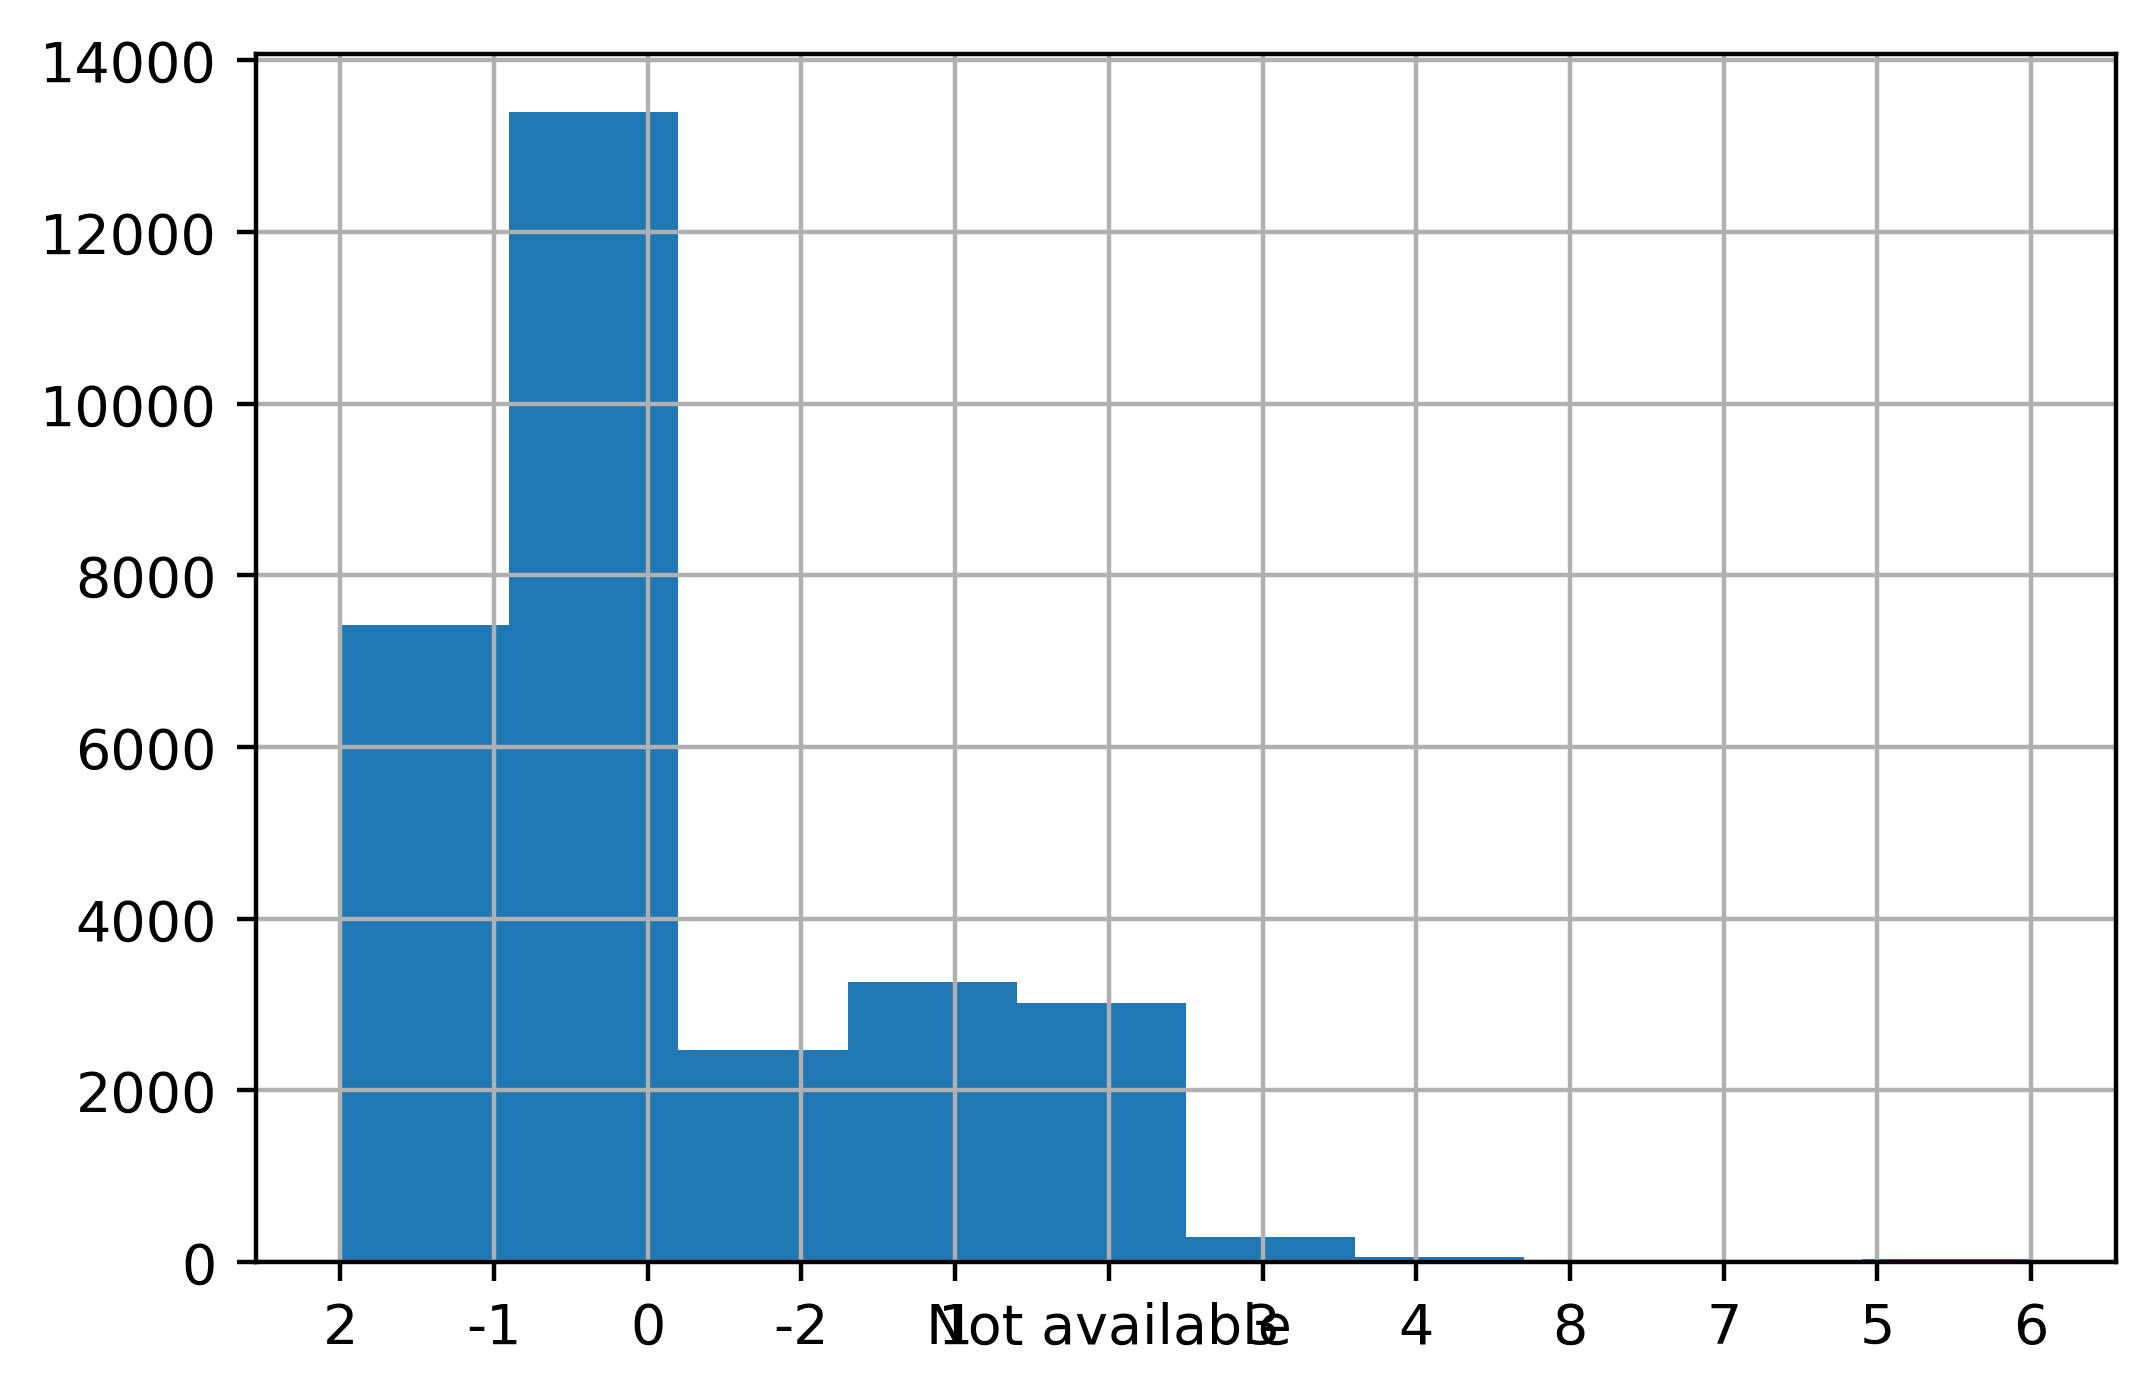

In [306]:
df[pay_feats[0]].hist()

In [307]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

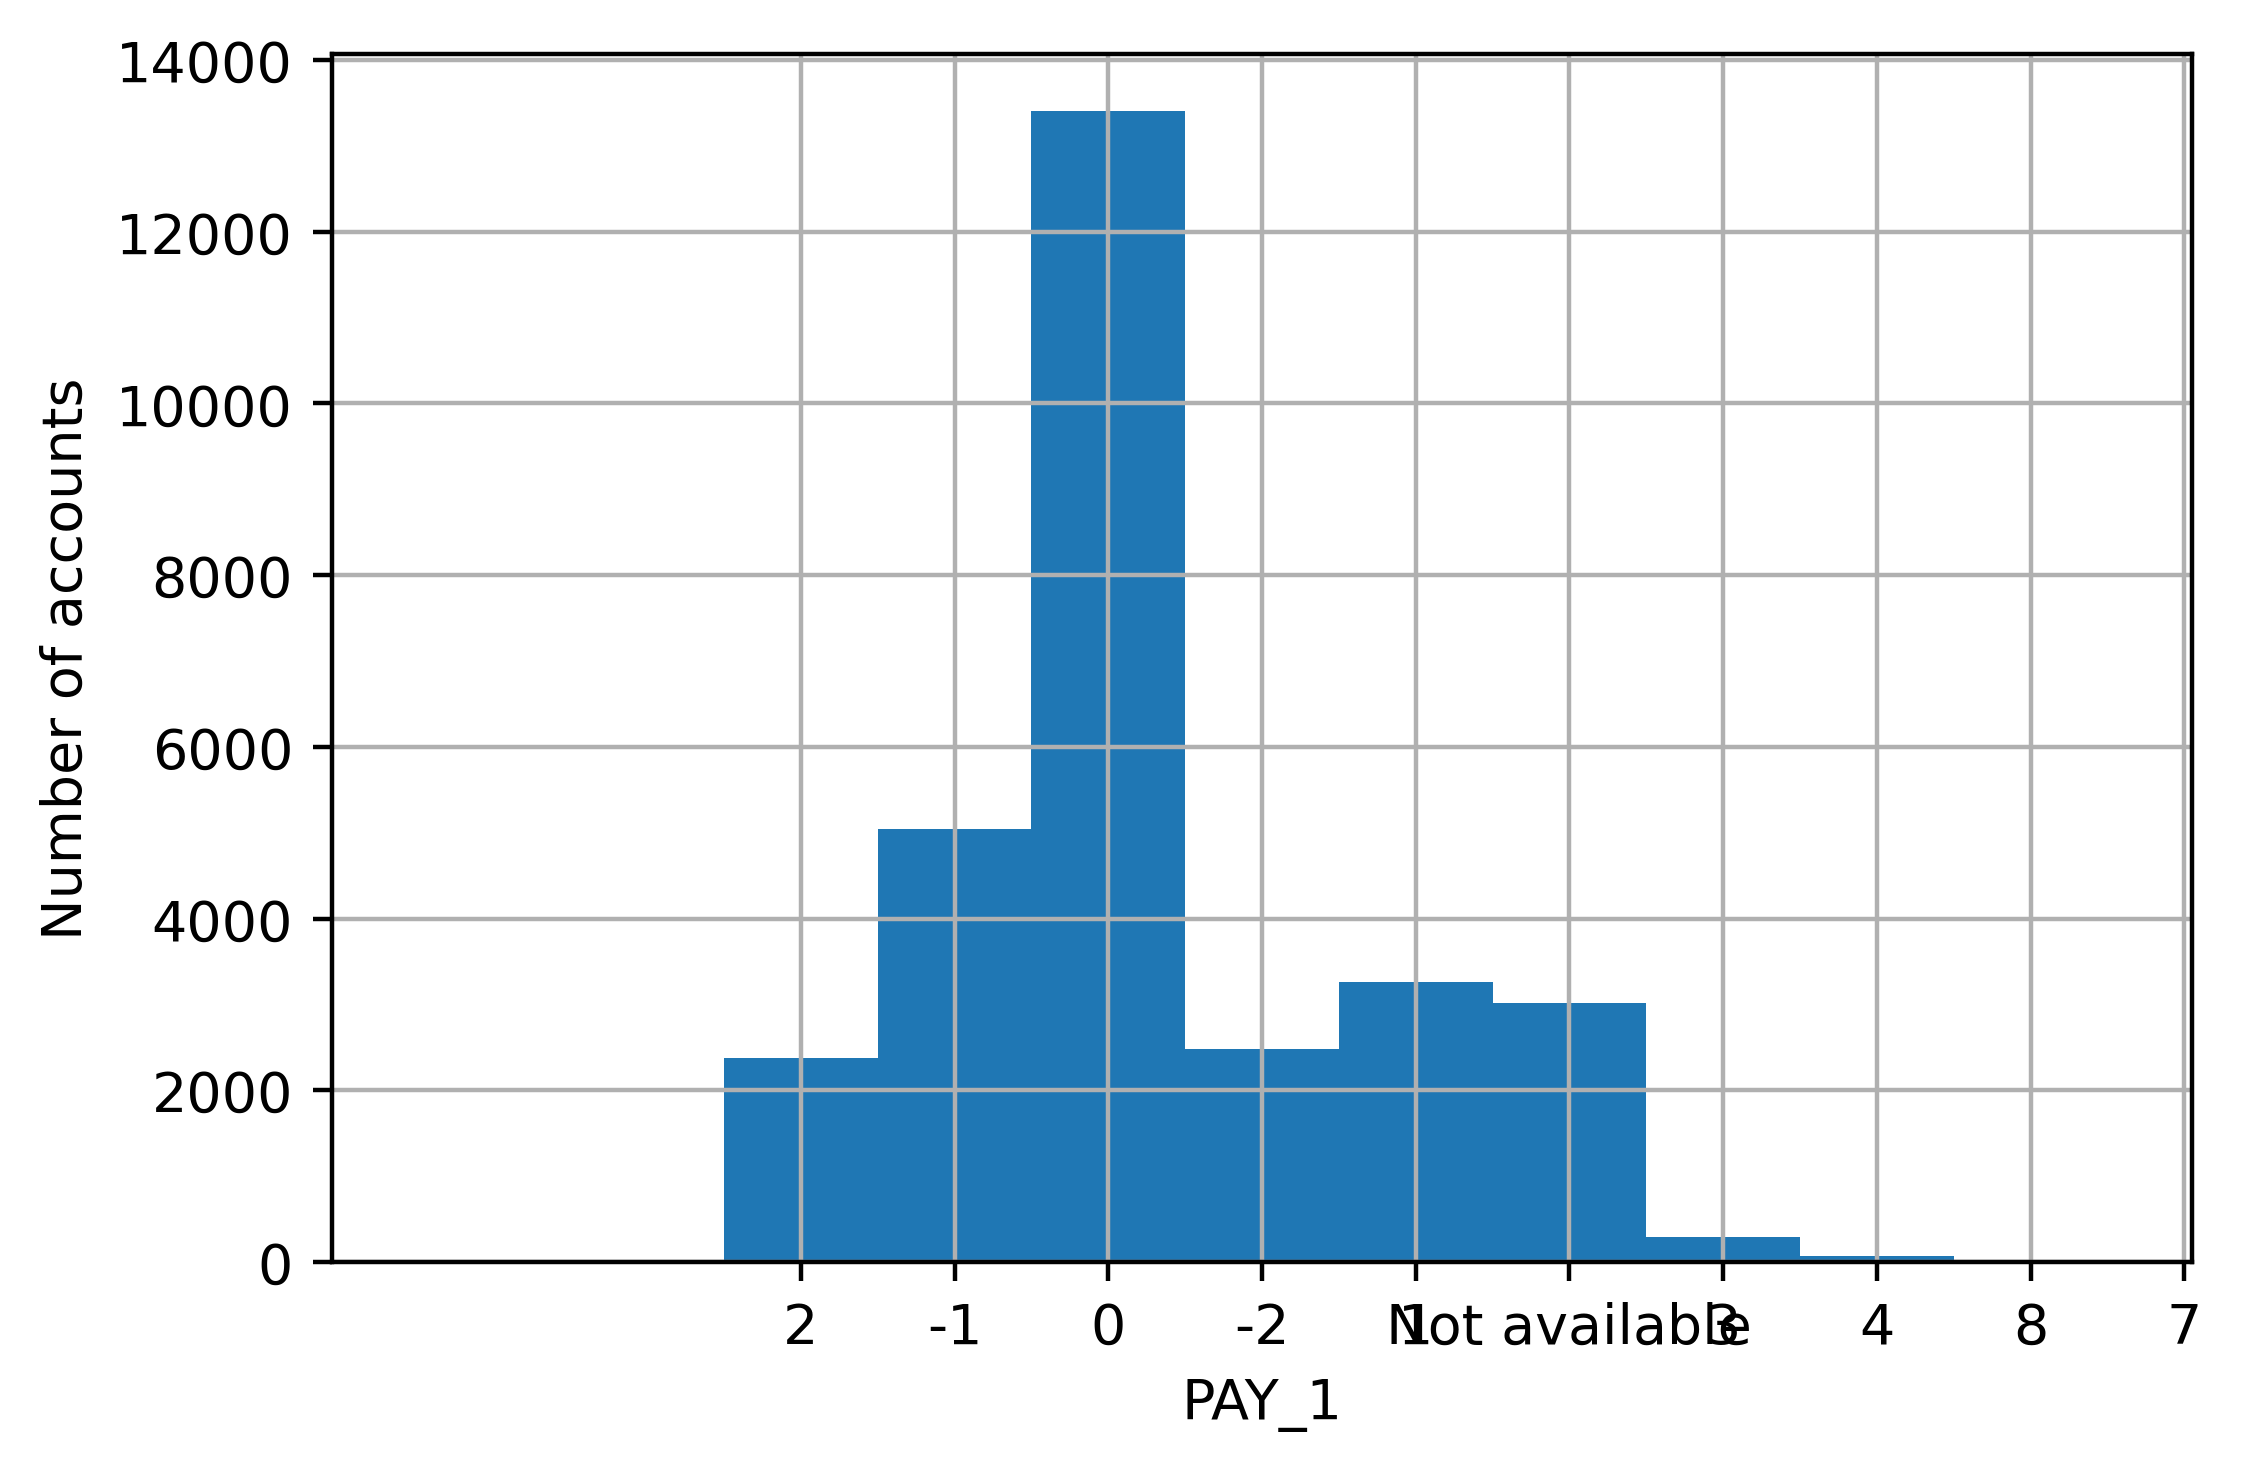

In [308]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>, <AxesSubplot:>]],
      dtype=object)

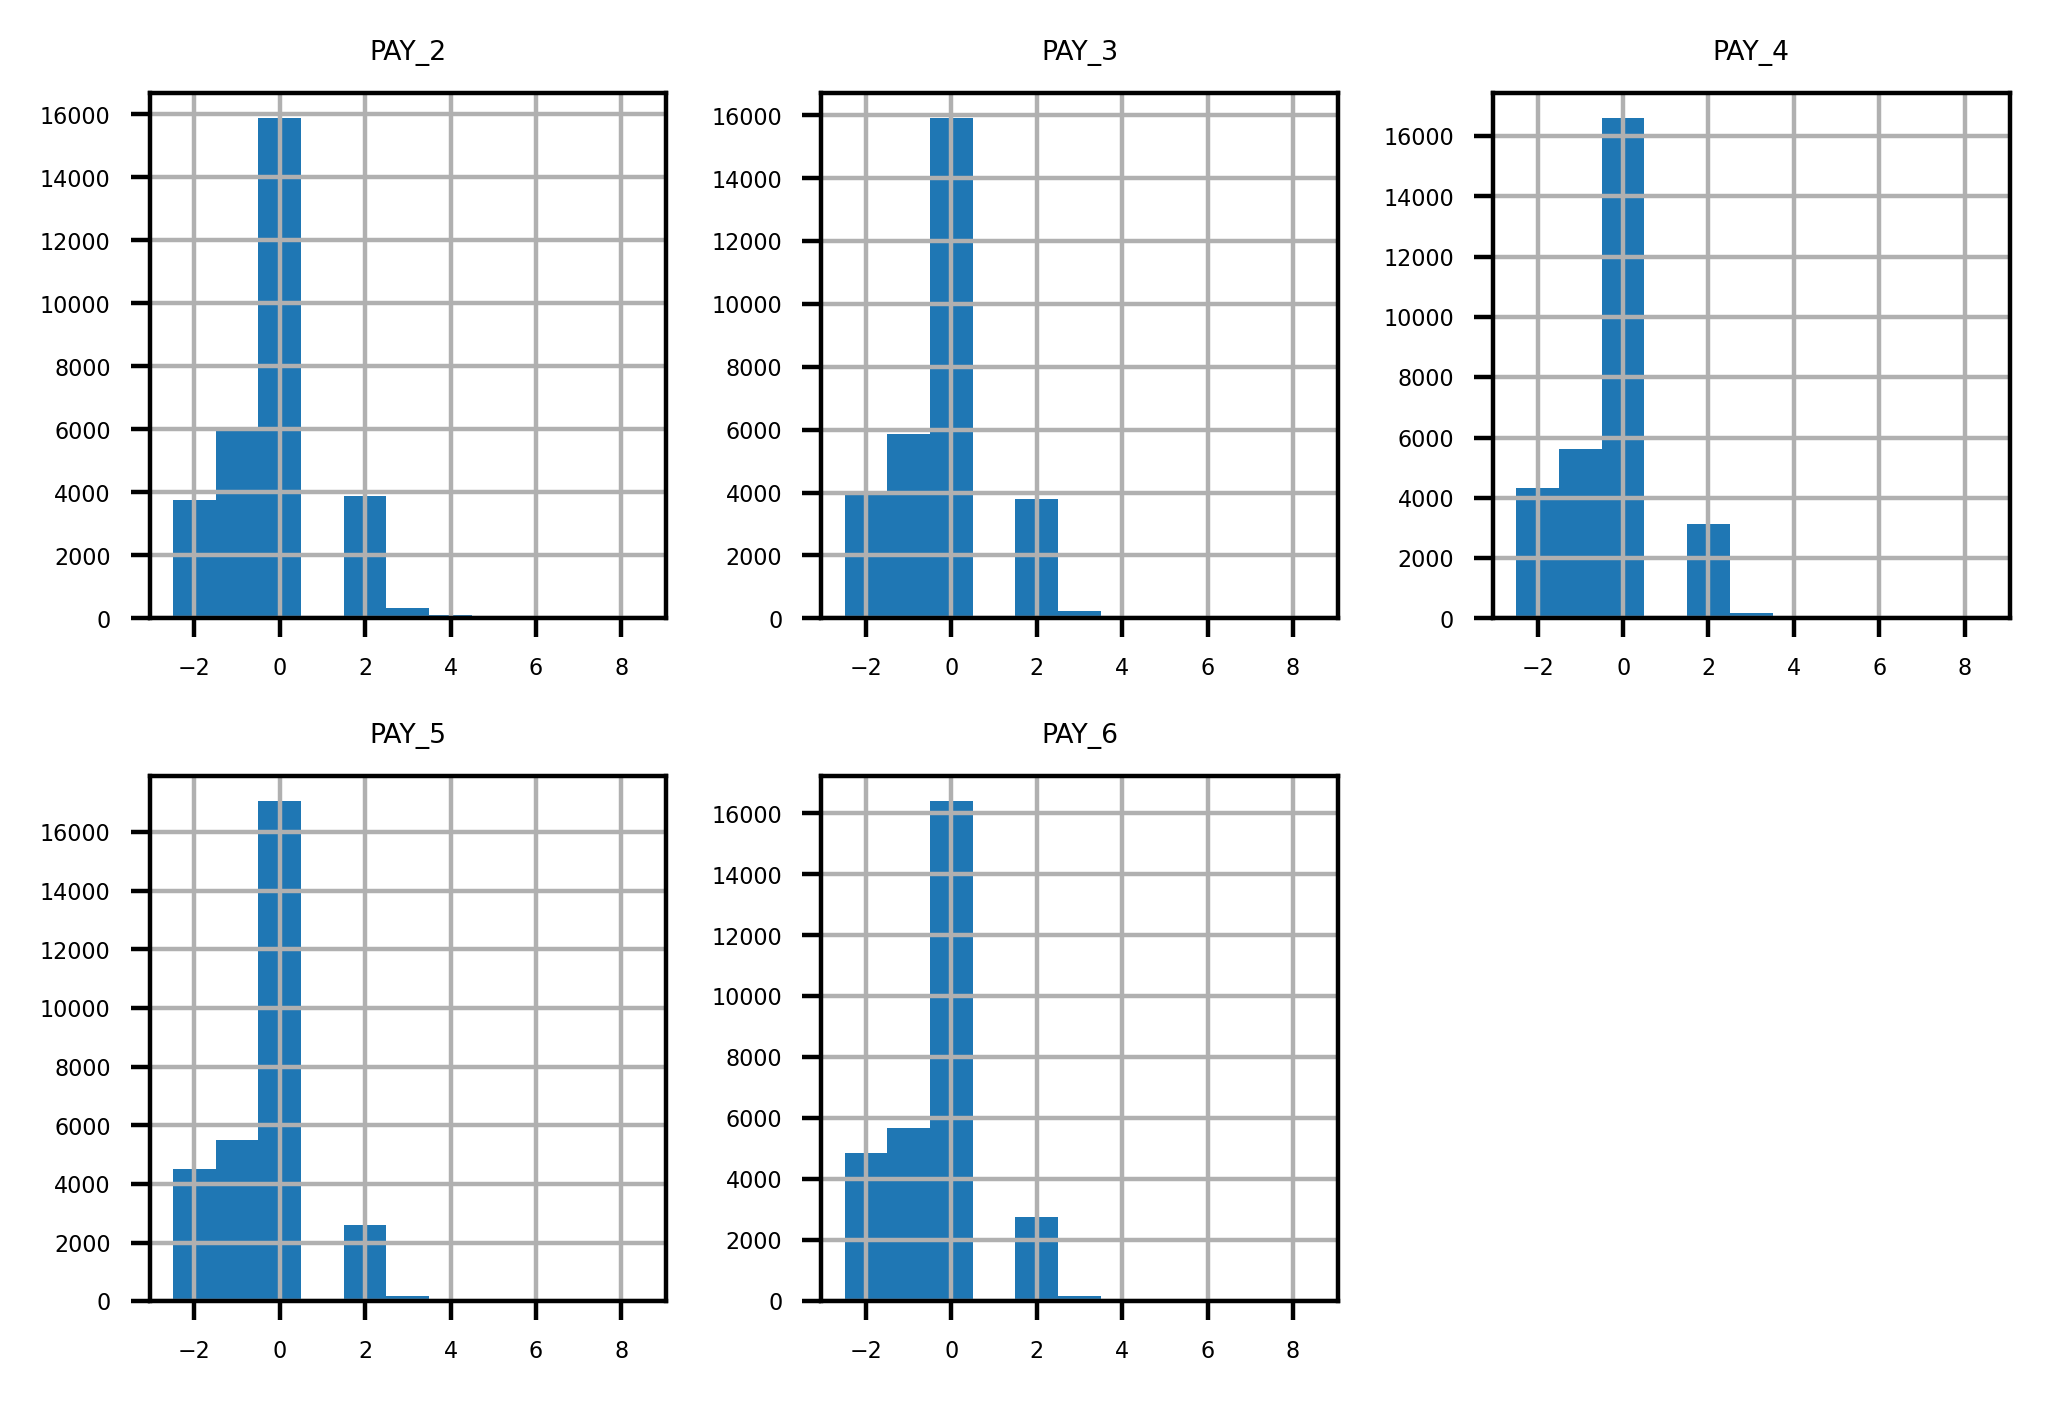

In [309]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [310]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

PAY_2  PAY_3
0       2     -1
1       2      0
13      2      2
15      2      0
50      2      2

In [311]:
paya_feats = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [312]:
df[paya_feats].describe()

PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.000000   30000.000000   
mean     5613.321500  5.855410e+03    5174.387967    4776.089733   
std     16539.094312  2.299256e+04   17565.538305   15532.893047   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%       836.000000  7.217500e+02     371.000000     223.000000   
50%      2084.500000  2.000000e+03    1776.000000    1500.000000   
75%      5000.000000  5.000000e+03    4500.000000    4000.000000   
max    873552.000000  1.684259e+06  896040.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4754.749200    5164.223267  
std     15239.070708   17712.664703  
min         0.000000       0.000000  
25%       170.750000       9.000000  
50%      1500.000000    1500.000000  
75%      4000.000000    4000.000000  
max    426529.000000  528666.000000

In [313]:
df[paya_feats].head()

PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
0         0       689         0         0         0         0
1         0      1000      1000      1000         0      2000
2      1518      1500      1000      1000      1000      5000
3      2000      2019      1200      1100      1069      1000
4      2000     36681     10000      9000       689       679

In [314]:
df[paya_feats[0]].value_counts().sort_index()

0         5504
1            9
2           14
3           15
4           18
          ... 
405016       1
423903       1
493358       1
505000       1
873552       1
Name: PAY_AMT1, Length: 7890, dtype: int64

In [315]:
paya_1_bins = np.array(range(1,8)) - 0.5
paya_1_bins

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

Text(0, 0.5, 'Number of accounts')

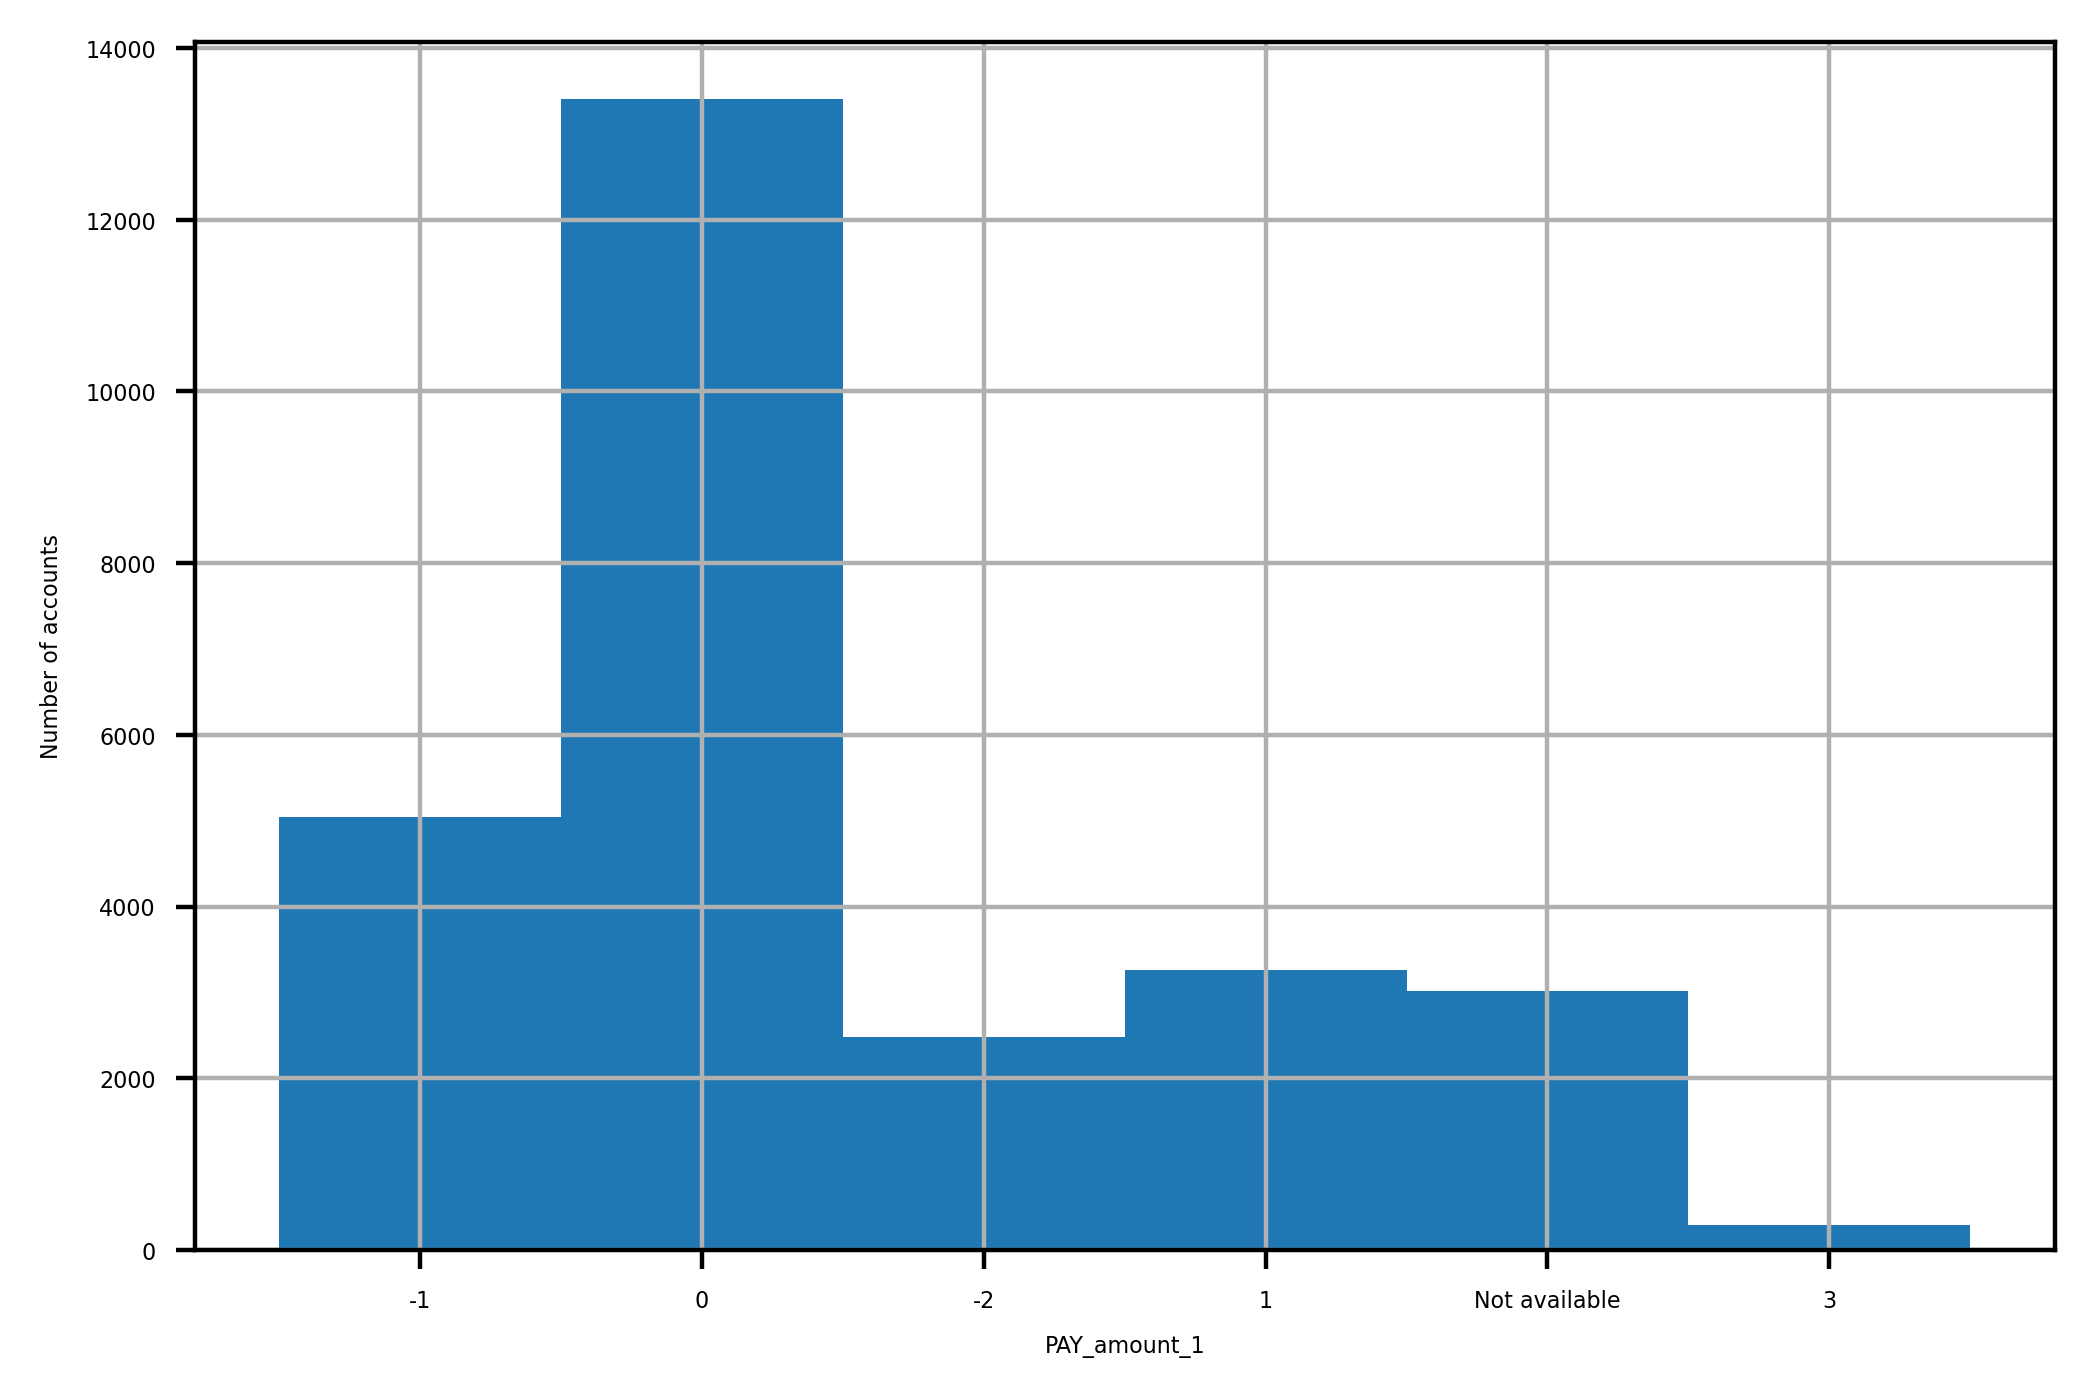

In [316]:
df[pay_feats[0]].hist(bins=paya_1_bins)
plt.xlabel('PAY_amount_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

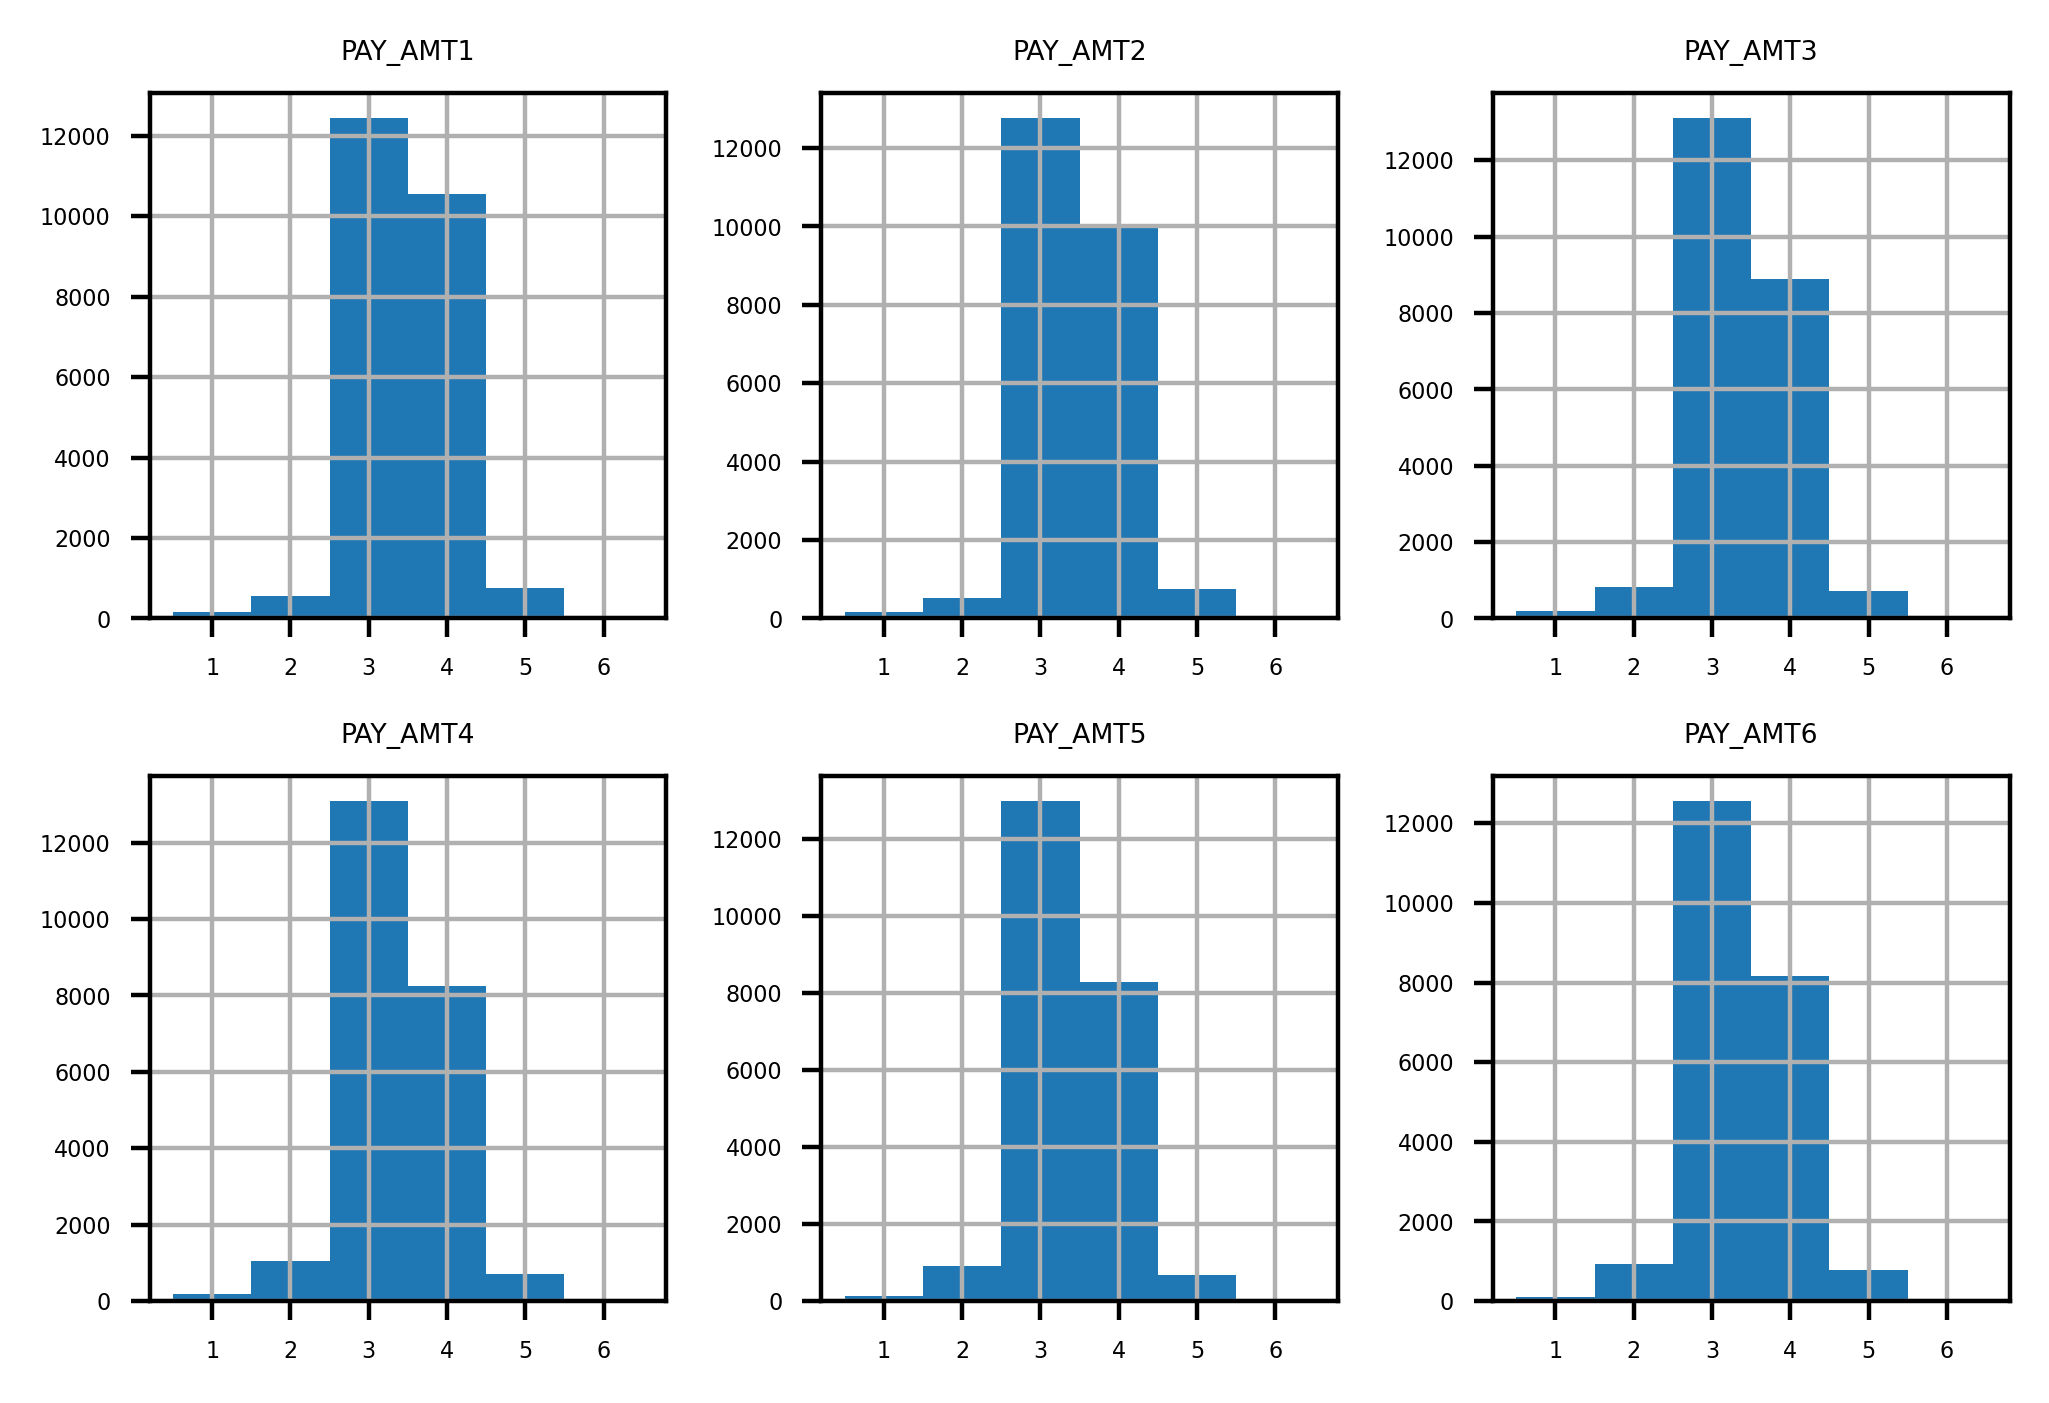

In [317]:
mpl.rcParams['font.size'] = 4
df[paya_feats].apply(np.log10).hist(bins=paya_1_bins, layout=(2,3))

In [318]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [319]:
df = pd.read_csv('cleaned_data.csv')

In [320]:
df['default payment next month'].mean()

0.21920753178398014

In [321]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    21065
1     5914
Name: ID, dtype: int64

In [322]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [323]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0)
my_new_lr.C = 0.1
my_new_lr.solver = 'newton-cg'
my_new_lr


LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [324]:
X = df['LIMIT_BAL'][0:10].values.reshape(-1,1)
X

array([[ 20000],
       [120000],
       [ 90000],
       [ 50000],
       [ 50000],
       [ 50000],
       [500000],
       [100000],
       [140000],
       [ 20000]], dtype=int64)

In [325]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [326]:
my_new_lr.fit(X, y)

C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [327]:
new_X = df['LIMIT_BAL'][10:20].values.reshape(-1,1)
new_X

array([[200000],
       [260000],
       [630000],
       [ 70000],
       [250000],
       [ 50000],
       [ 20000],
       [360000],
       [180000],
       [130000]], dtype=int64)

In [328]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [329]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [330]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [331]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

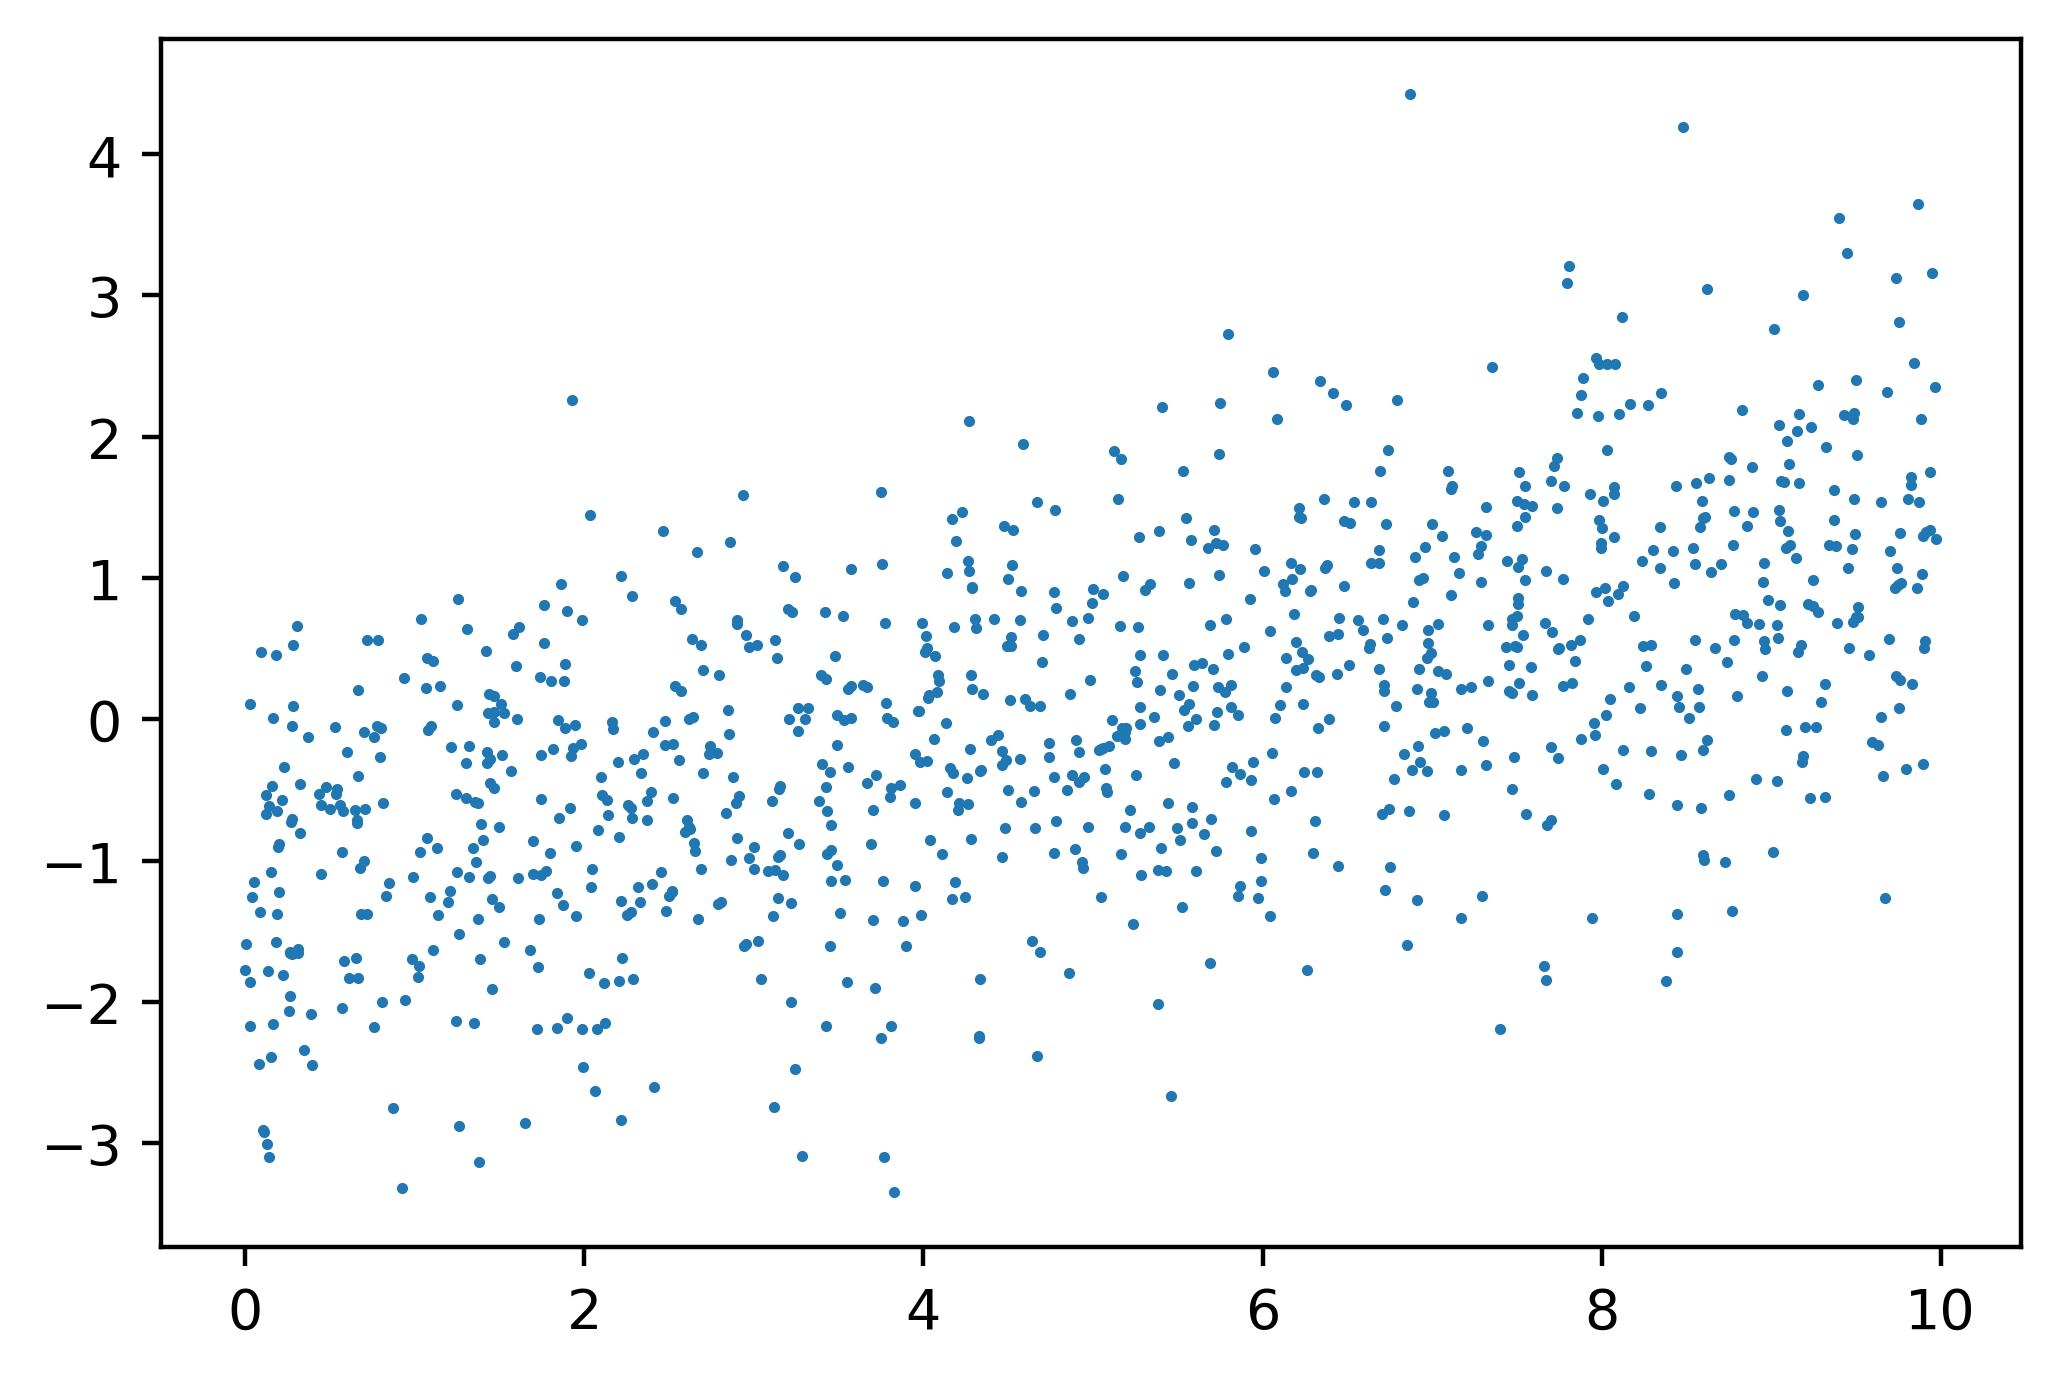

In [332]:
plt.scatter(X,y,s=1)

In [333]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [334]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [335]:
y_pred = lin_reg.predict(X.reshape(-1,1))

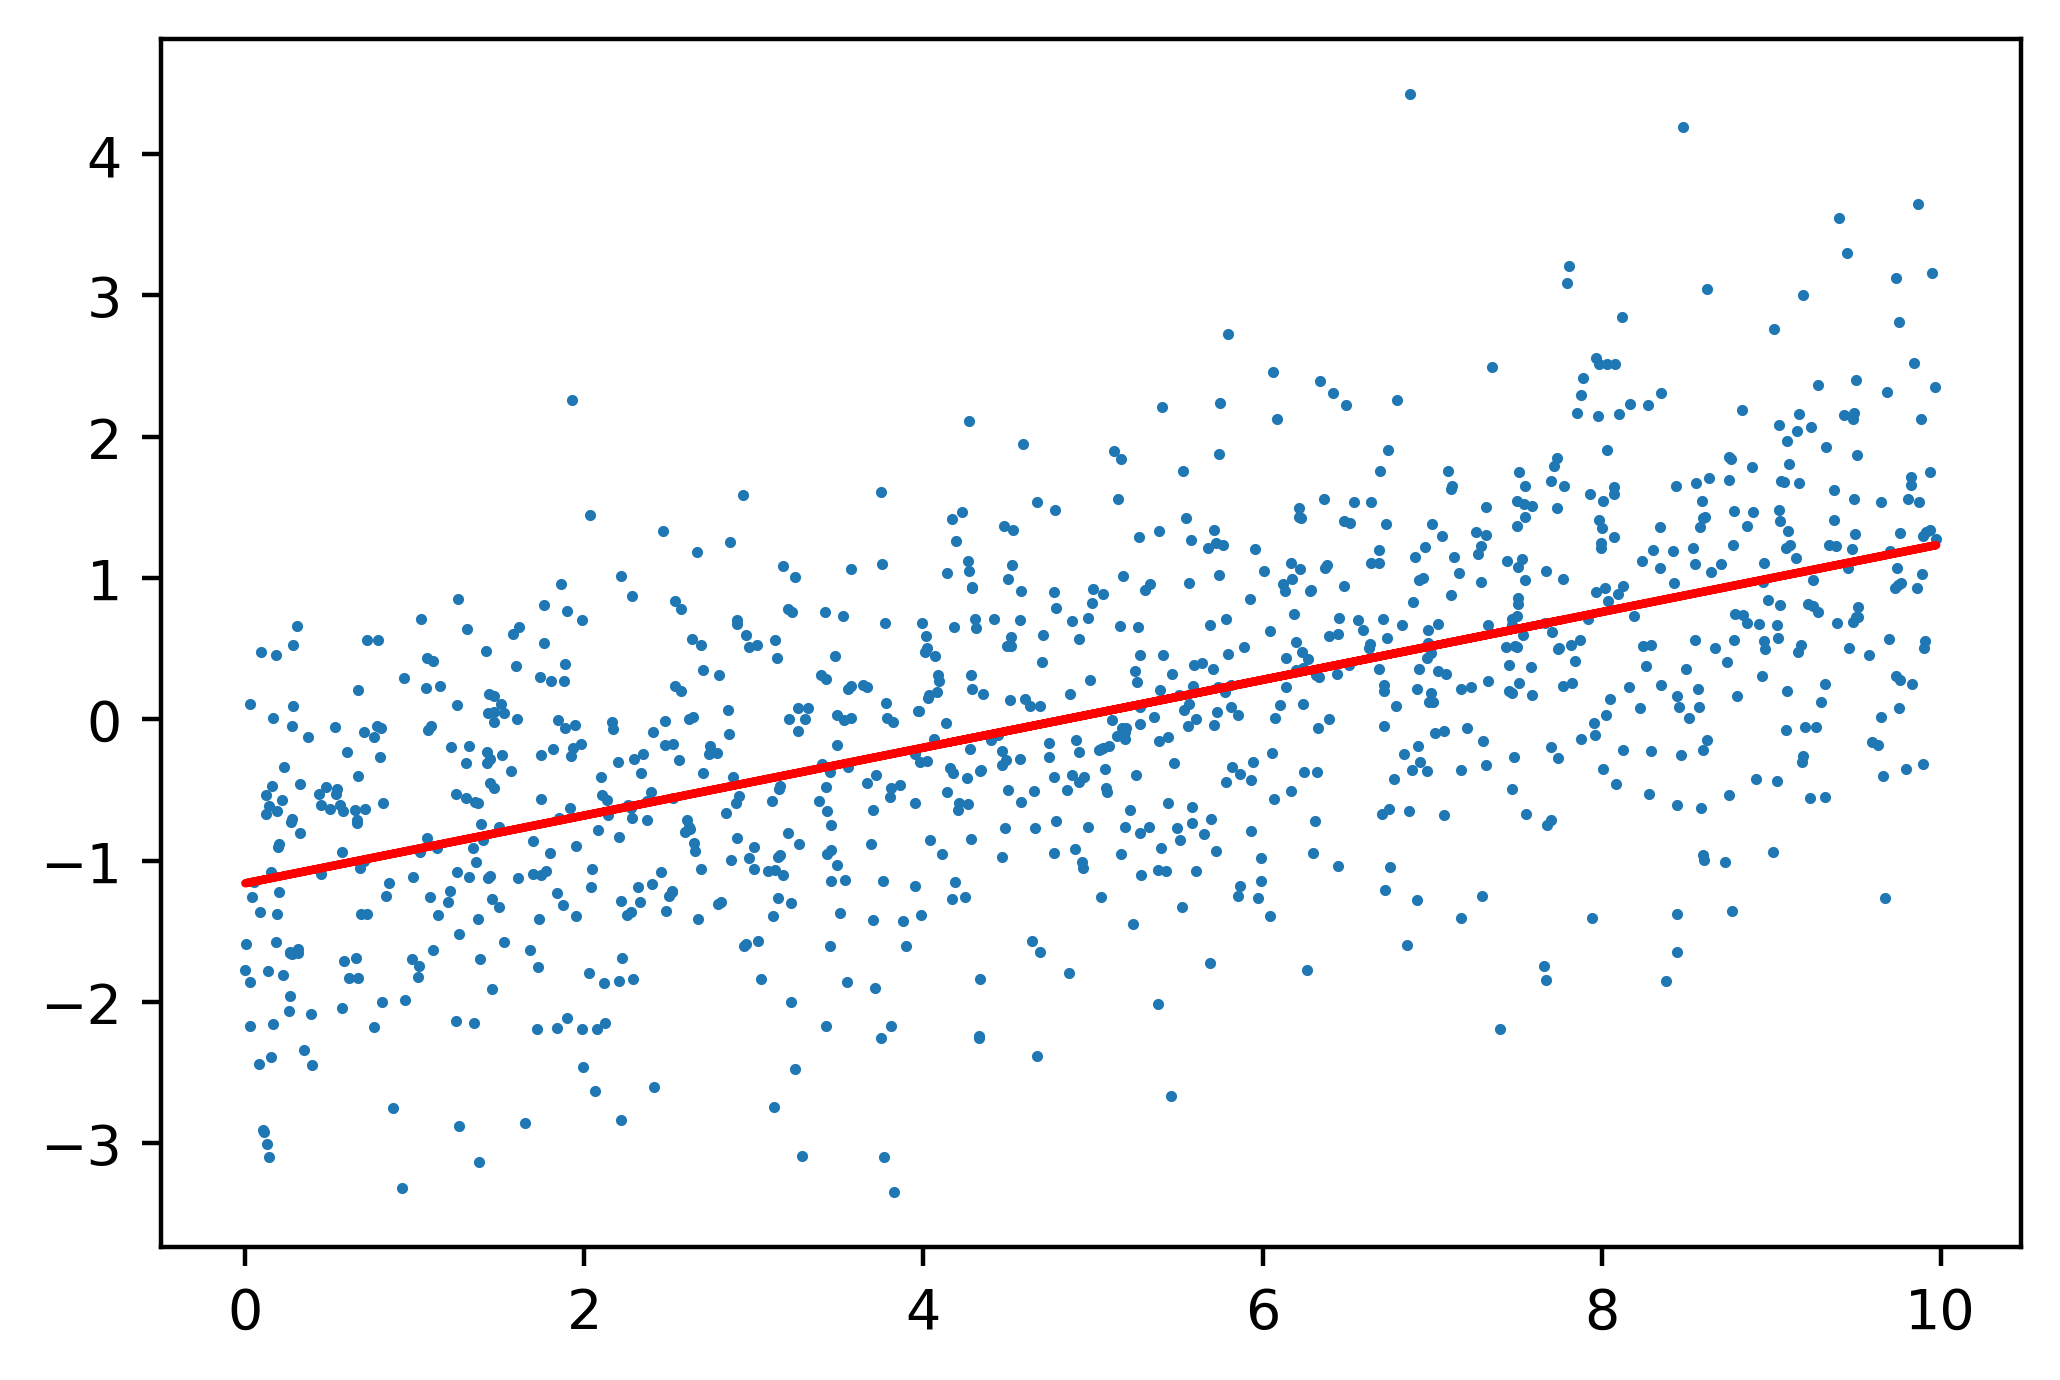

In [336]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [338]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21583, 1)
(5396, 1)
(21583,)
(5396,)


In [339]:
np.mean(y_train)

0.21970995691053144

In [340]:
np.mean(y_test)

0.21719792438843588

In [341]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='multinomial', n_jobs=None, \
                                penalty='l2', random_state=None, solver='newton-cg', tol=0.0001, \
                                verbose=0, warm_start=False)

In [342]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [343]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7828020756115641

In [344]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7828020756115641

In [345]:
P = sum(y_test)
P

1172

In [346]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [347]:
TPR = TP/P
TPR

0.0

In [348]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1172

In [349]:
FNR = FN/P
FNR

1.0

In [350]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [351]:
metrics.confusion_matrix(y_test, y_pred)

array([[4224,    0],
       [1172,    0]], dtype=int64)

In [352]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77327977, 0.22672023],
       [0.77951526, 0.22048474],
       [0.77327977, 0.22672023],
       ...,
       [0.7856268 , 0.2143732 ],
       [0.7856268 , 0.2143732 ],
       [0.77951526, 0.22048474]])

In [353]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [354]:
prob_sum.shape

(5396,)

In [355]:
np.unique(prob_sum)

array([1.])

In [356]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22672023, 0.22048474, 0.22672023, ..., 0.2143732 , 0.2143732 ,
       0.22048474])

(array([1877.,    0.,    0., 2524.,    0.,    0.,  844.,    0.,    0.,
         151.]),
 array([0.2143732 , 0.21624381, 0.21811443, 0.21998504, 0.22185565,
        0.22372627, 0.22559688, 0.2274675 , 0.22933811, 0.23120872,
        0.23307934]),
 <BarContainer object of 10 artists>)

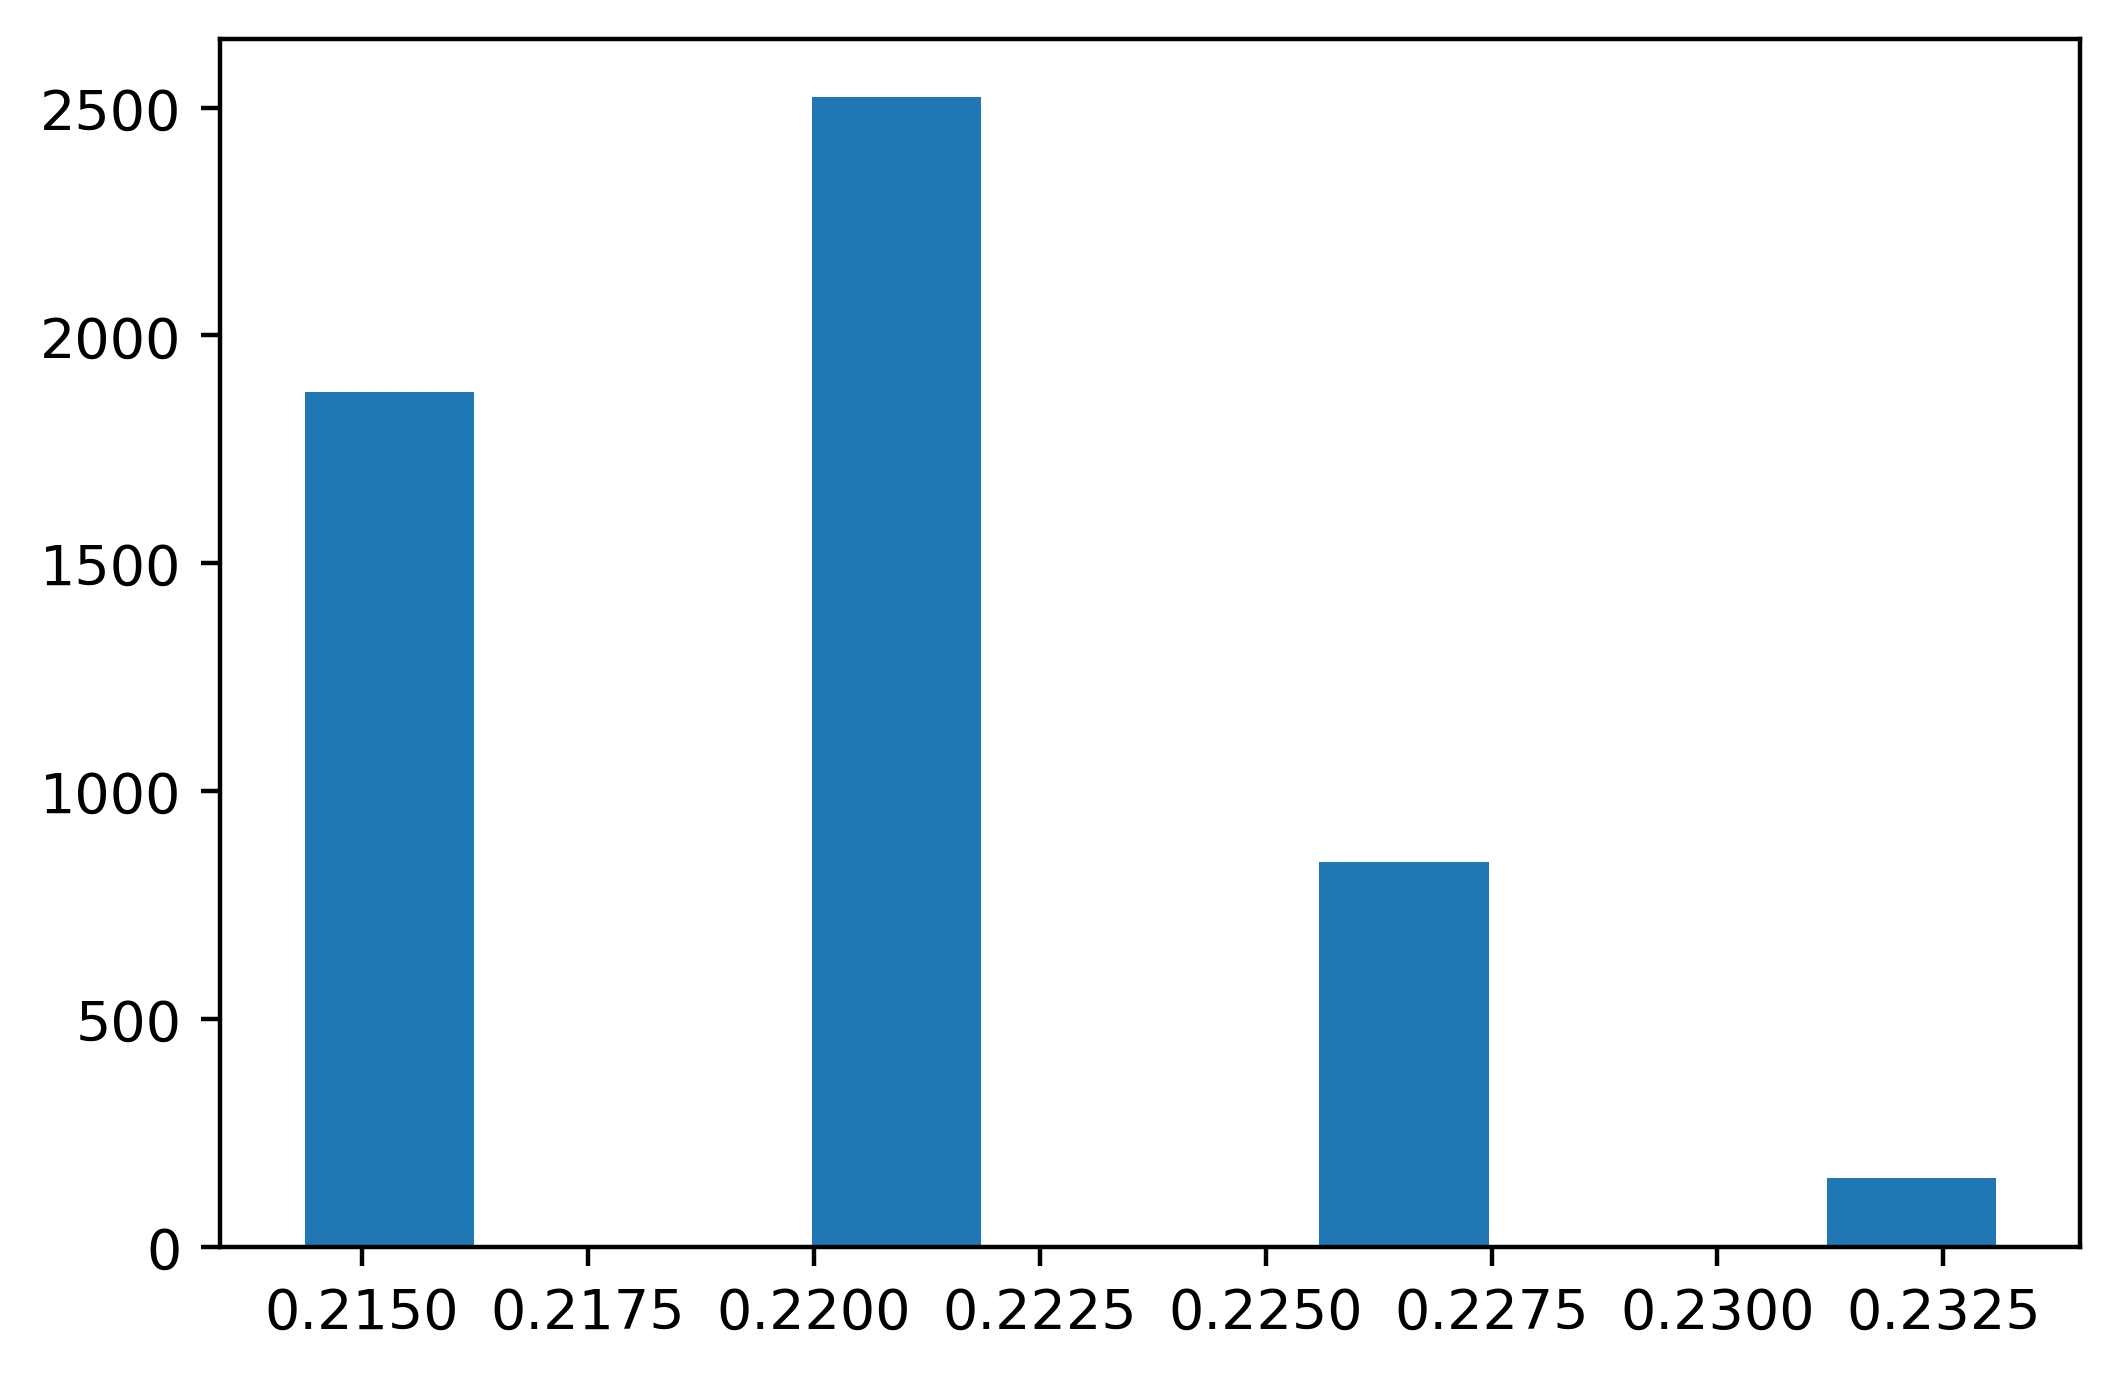

In [357]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

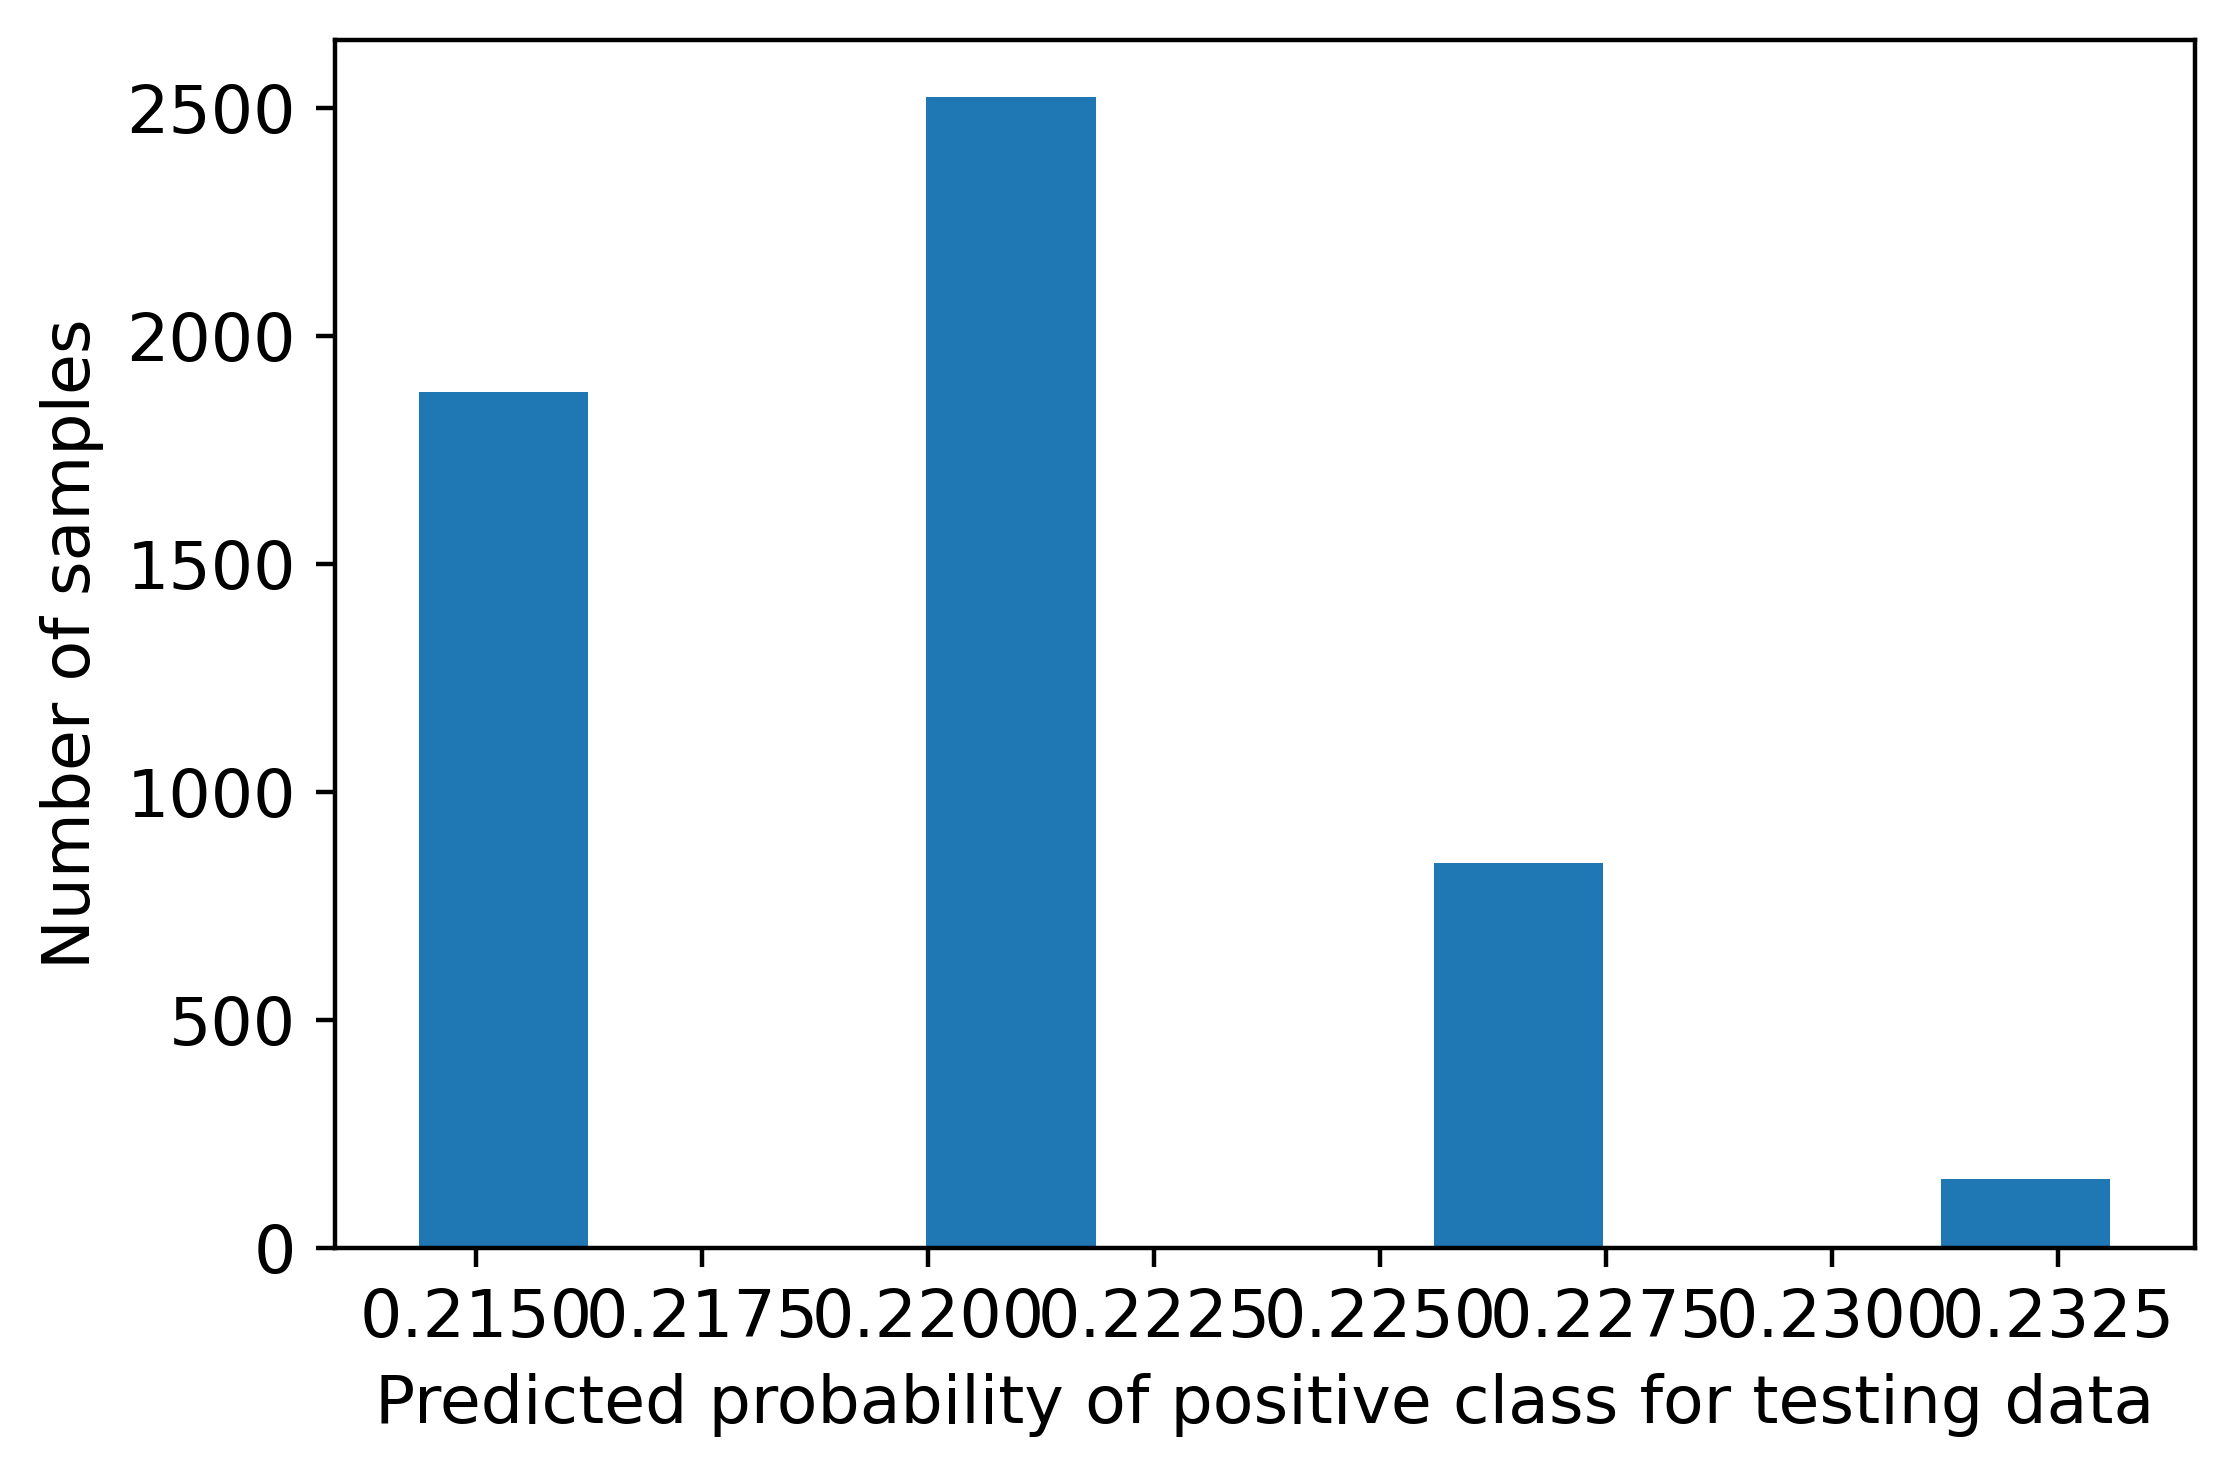

In [358]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [359]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

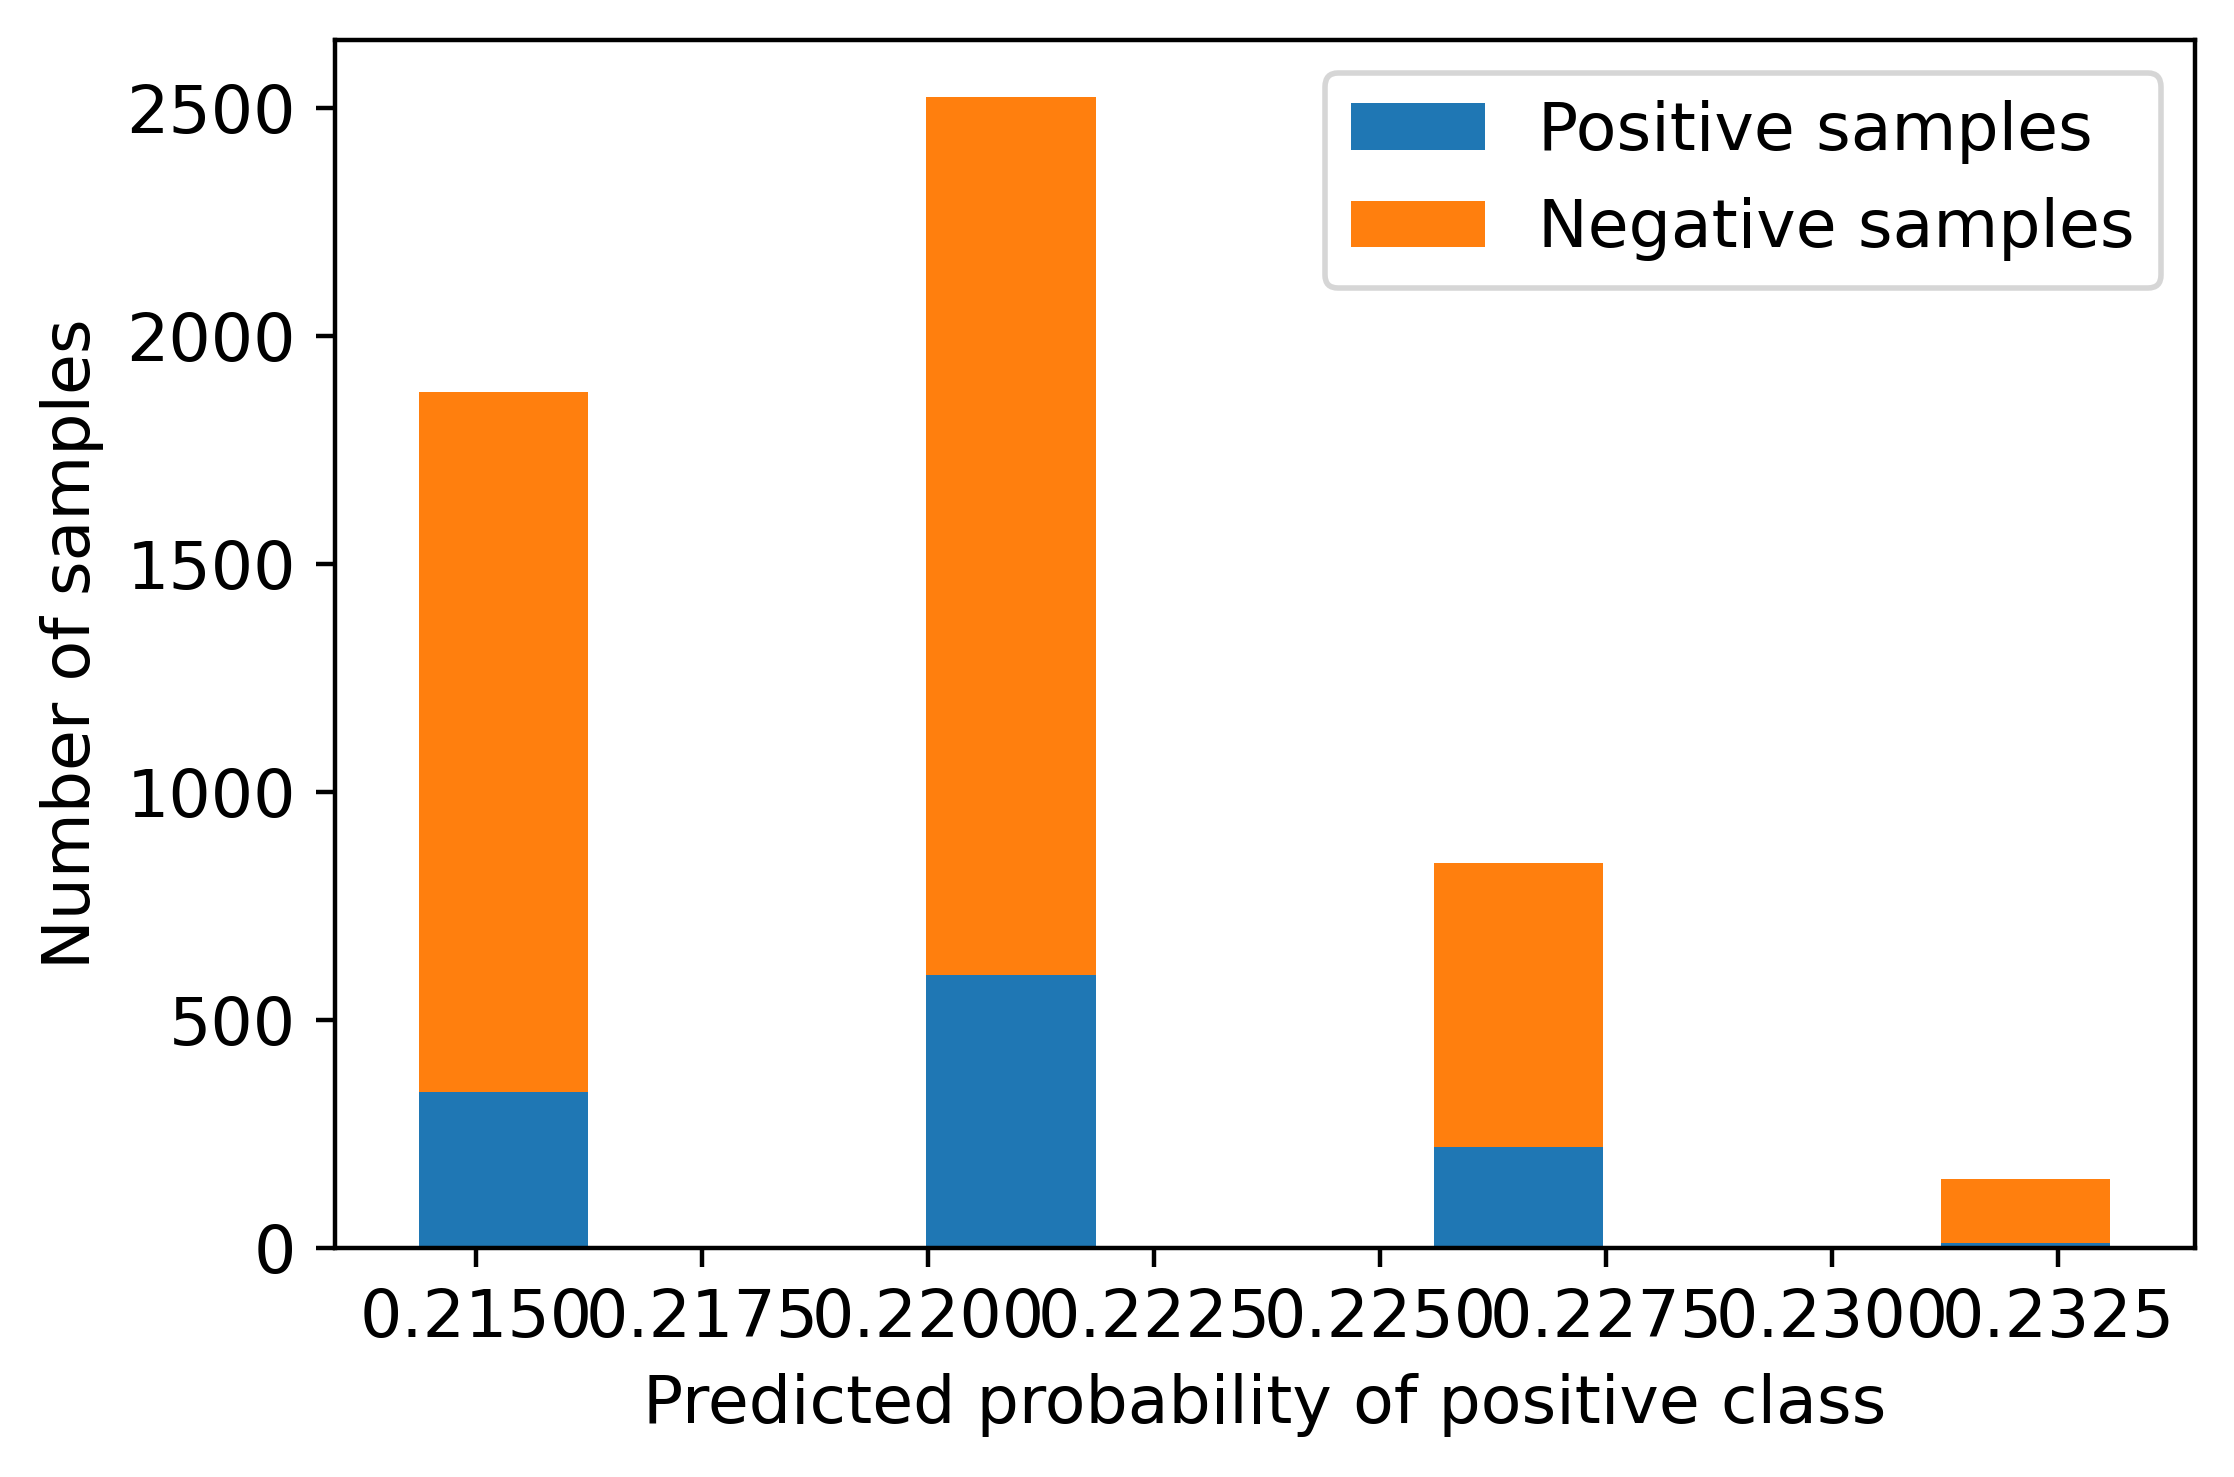

In [360]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Text(0.5, 1.0, 'ROC curve')

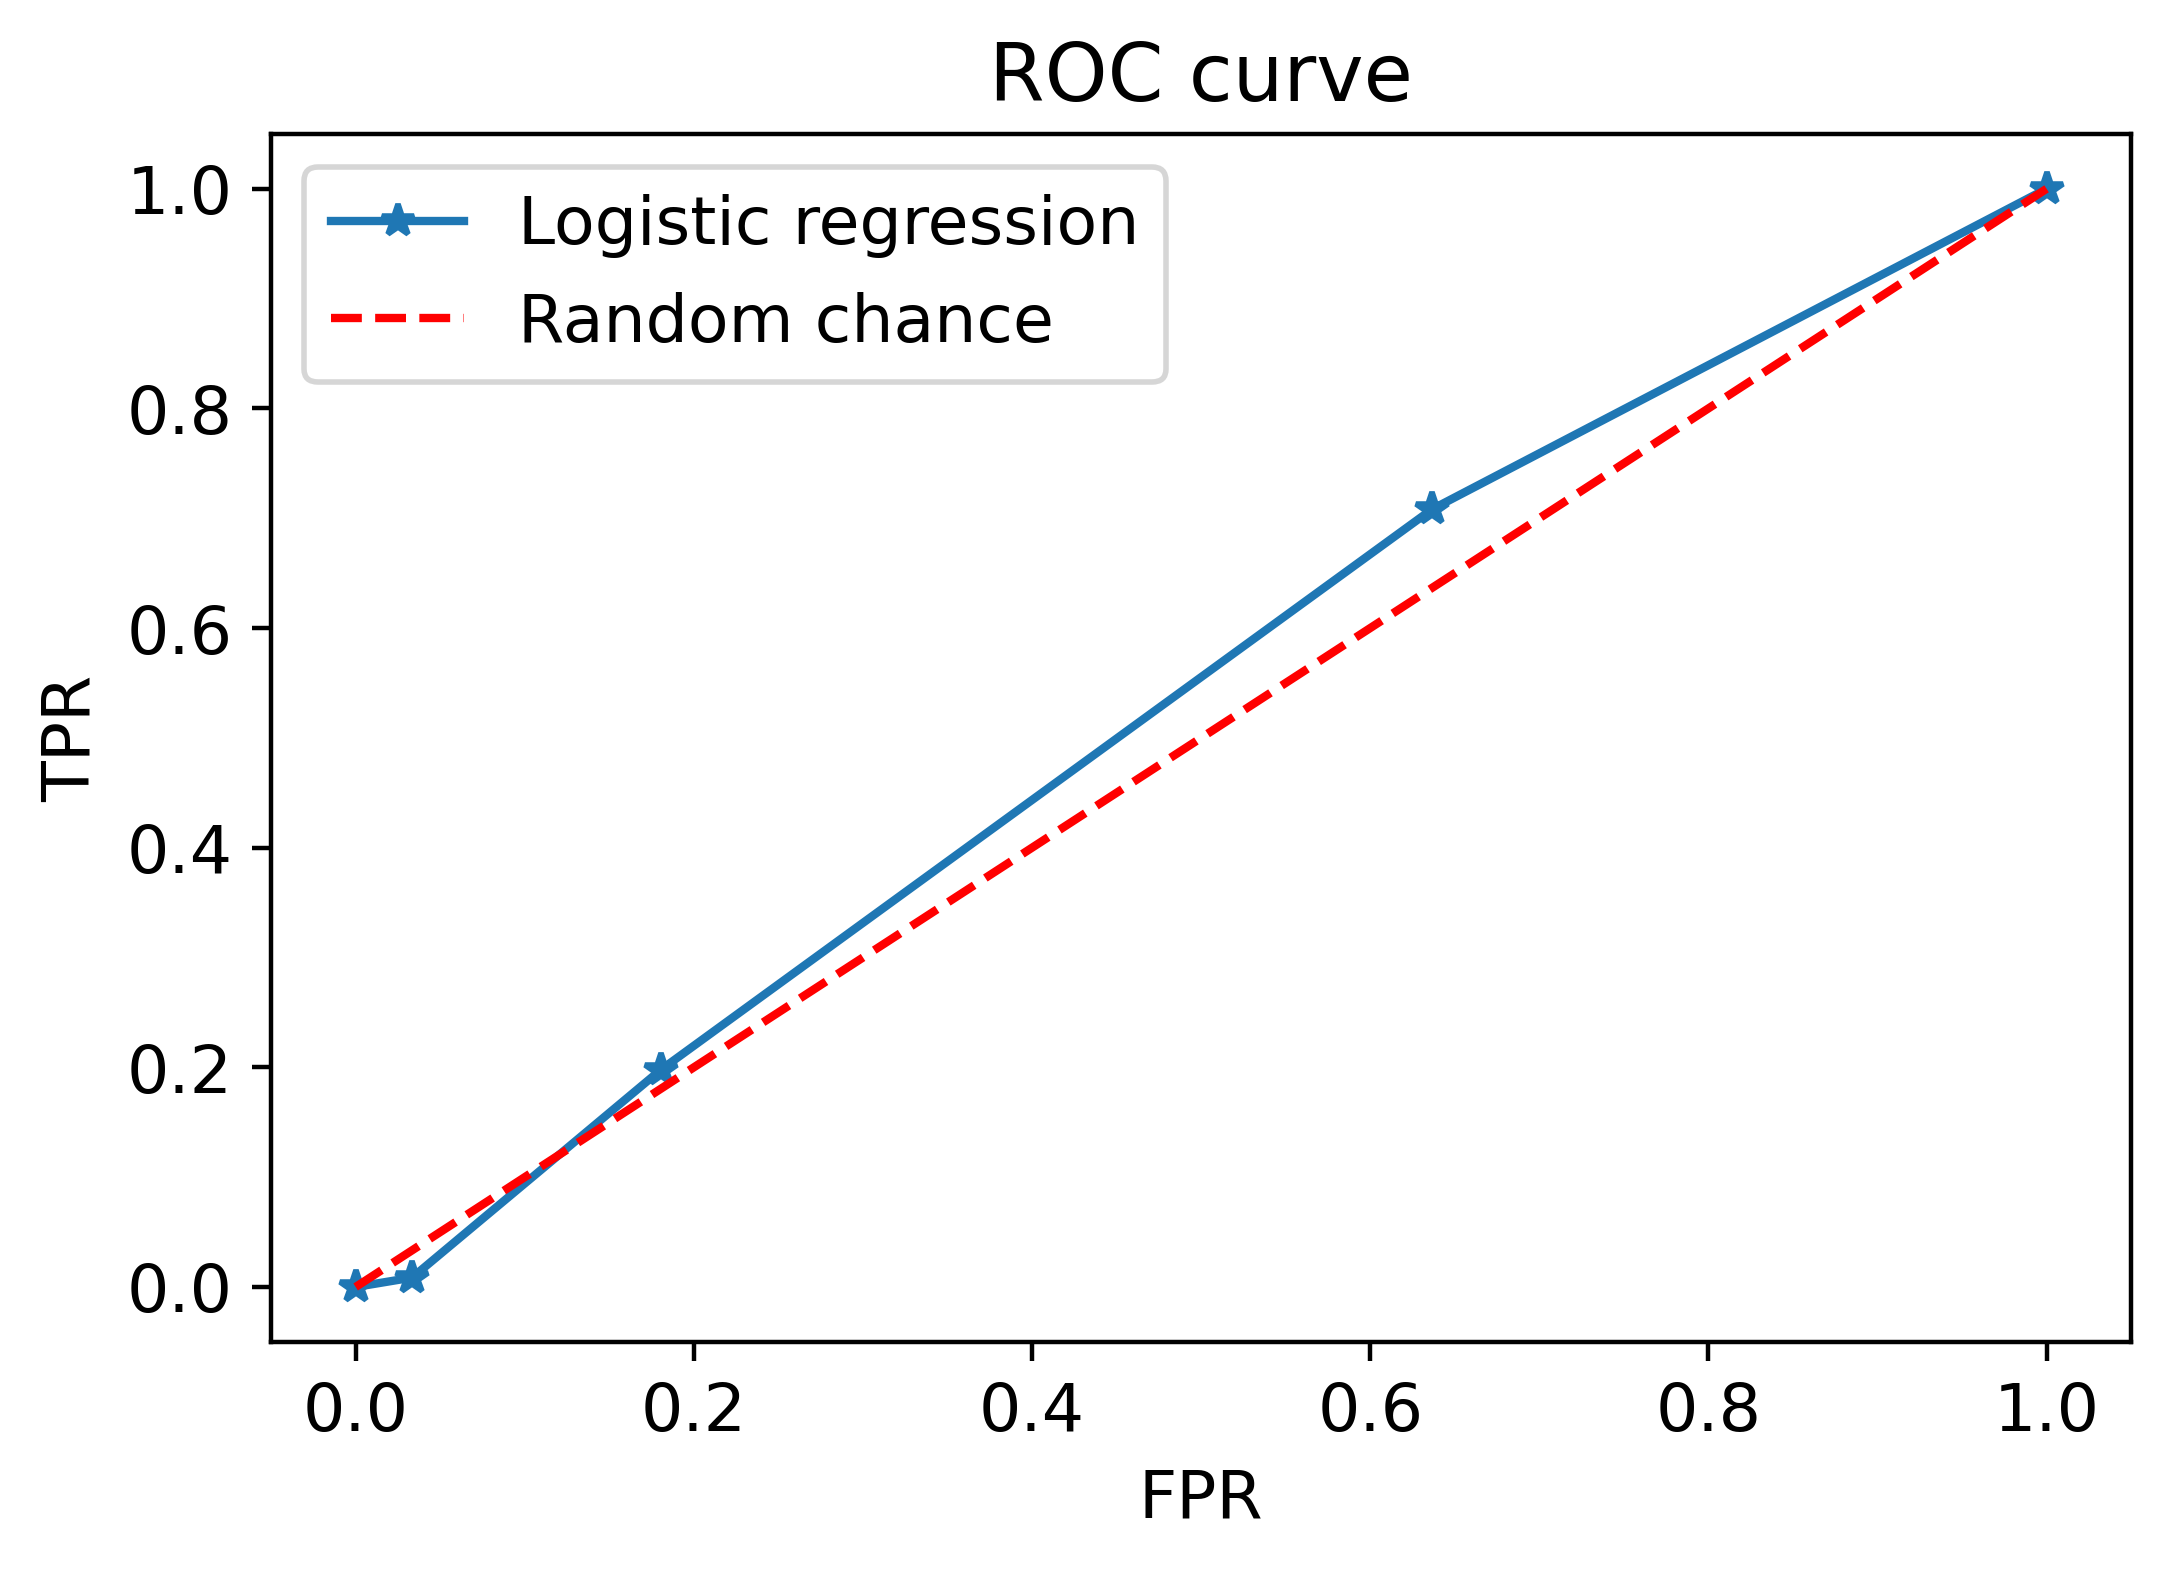

In [361]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [362]:
thresholds

array([1.23307934, 0.23307934, 0.22672023, 0.22048474, 0.2143732 ])

In [363]:
metrics.roc_auc_score(y_test, pos_proba)

0.532308472954804

In [364]:
features_response=['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 
        'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']

In [365]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

LIMIT_BAL  EDUCATION  MARRIAGE       AGE     PAY_1
LIMIT_BAL   1.000000  -0.261275 -0.145821  0.189536 -0.271001
EDUCATION  -0.261275   1.000000 -0.039692  0.043052  0.108016
MARRIAGE   -0.145821  -0.039692  1.000000 -0.475248  0.019419
AGE         0.189536   0.043052 -0.475248  1.000000 -0.041539
PAY_1      -0.271001   0.108016  0.019419 -0.041539  1.000000

<AxesSubplot:>

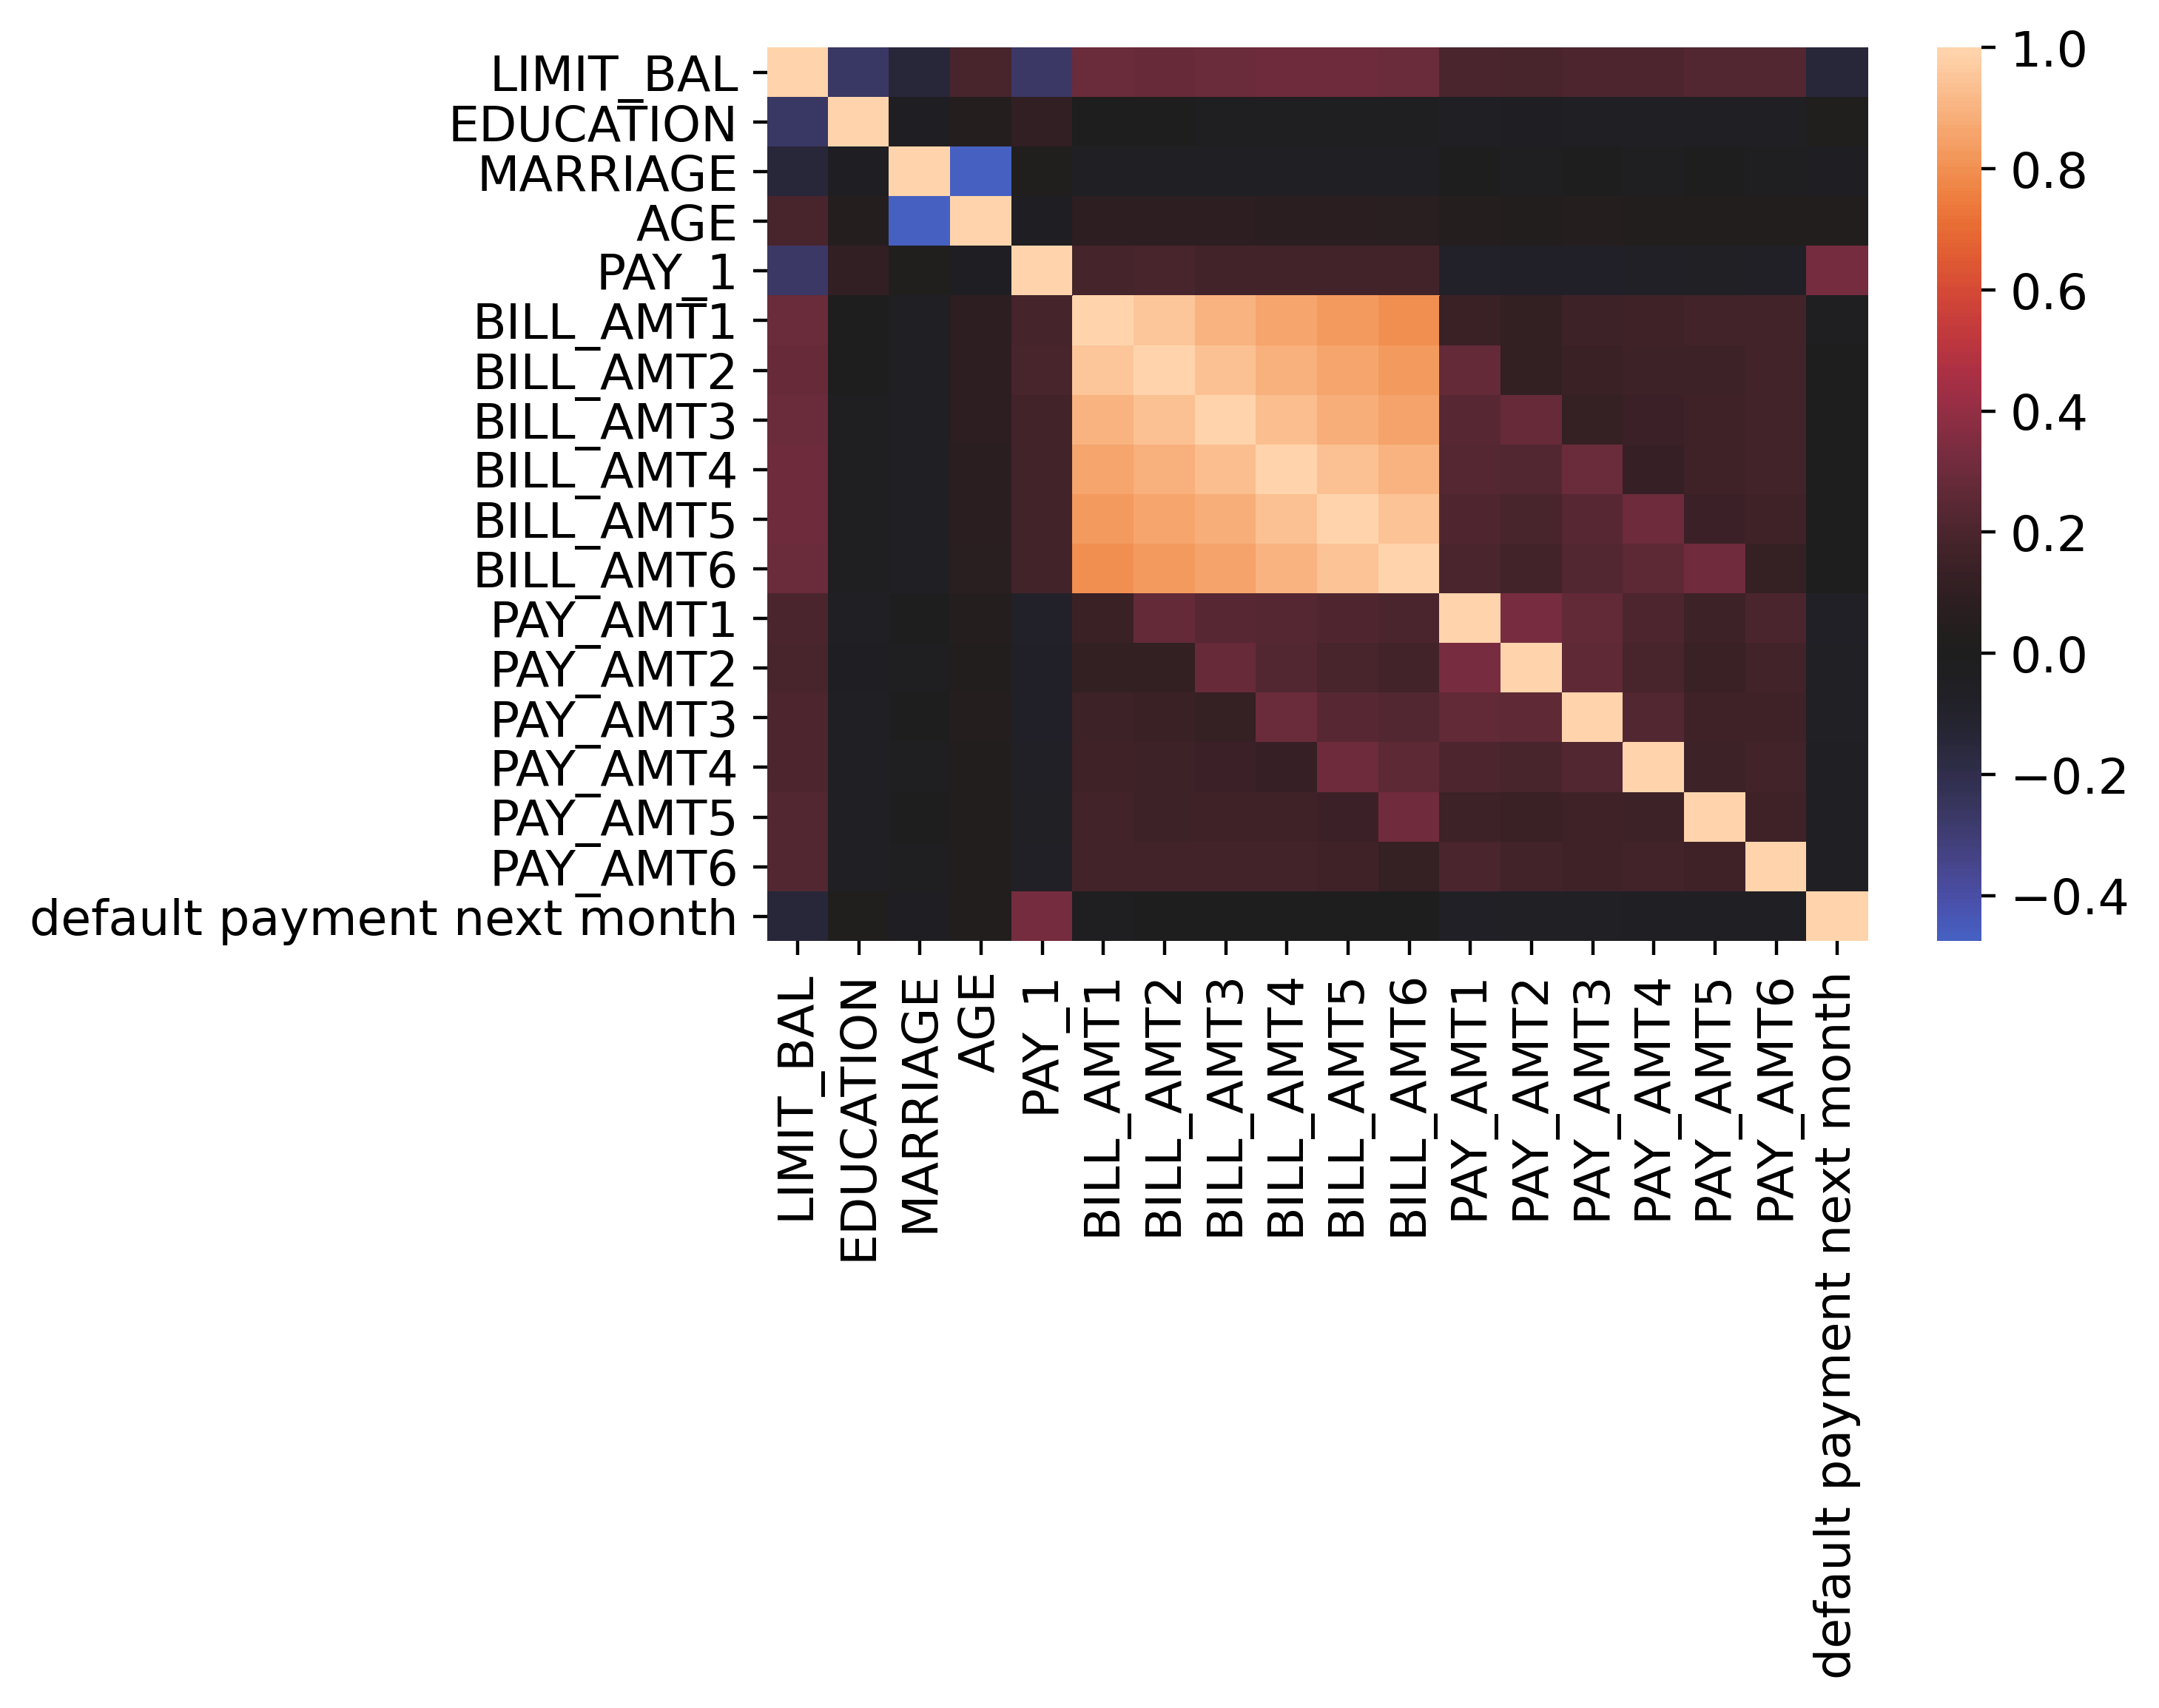

In [366]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [367]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26979, 17) (26979,)


In [368]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [369]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

Feature  F statistic        p value
4       PAY_1  3179.963673   0.000000e+00
0   LIMIT_BAL   577.024853  3.524270e-126
11   PAY_AMT1   133.362250   8.900087e-31
12   PAY_AMT2    96.496479   9.761335e-23
13   PAY_AMT3    84.827638   3.484856e-20
15   PAY_AMT5    80.534845   3.037311e-19
16   PAY_AMT6    75.602680   3.662330e-18
14   PAY_AMT4    74.694540   5.793768e-18
2    MARRIAGE    46.329323   1.020494e-11
3         AGE    33.702635   6.493260e-09
1   EDUCATION     6.999584   8.157594e-03
5   BILL_AMT1     6.980618   8.244471e-03
7   BILL_AMT3     2.883058   8.952739e-02
6   BILL_AMT2     2.807760   9.382085e-02
8   BILL_AMT4     1.365992   2.425120e-01
9   BILL_AMT5     0.182425   6.693009e-01
10  BILL_AMT6     0.128927   7.195499e-01

In [370]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20)

In [371]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [372]:
features = features_response[:-1]

In [373]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [374]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.21920753178398014

In [375]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

default payment next month
PAY_1                            
-2                       0.131664
-1                       0.170002
 0                       0.125280
 1                       0.336400
 2                       0.694701
 3                       0.773973
 4                       0.682540
 5                       0.434783
 6                       0.545455
 7                       0.777778
 8                       0.588235

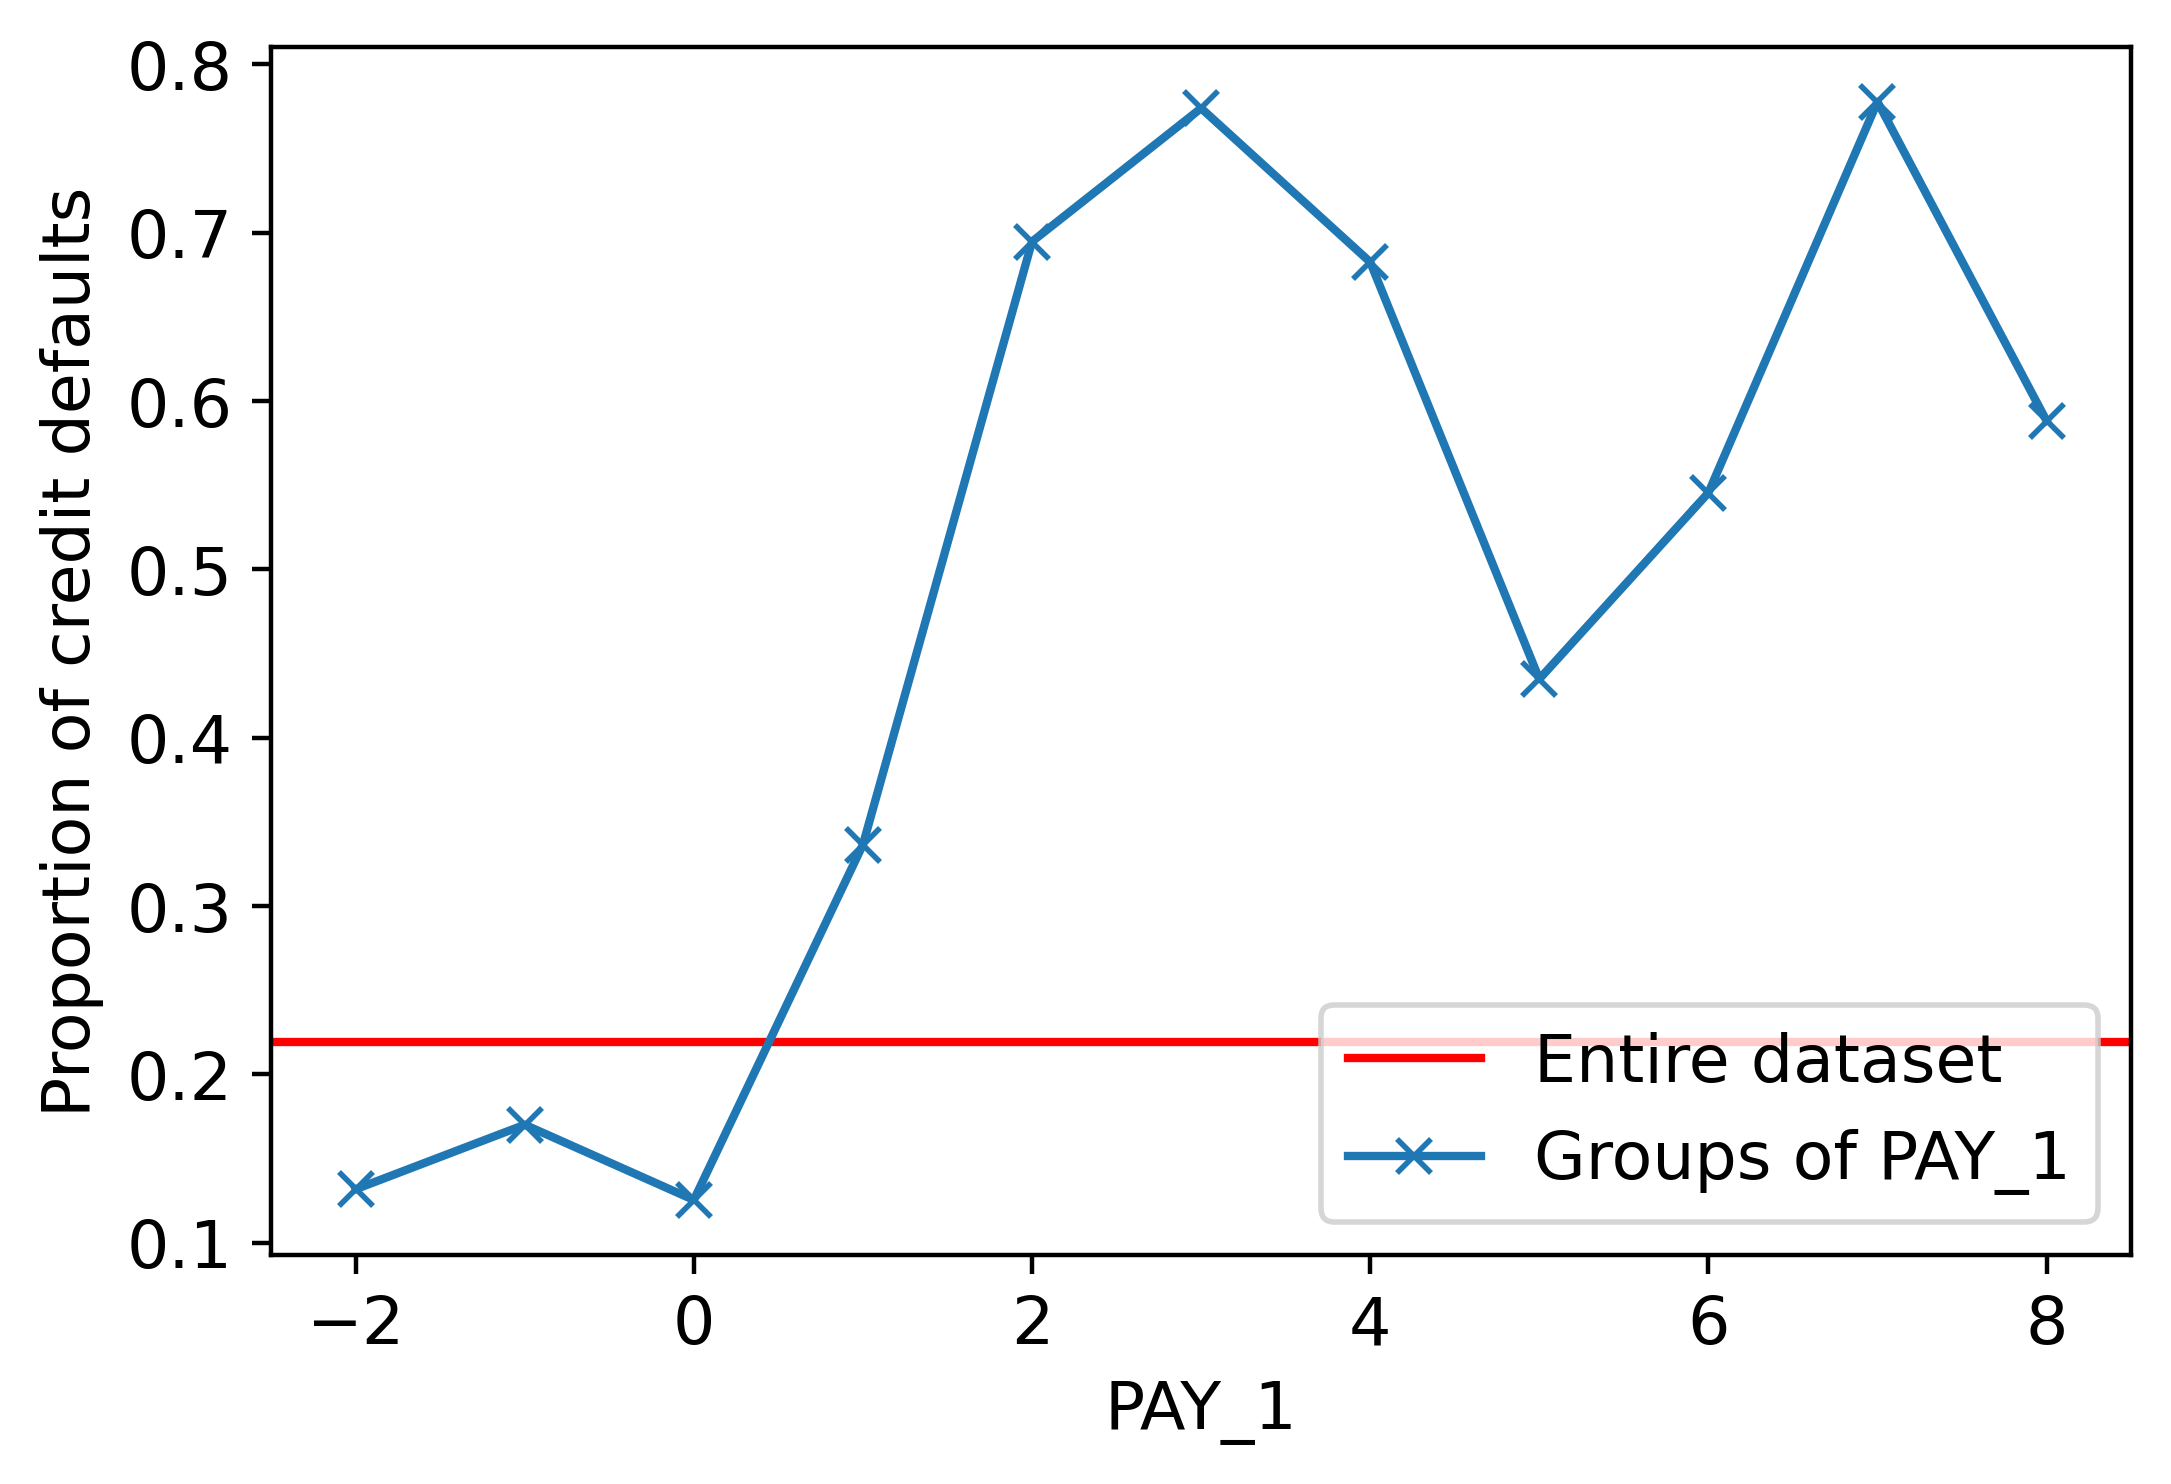

In [376]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

In [377]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

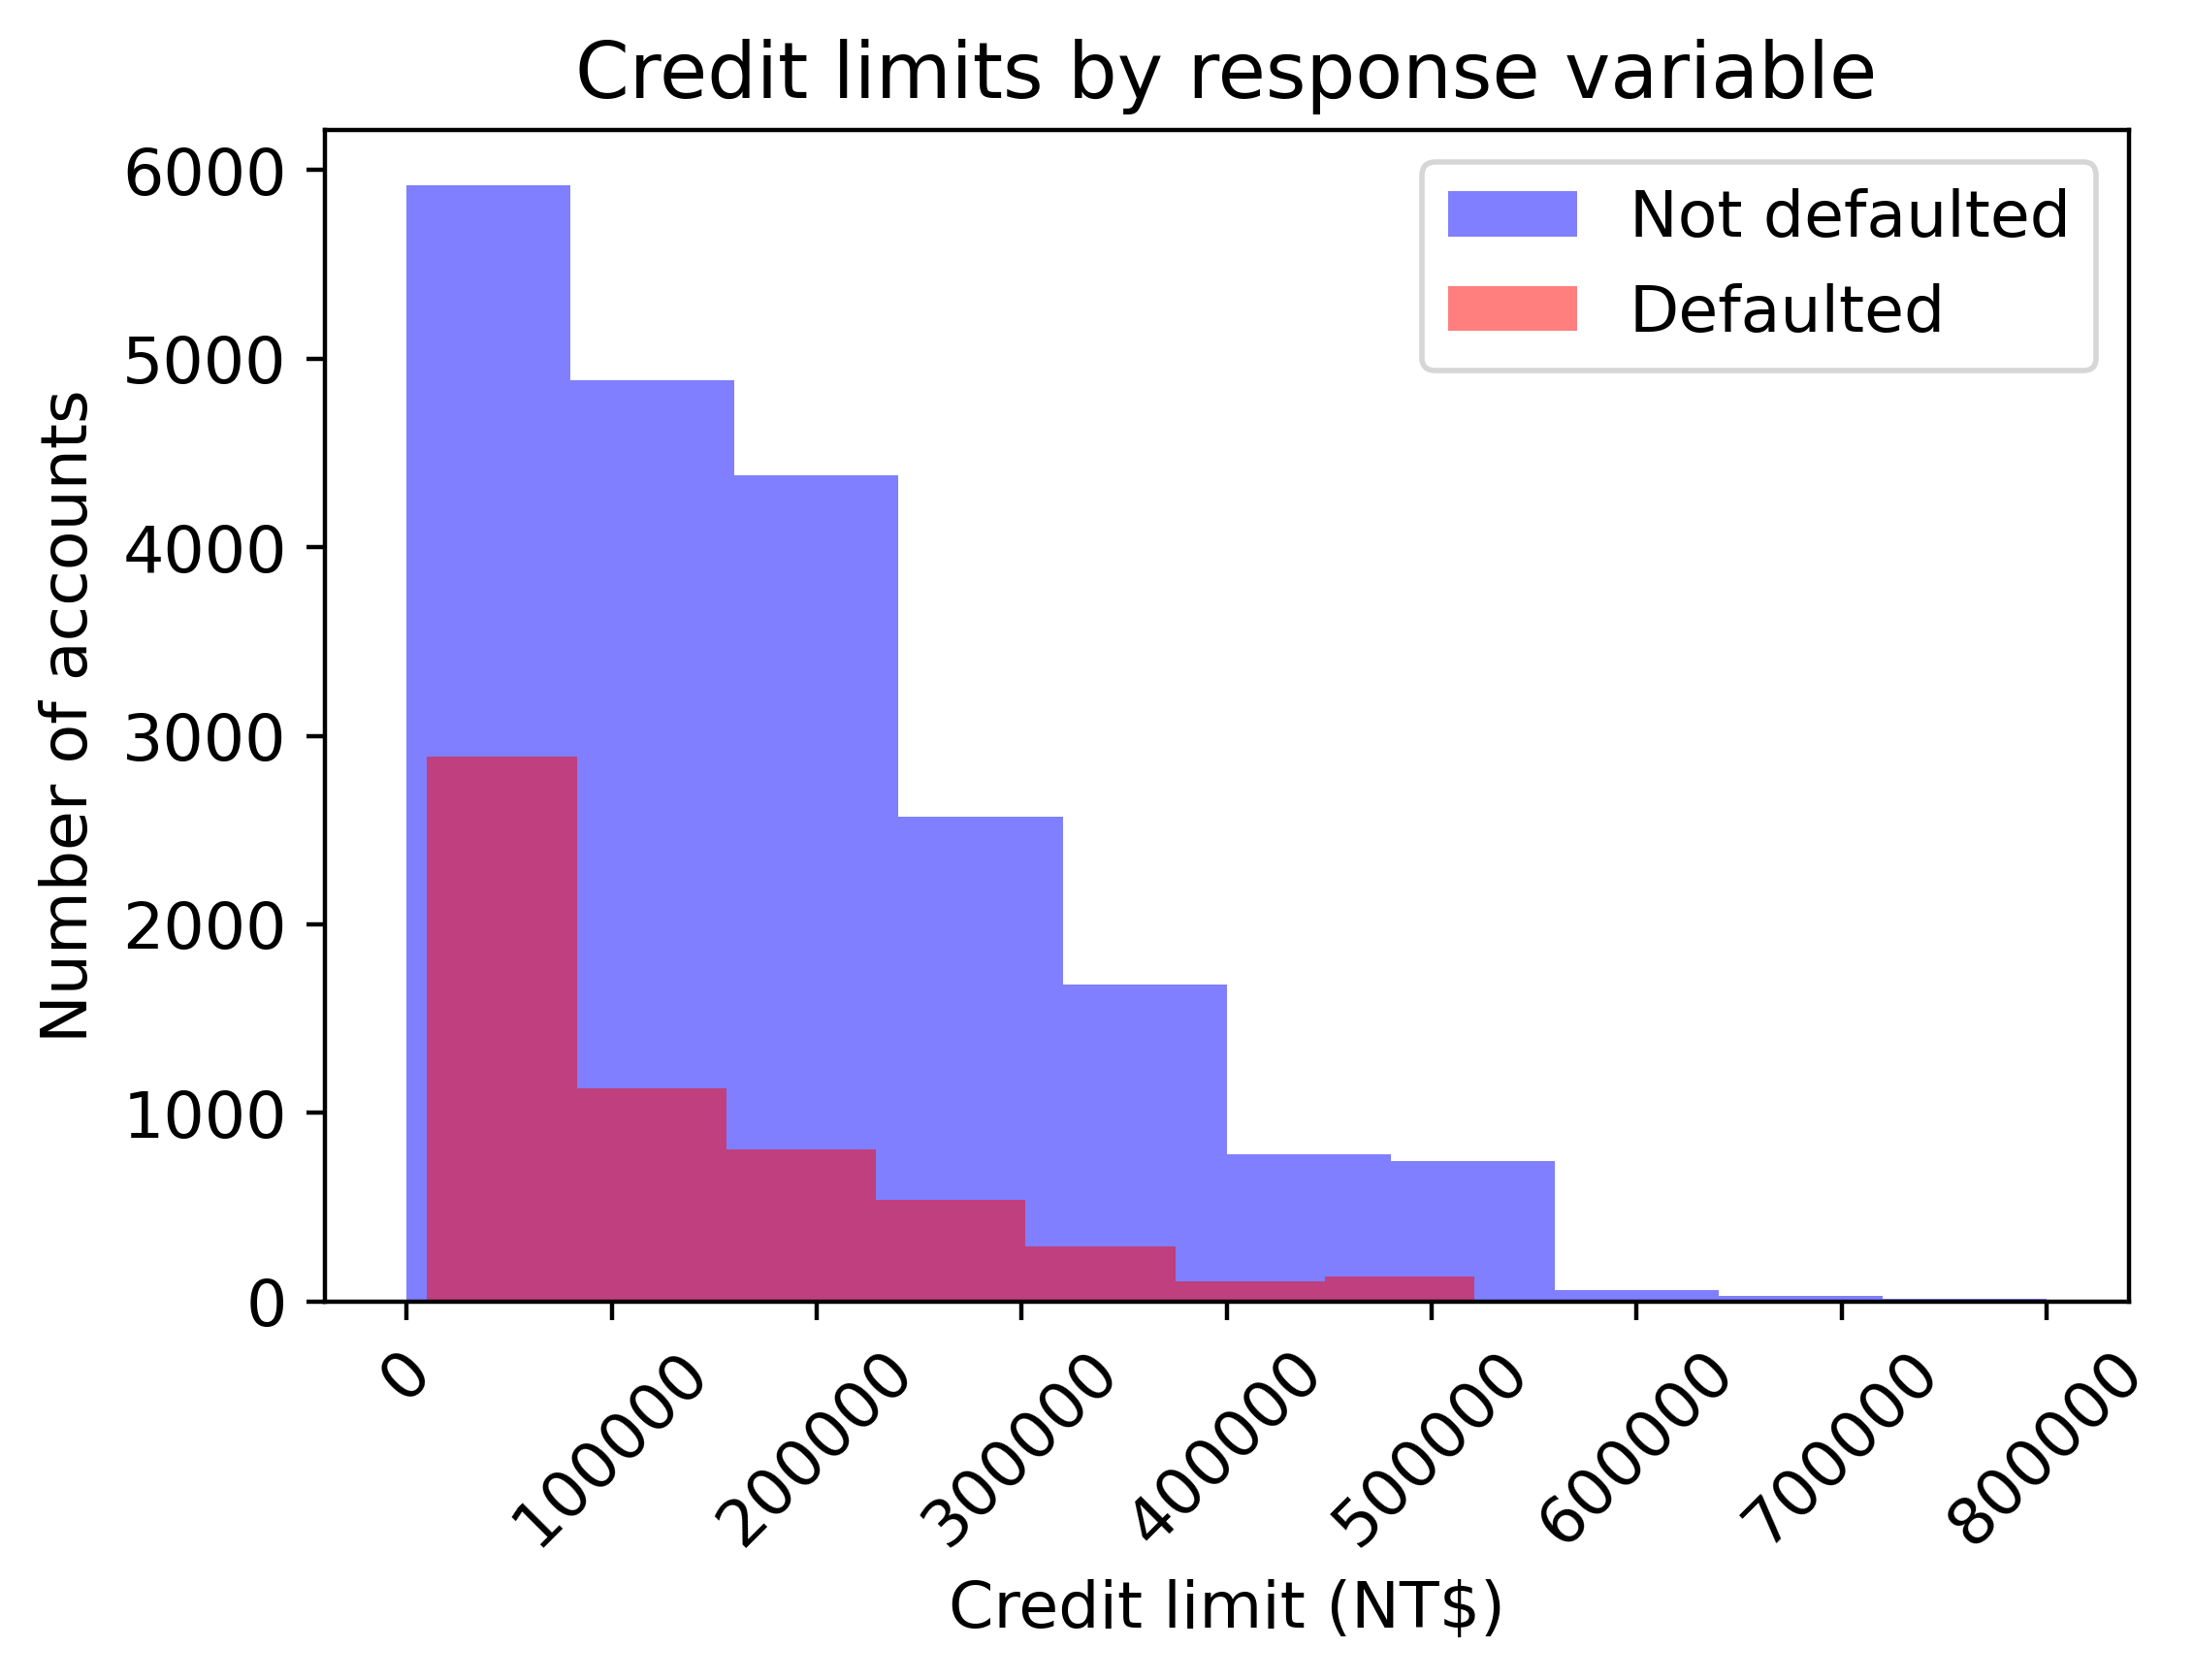

In [378]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [379]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


<ipython-input-380-83eb218adef1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

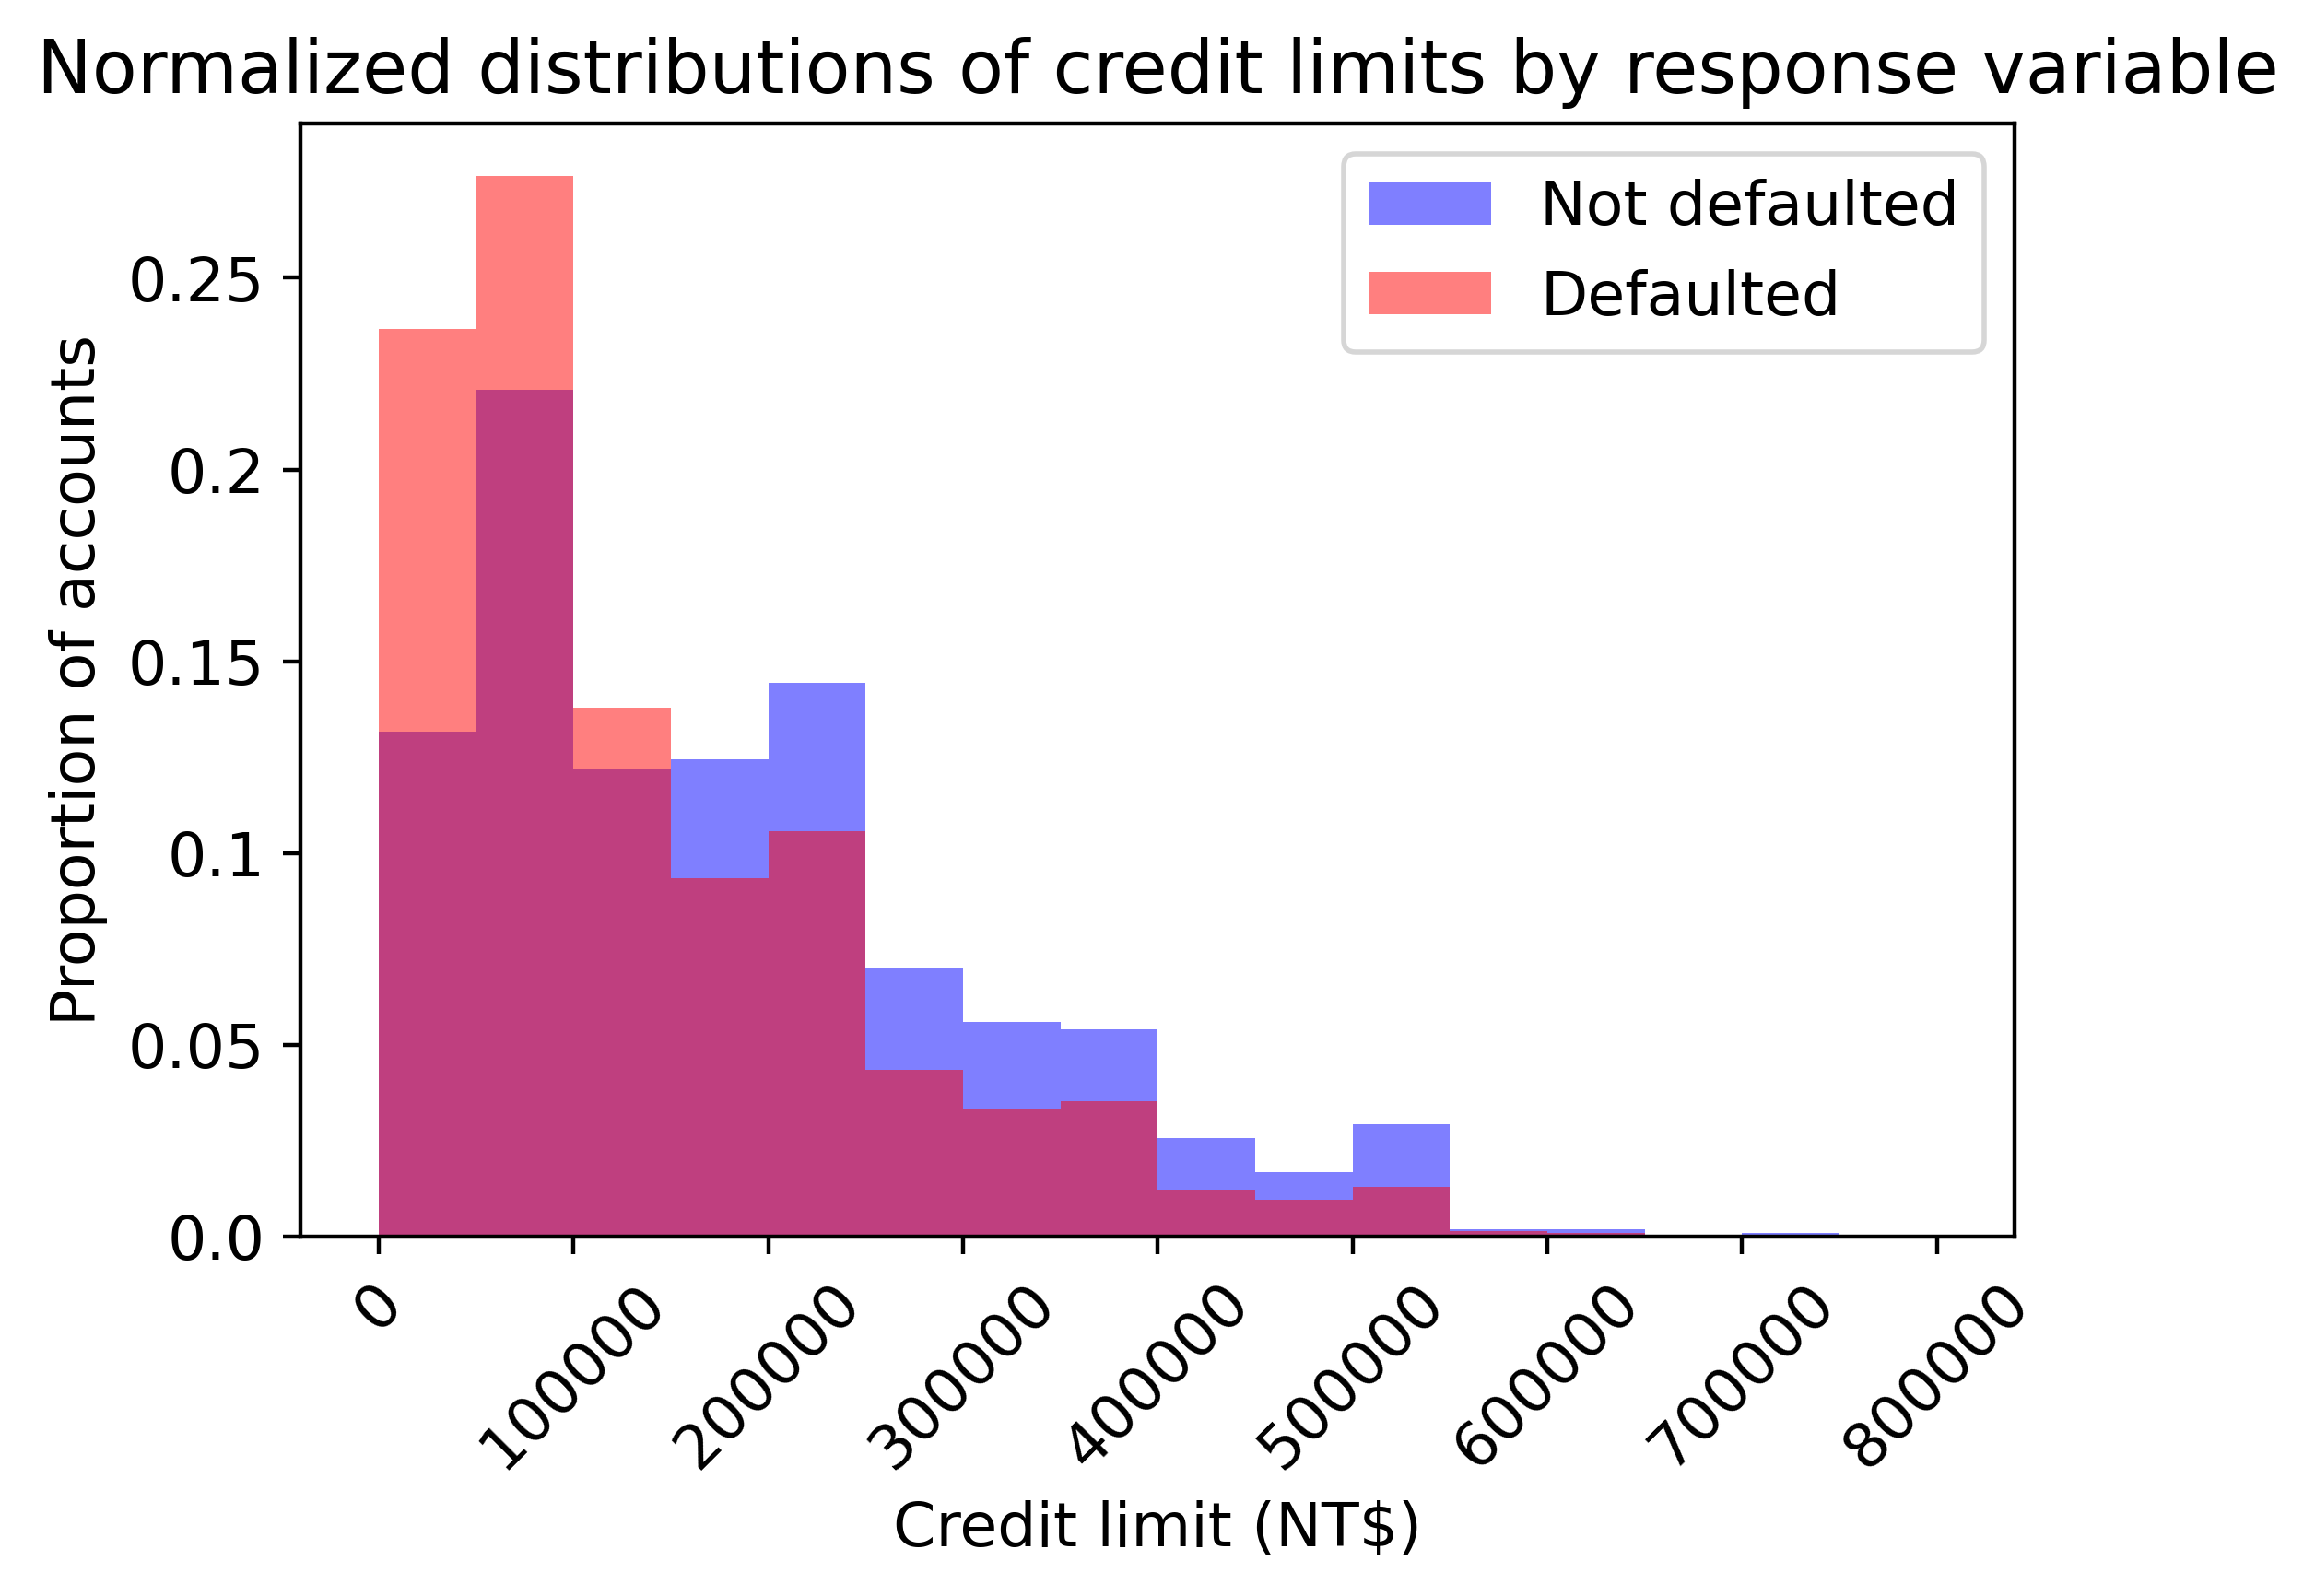

In [380]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

In [381]:
np.mean([1,2,3,4,5])

3.0

In [382]:
def my_mean(input_argument):
    output = sum(input_argument)/len(input_argument)
    return(output)

In [383]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [384]:
Y_exp = np.exp(X_exp)

Text(0.5, 1.0, 'Plot of $e^X$')

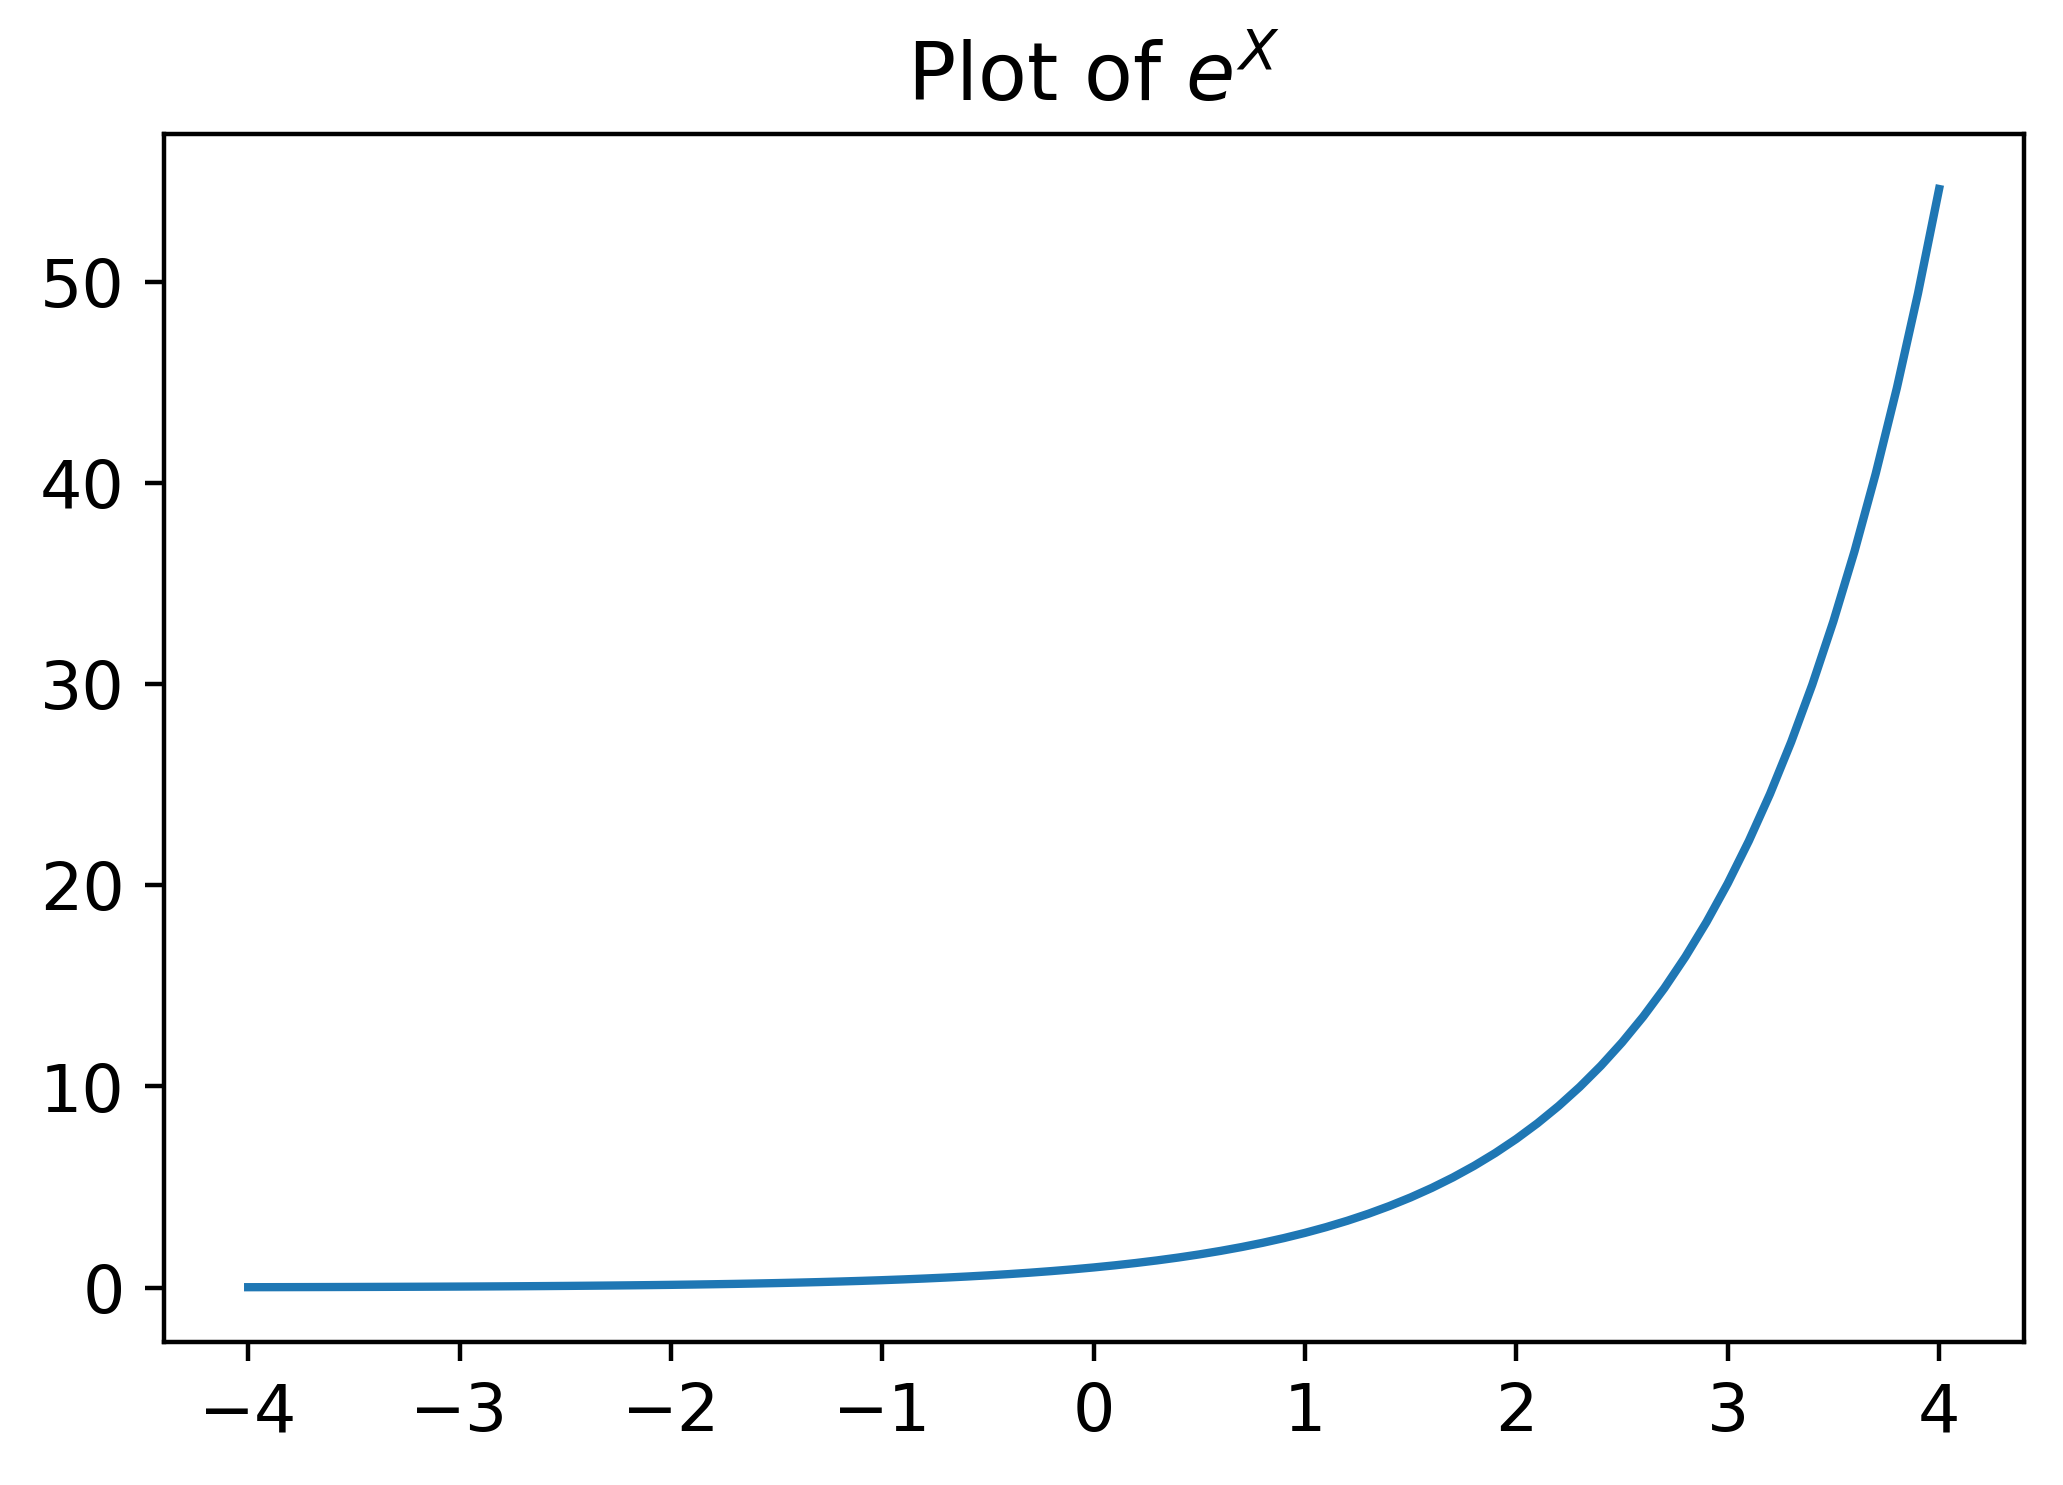

In [385]:
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')

Text(0.5, 1.0, 'Plot of $e^{-X}$')

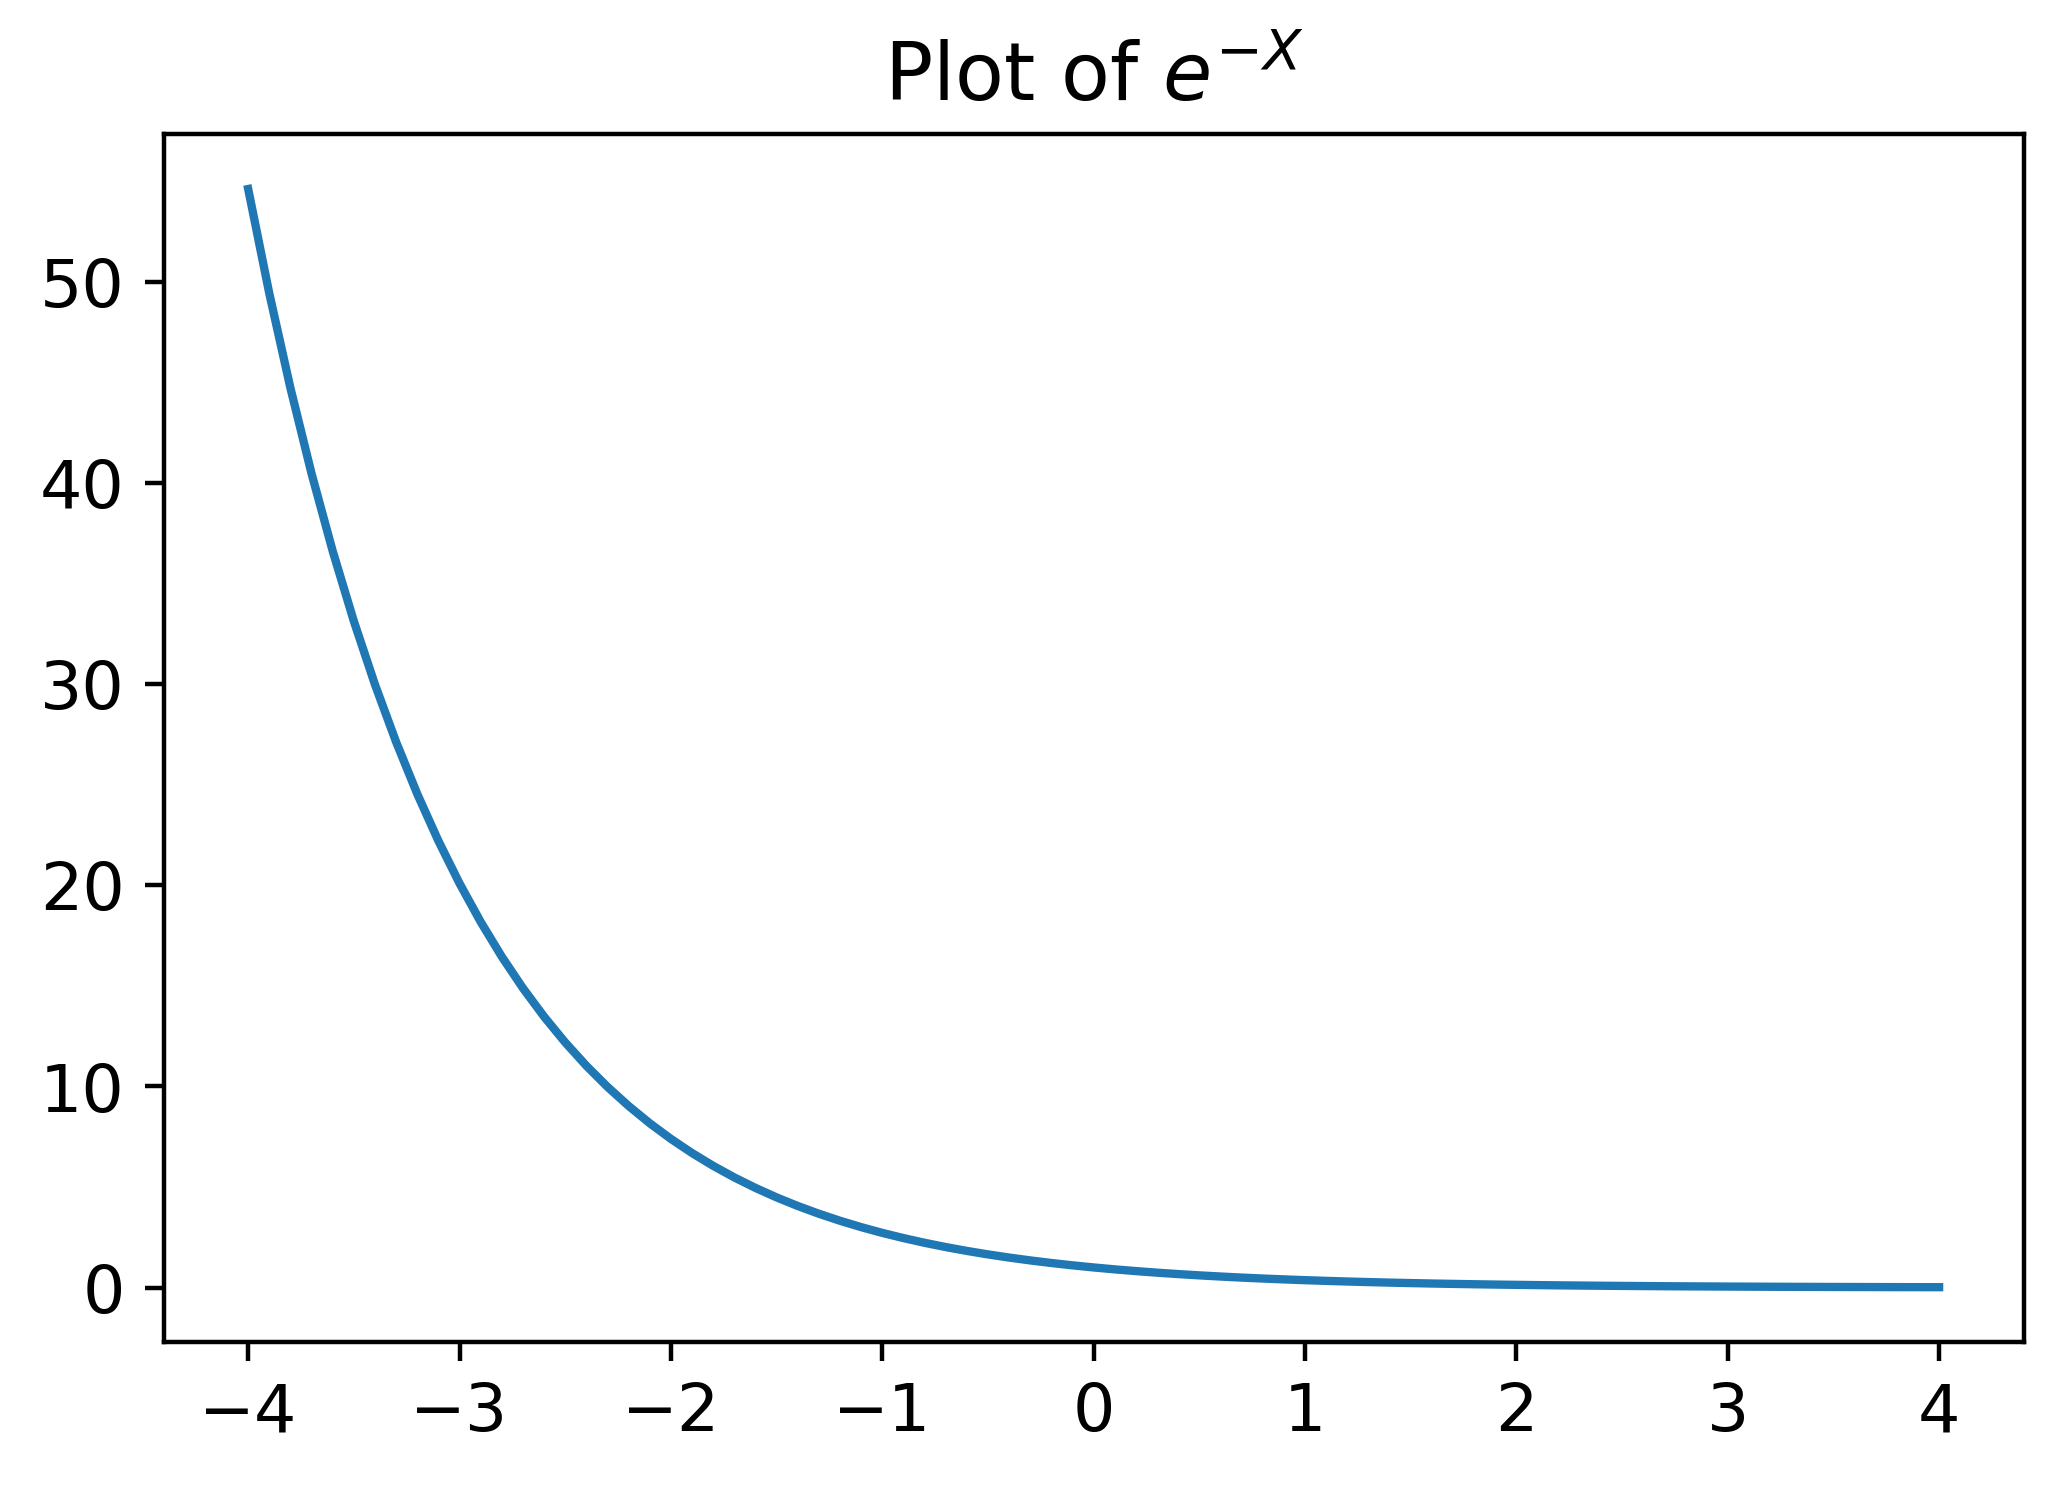

In [386]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [387]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

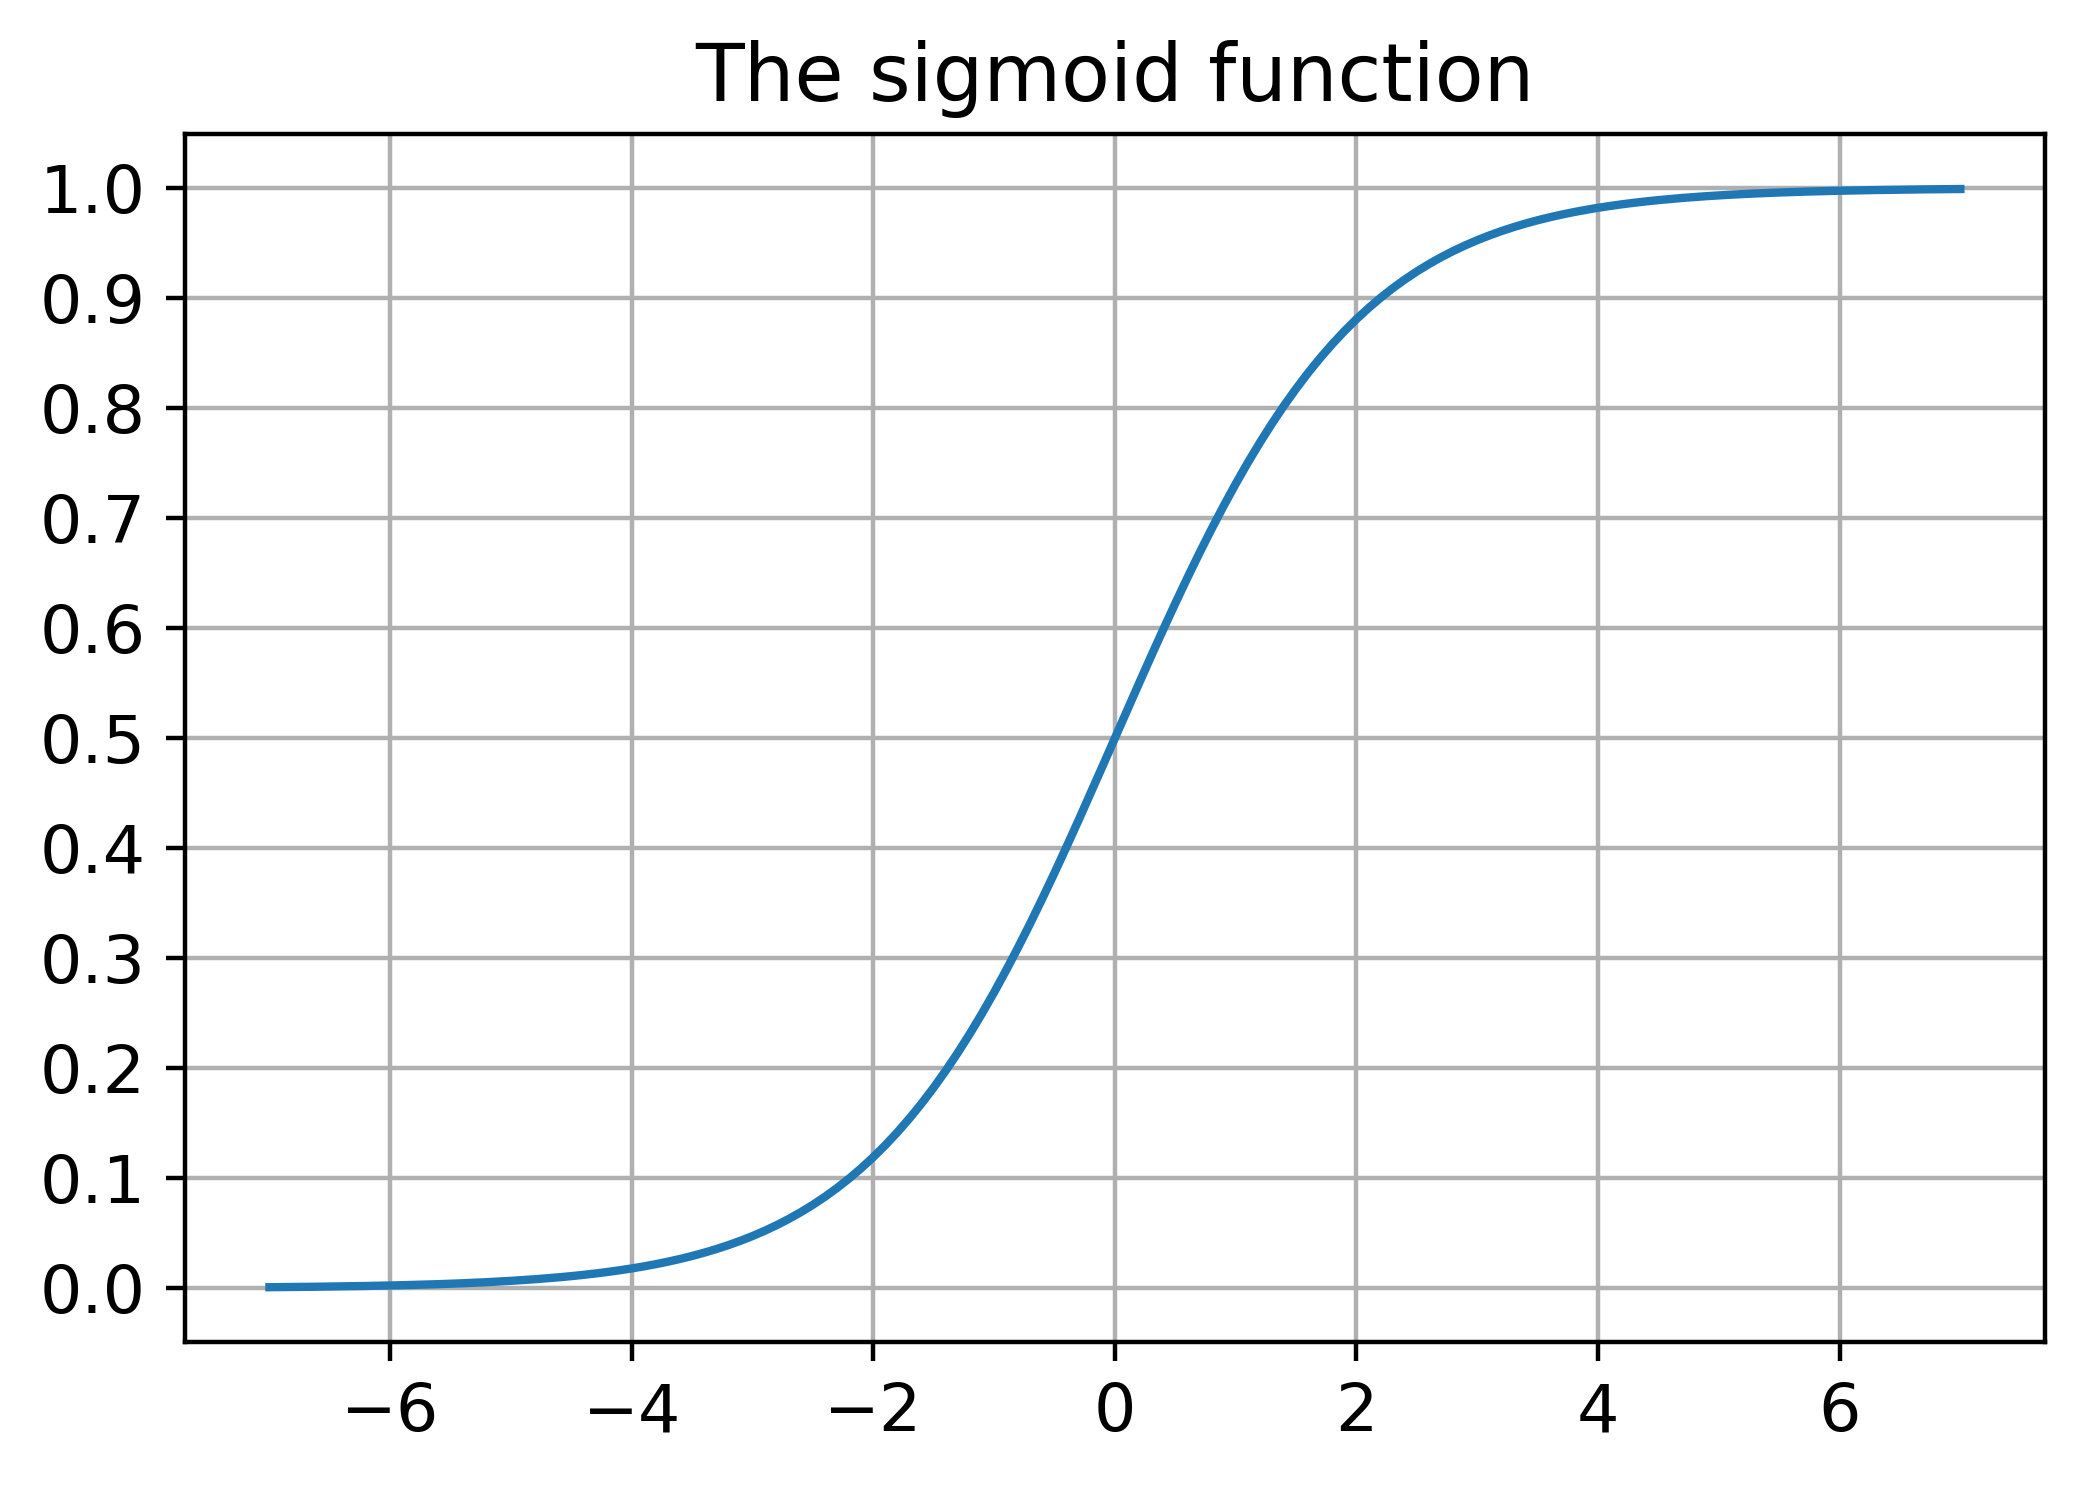

In [388]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

In [389]:
example_global_variable = 1
def example_function():
    output = example_global_variable + 1
    return(output)
example_function()

2

In [390]:
group_by_pay_mean_y

default payment next month
PAY_1                            
-2                       0.131664
-1                       0.170002
 0                       0.125280
 1                       0.336400
 2                       0.694701
 3                       0.773973
 4                       0.682540
 5                       0.434783
 6                       0.545455
 7                       0.777778
 8                       0.588235

In [391]:
p = group_by_pay_mean_y['default payment next month'].values

In [392]:
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12527981 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87472019 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [393]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.94335435, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [394]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

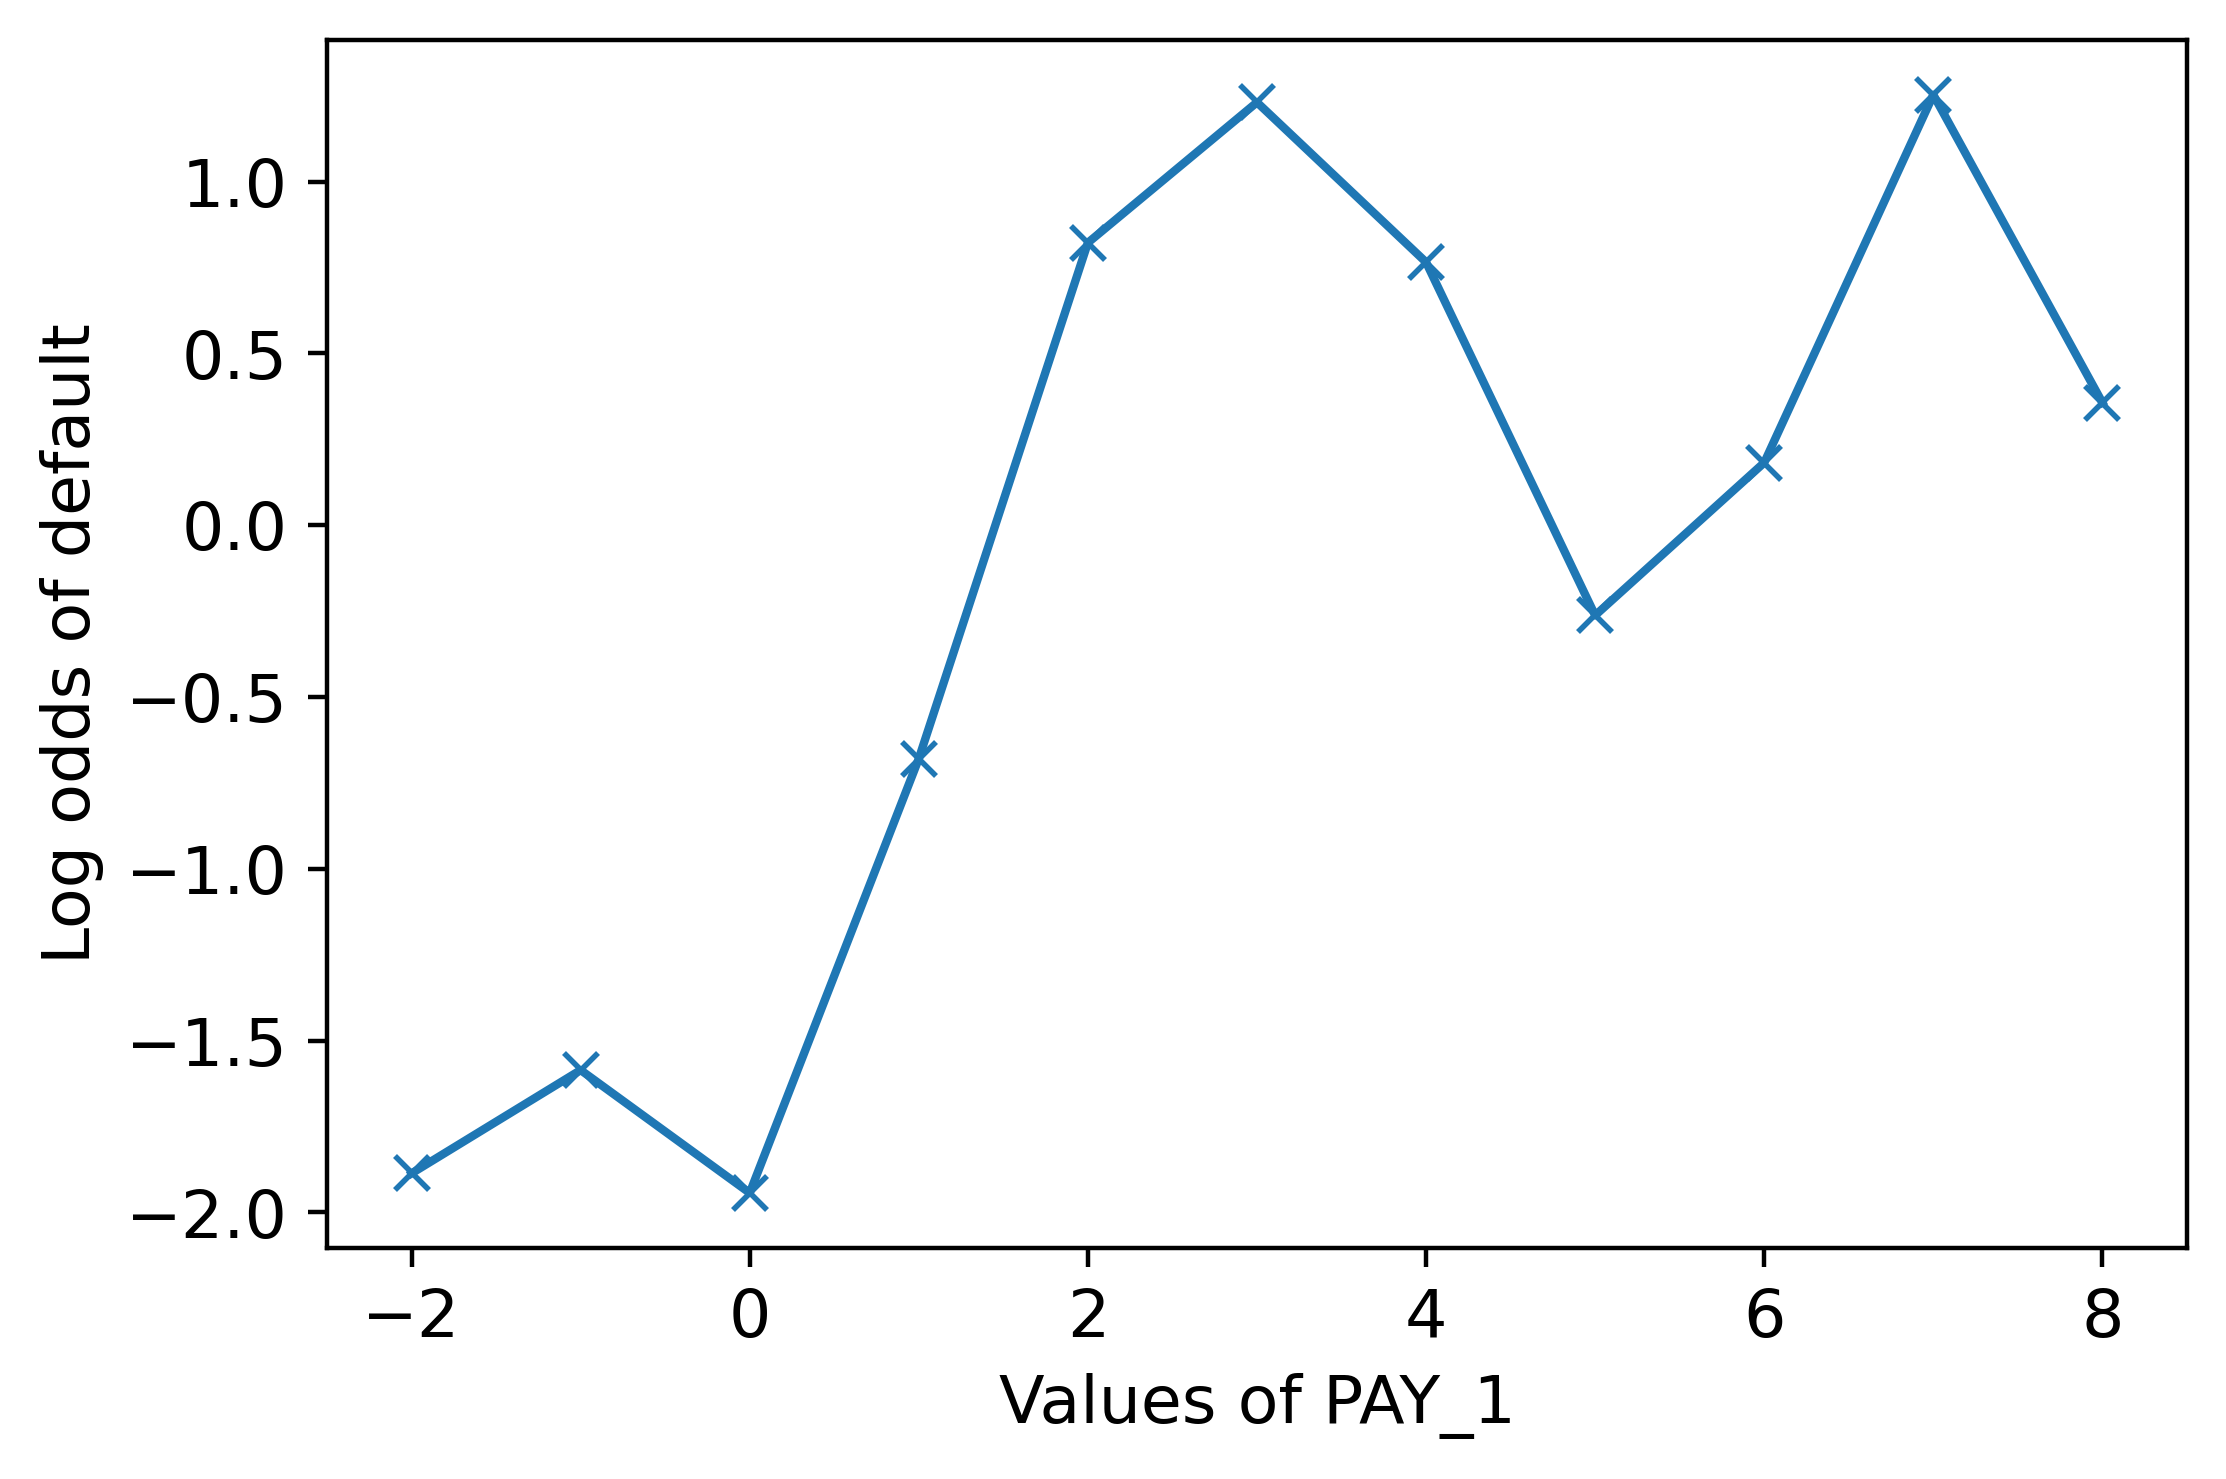

In [395]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

In [396]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


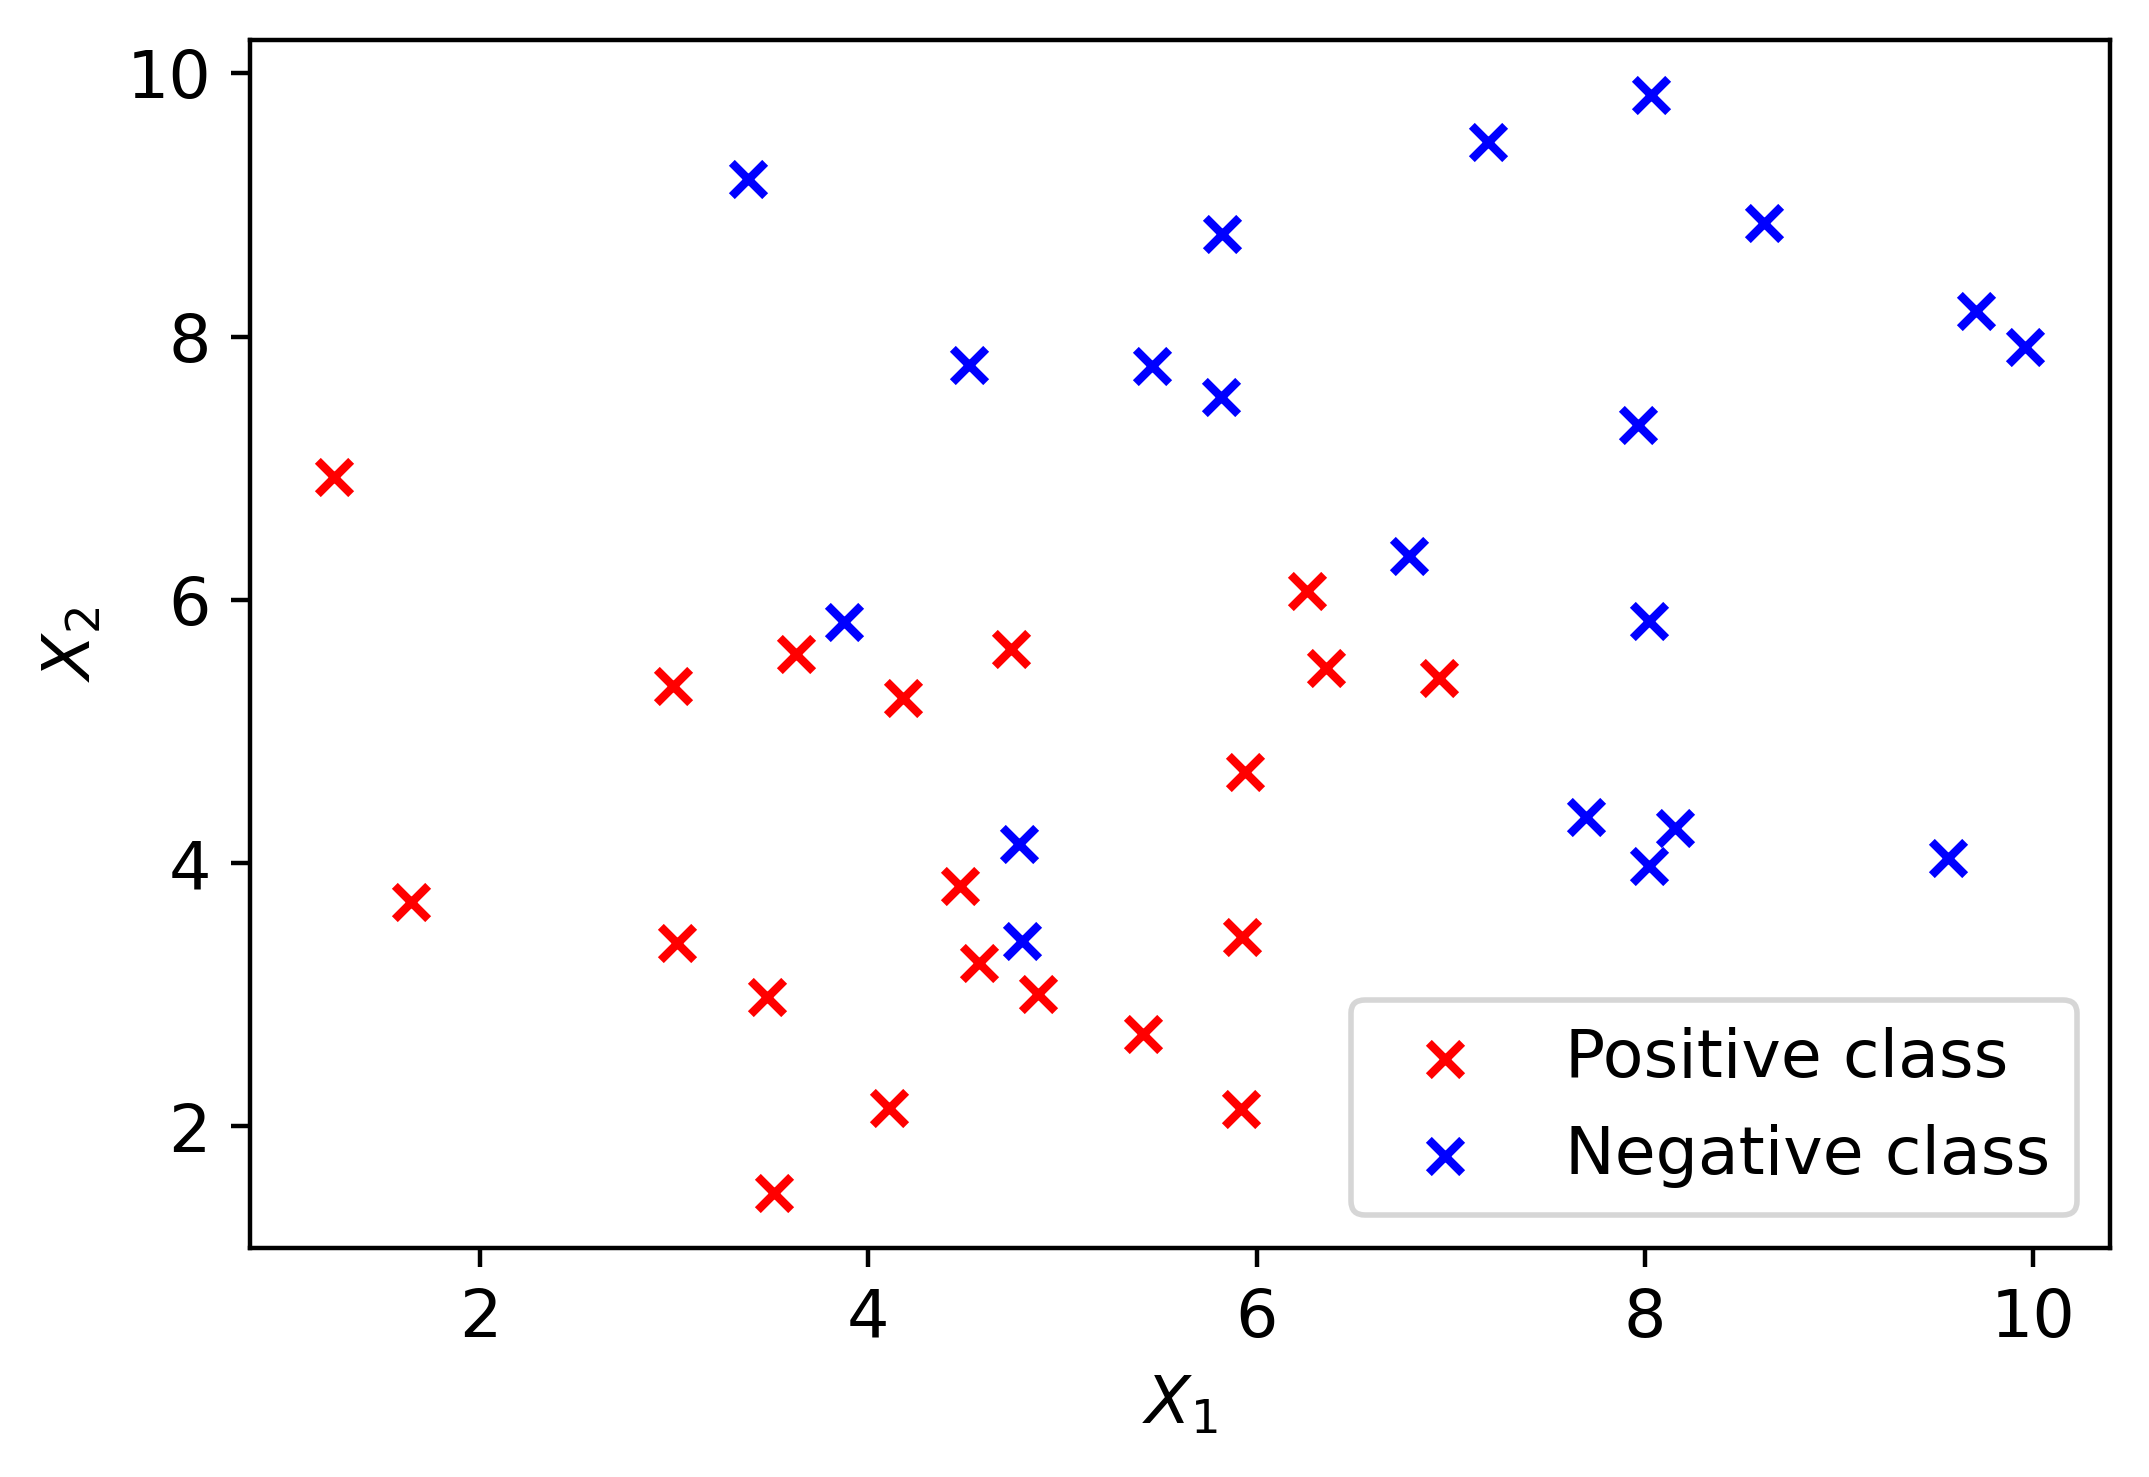

In [397]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [398]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [399]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [400]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(solver='liblinear')

In [401]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [402]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

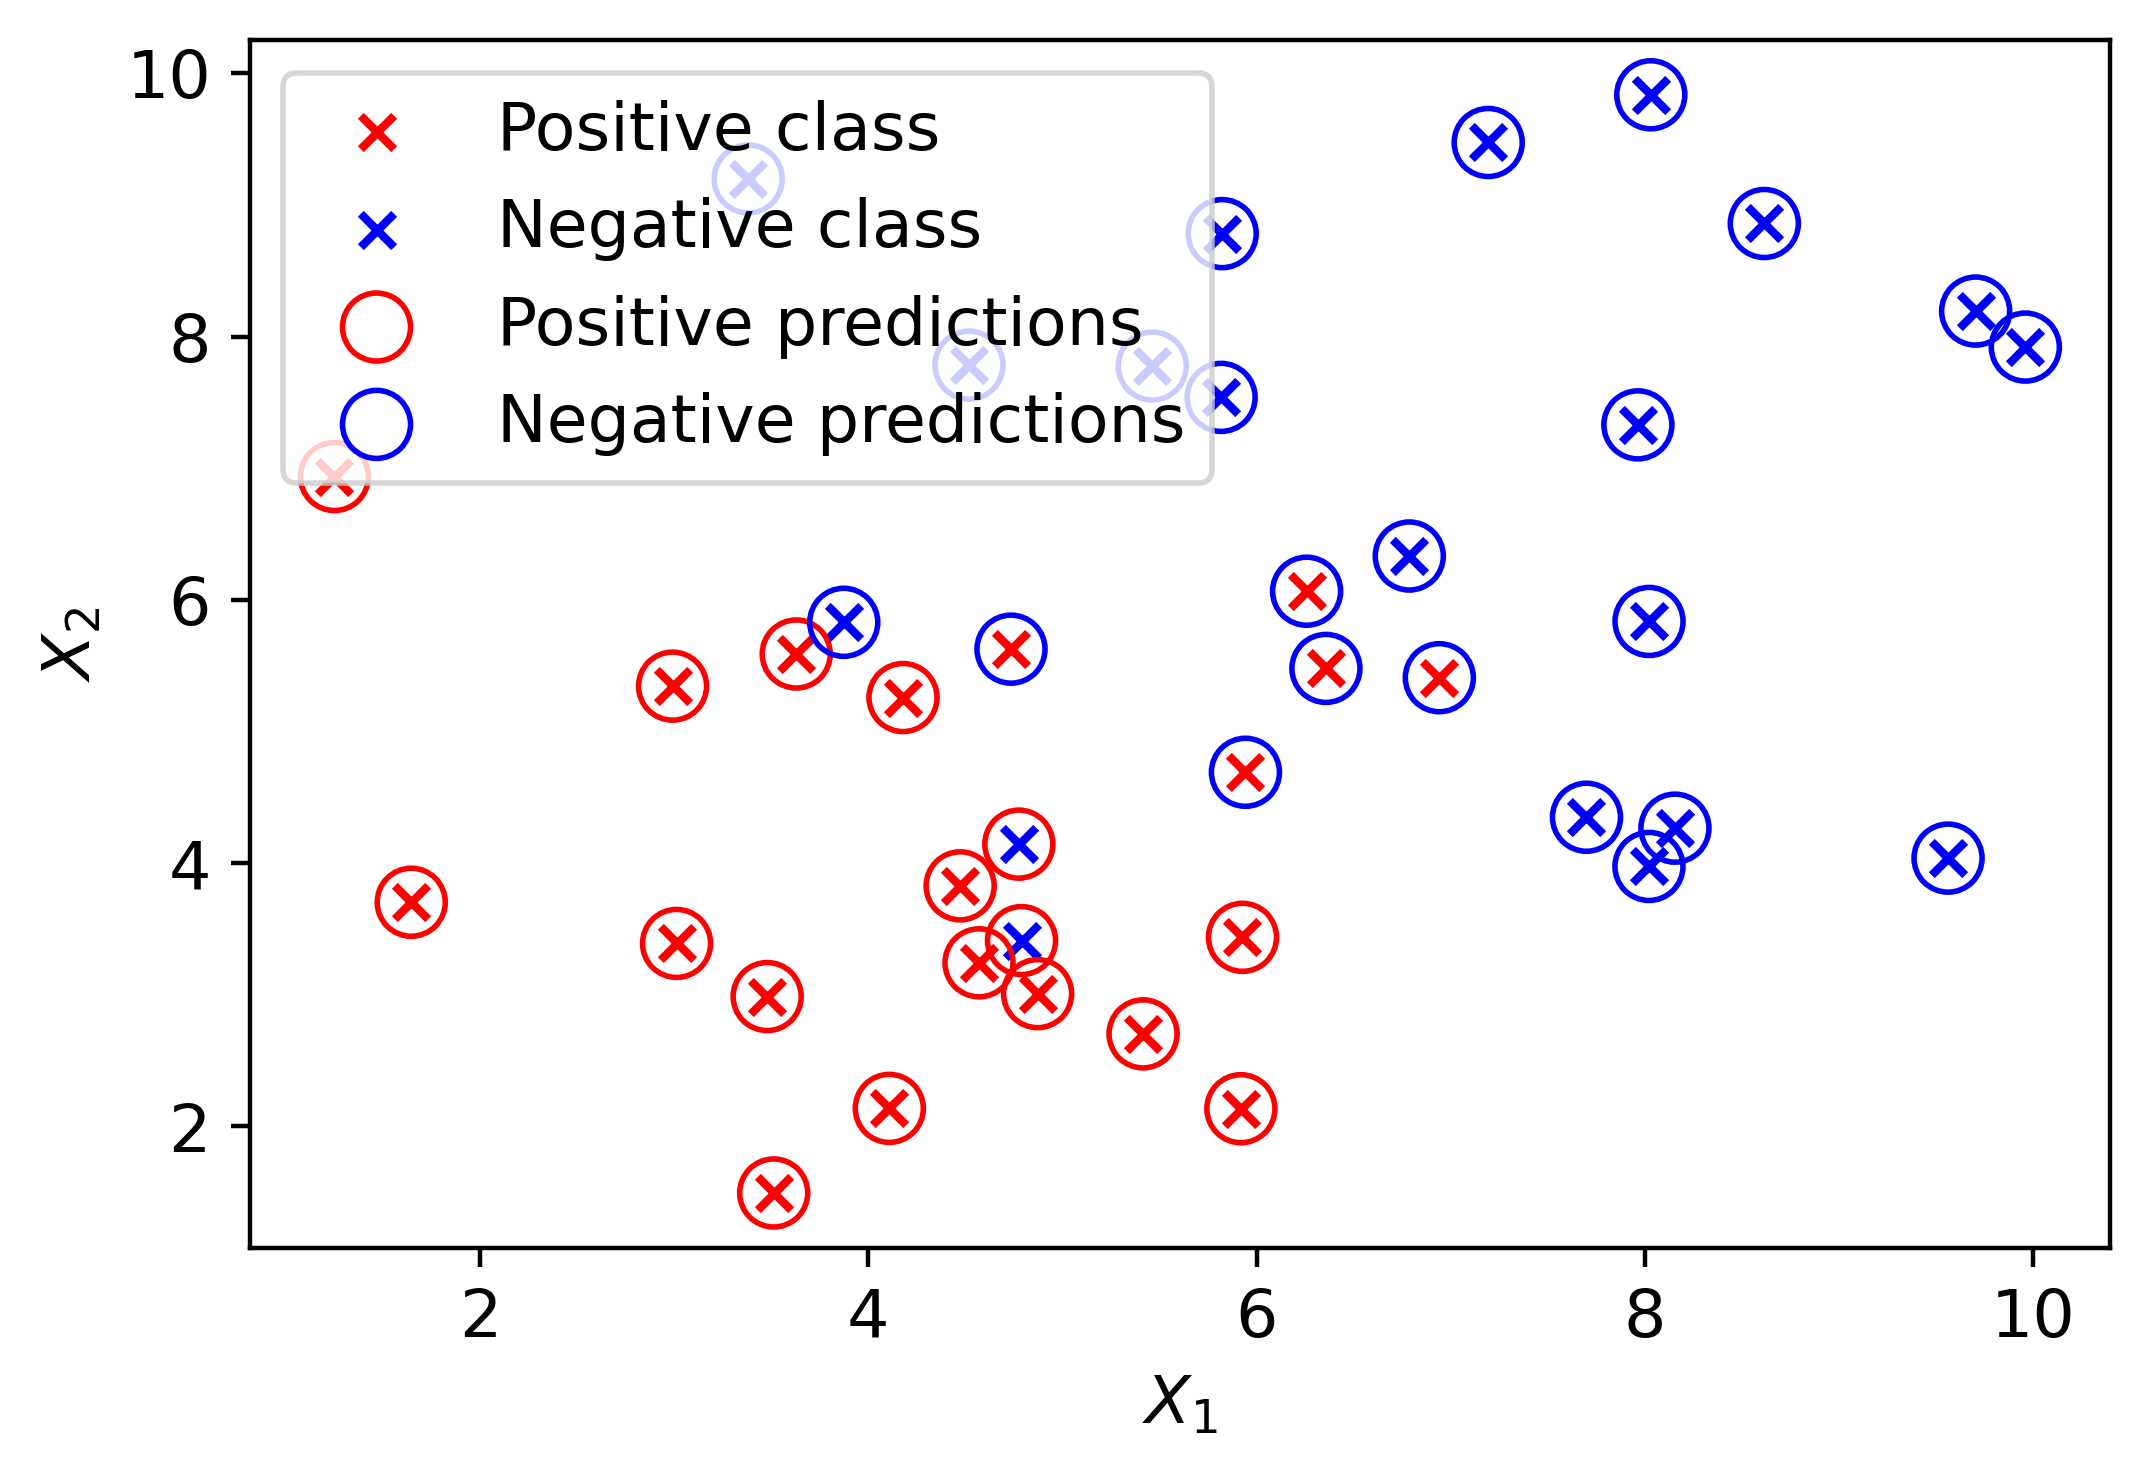

In [403]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions', 'Negative predictions'])

In [404]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.20245058016285844 -0.25336423626773213


In [405]:
theta_0 = example_lr.intercept_

In [406]:
X_1_decision_boundary = np.array([0, 10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

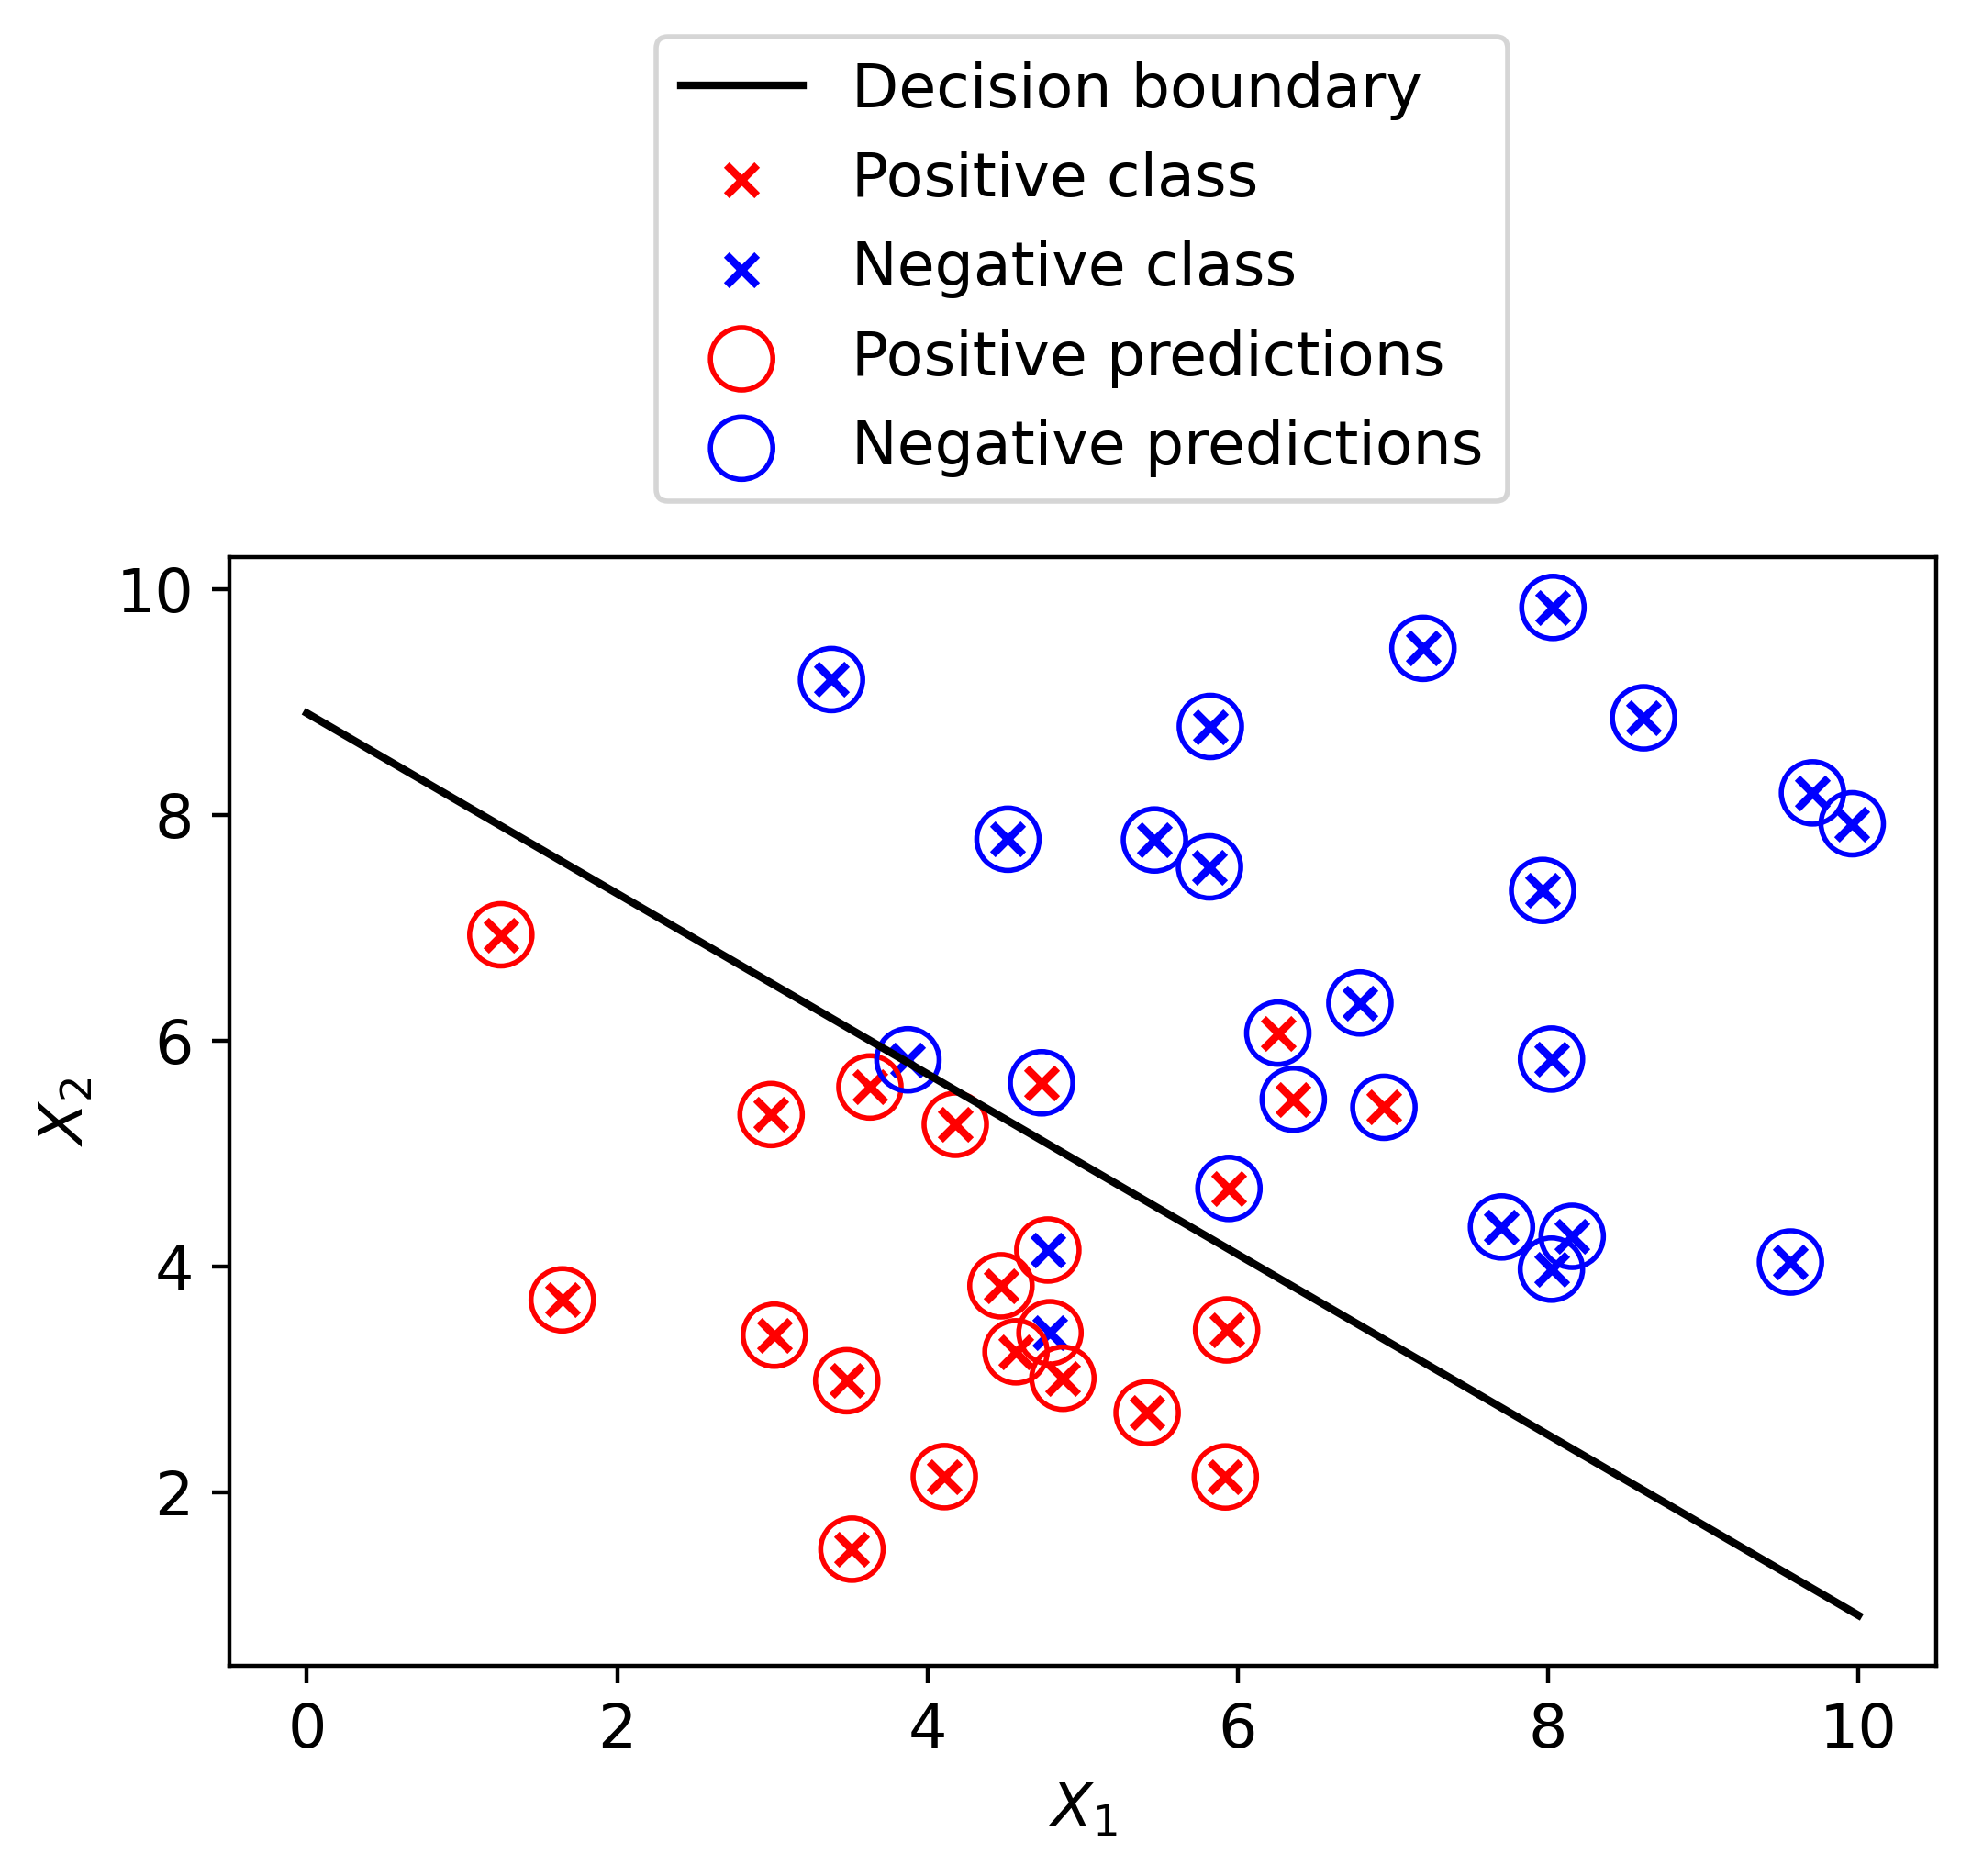

In [407]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

In [408]:
import numpy as np
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Error surface')

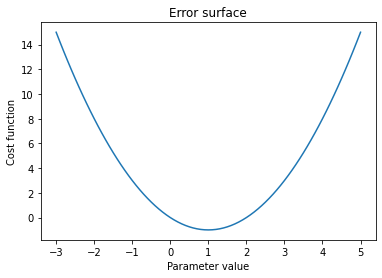

In [409]:
import matplotlib.pyplot as plt
%matplotlib inline
def cost_function(X):
    return X * (X-2)
y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Error surface')

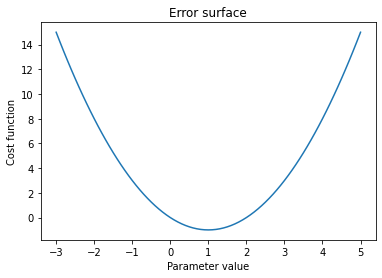

In [410]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])
def cost_function(X):
    return X * (X-2)
y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')

In [411]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5
learning_rate = 0.75
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

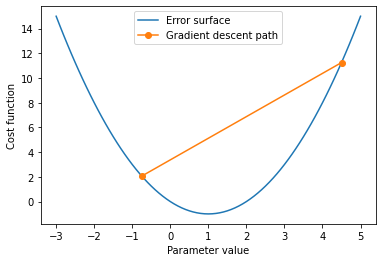

In [412]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

In [413]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1,iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

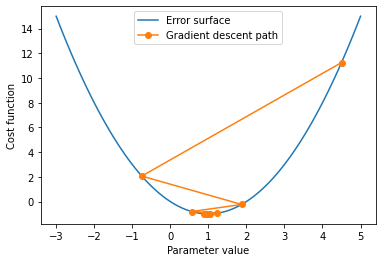

In [414]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

<AxesSubplot:>

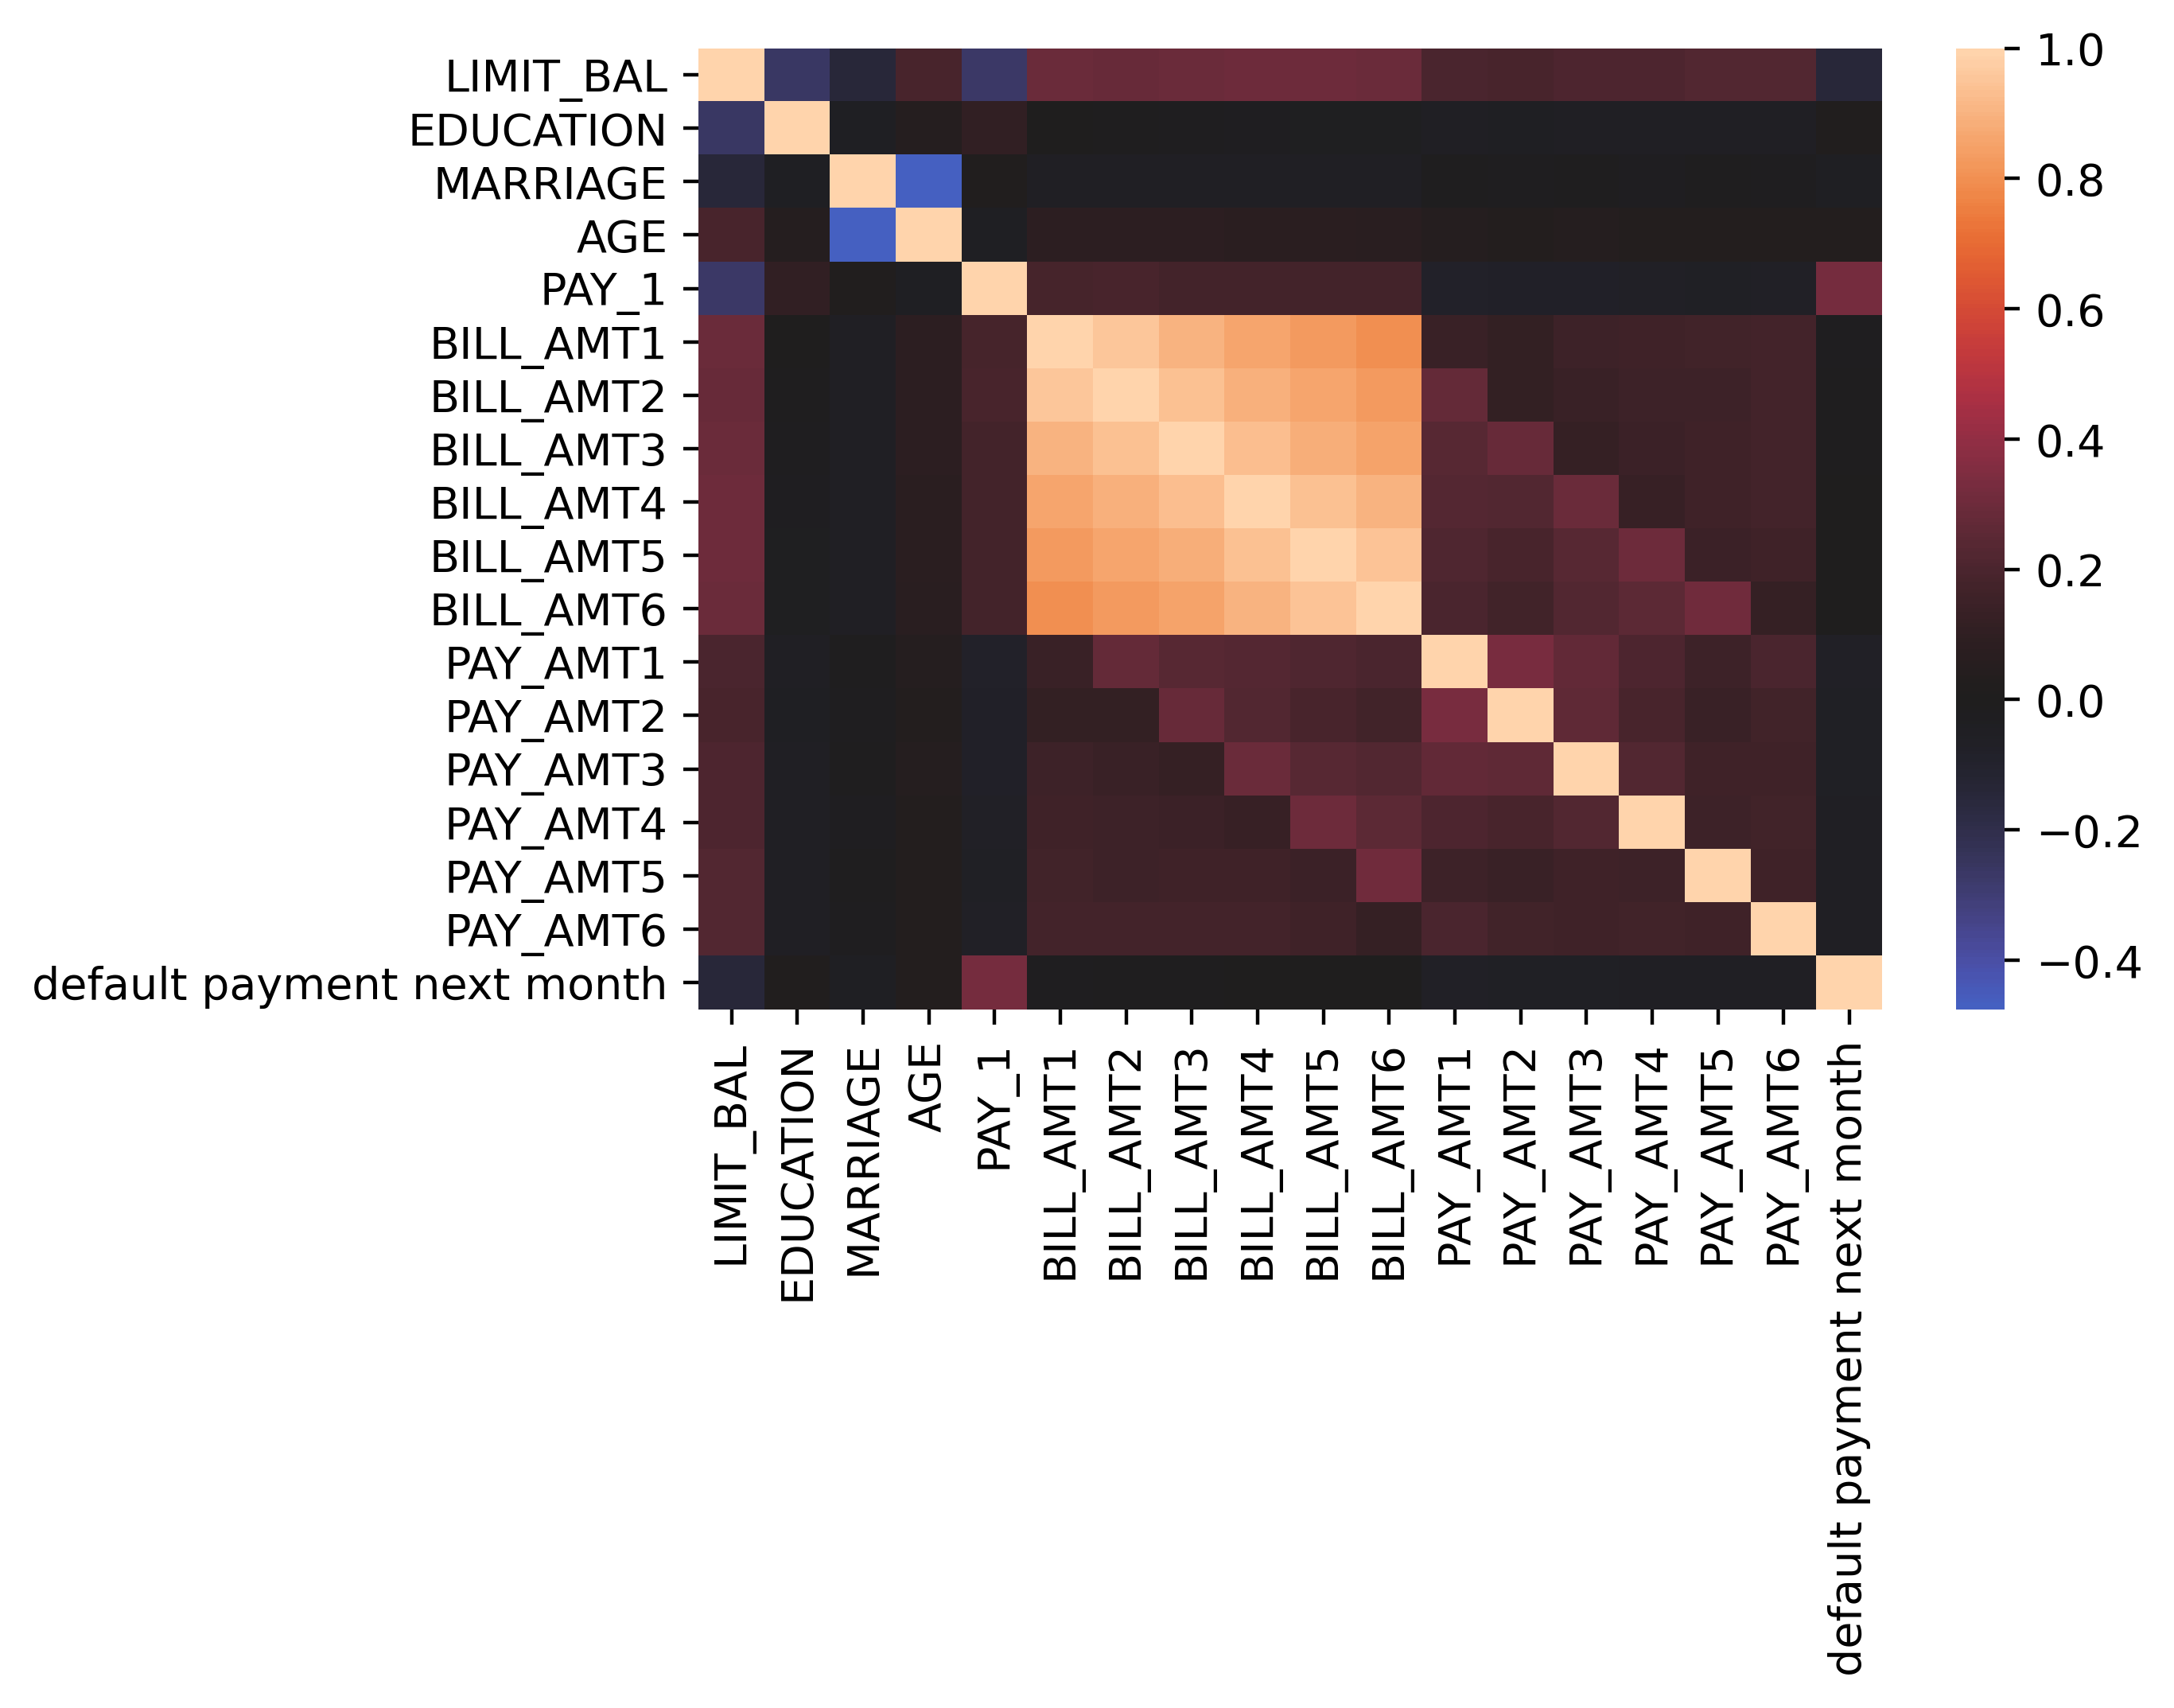

In [415]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
df = pd.read_csv('cleaned_data.csv')
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
corr = df[features_response].corr()
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [416]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [417]:
X_synthetic, y_synthetic = make_classification(
    n_samples=1000, n_features=200,
    n_informative=3, n_redundant=10,
    n_repeated=0, n_classes=2,
    n_clusters_per_class=2, weights=None,
    flip_y=0.01, class_sep=0.8,
    hypercube=True, shift=0.0,
    scale=1.0, shuffle=True,
    random_state=24
)

In [418]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


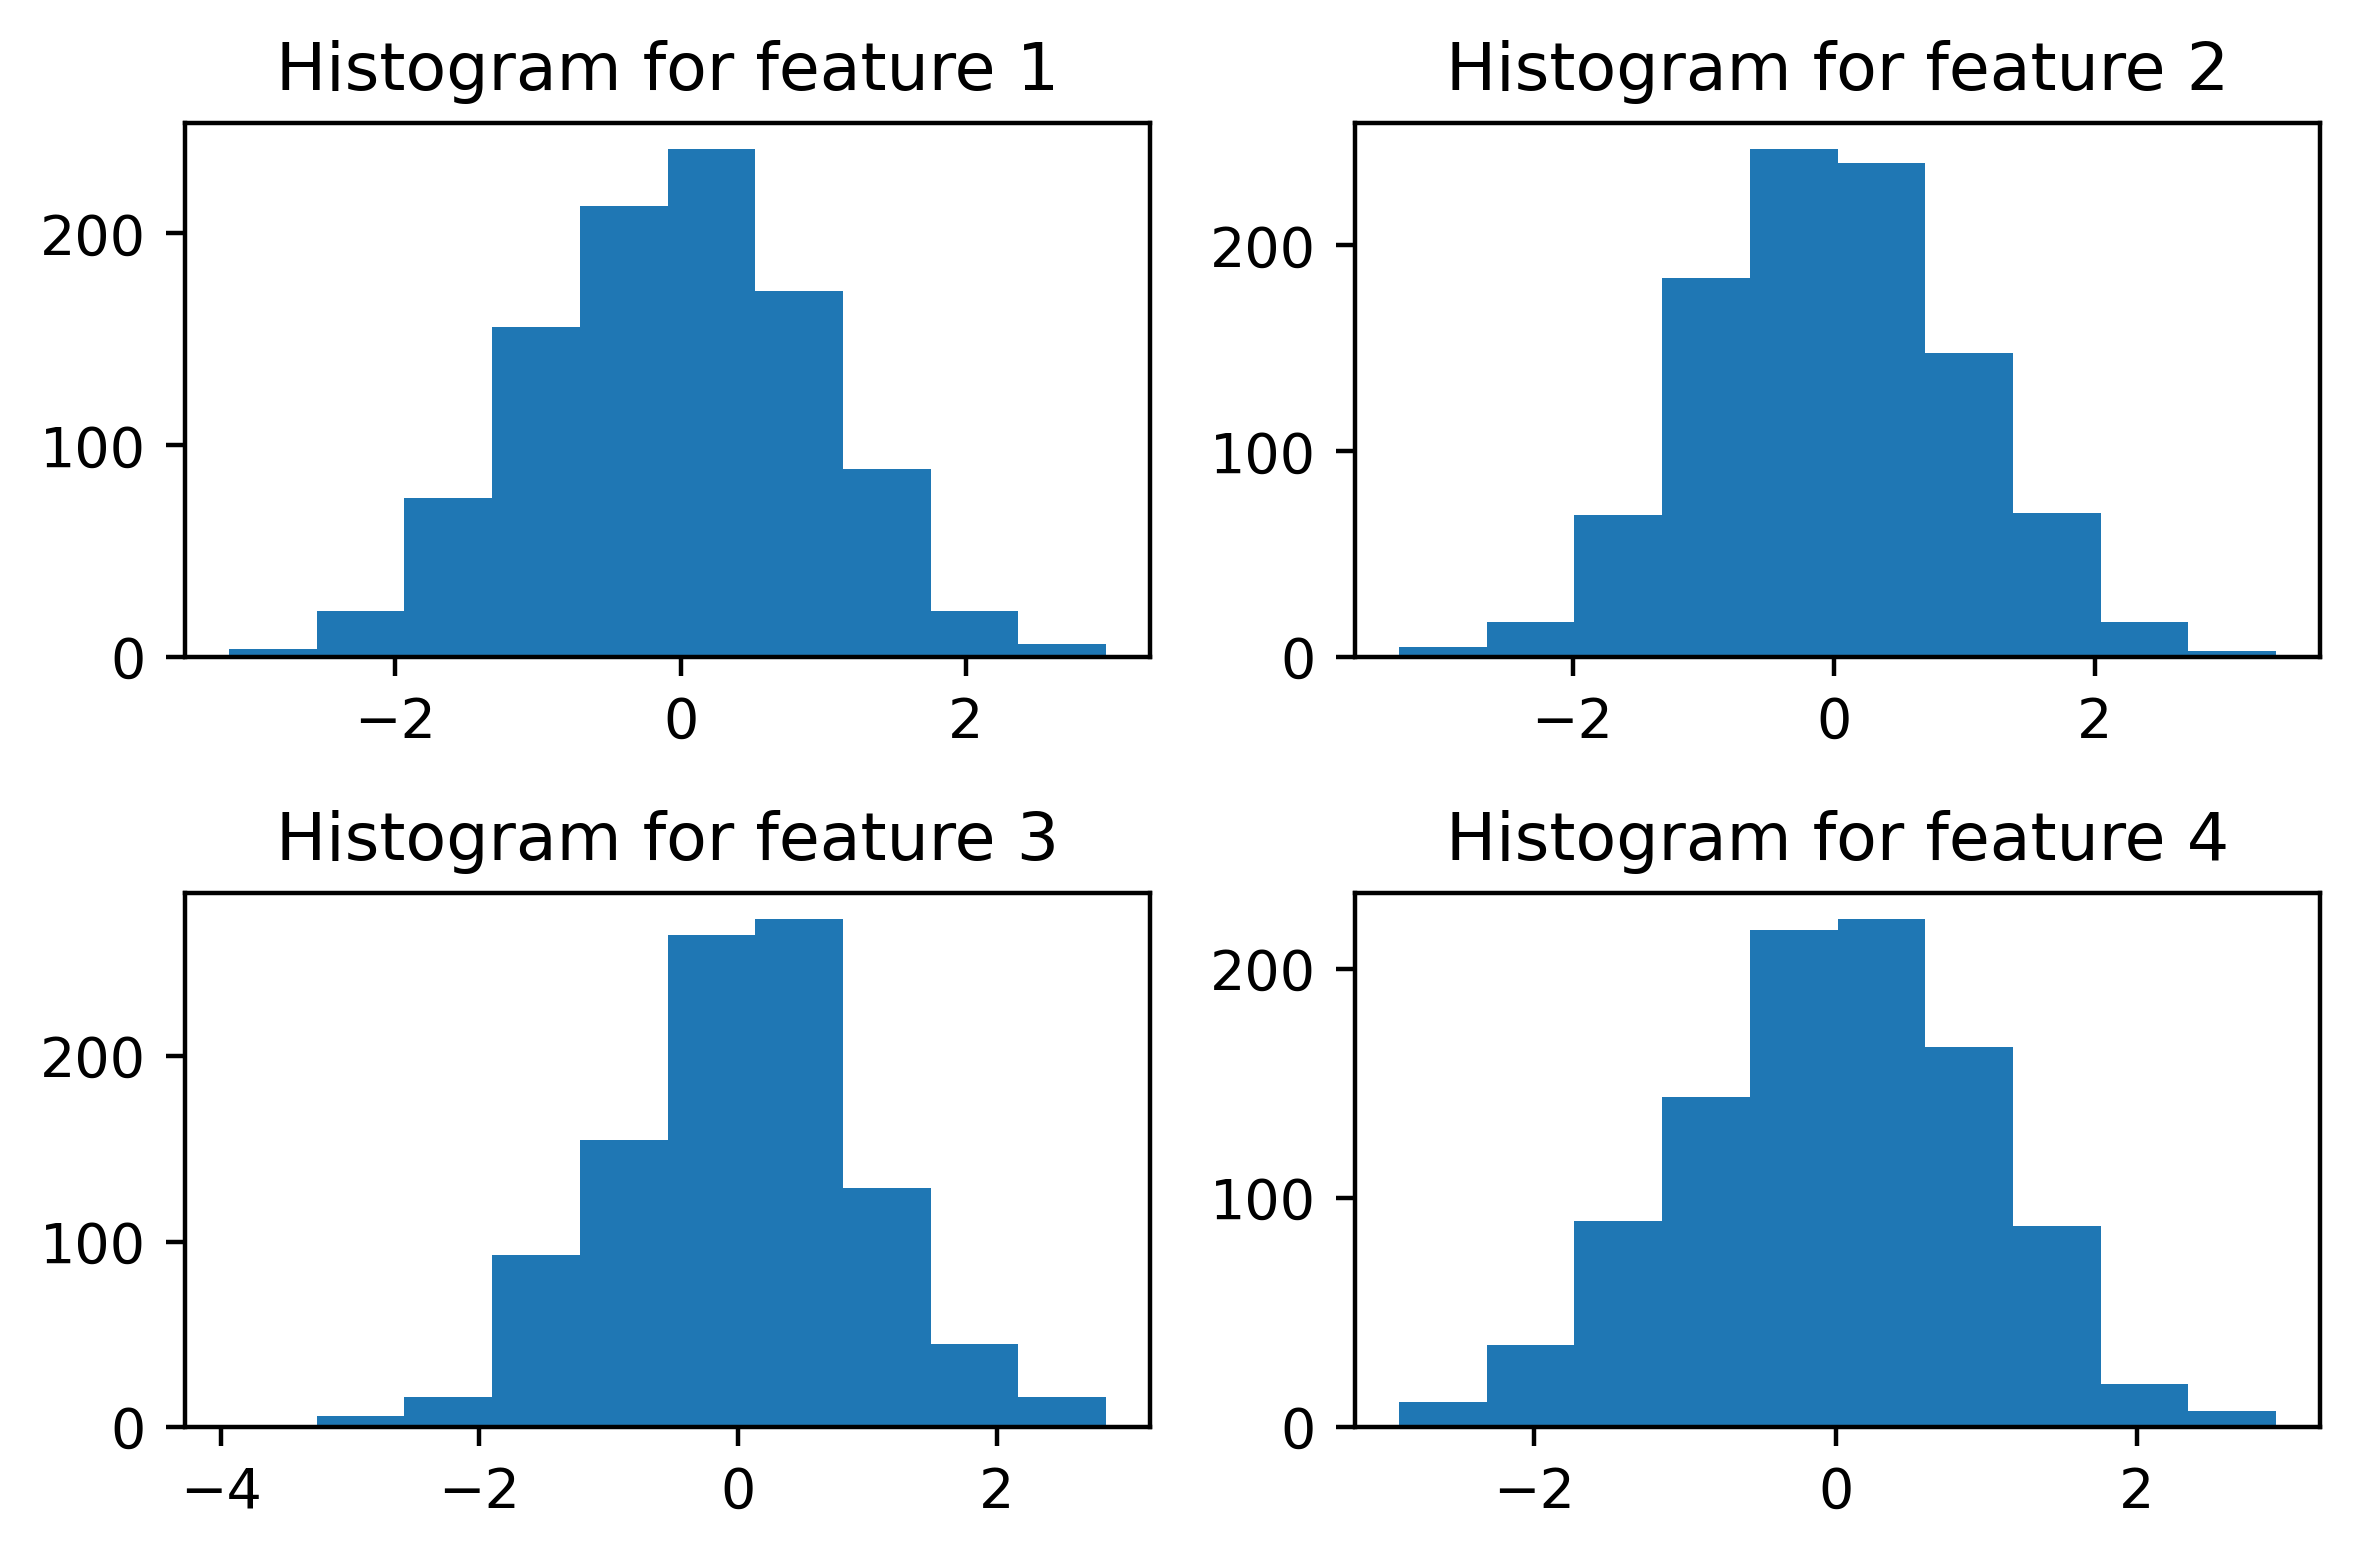

In [419]:
for plot_index in range(4):
     plt.subplot(2,2,plot_index+1)
     plt.hist(X_synthetic[:,plot_index])
     plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [420]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_synthetic, y_synthetic,
    test_size=0.2, random_state=24
)
lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [421]:
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [422]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9420000000000001

In [423]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8075807580758075

In [424]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [425]:
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False, random_state=1)

C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [426]:
def plot_kfolds(k_folds_iterator):
    fold_counter = 0
    for train_index, test_index in k_folds_iterator.split(X_syn_train, y_syn_train):
 
        #Axis to hold the plot of this fold
        ax = plt.subplot(n_folds,1,fold_counter+1)
 
        #Background rectangle representing all samples
        n_train_samples = len(y_syn_train)
        rect = mpl.patches.Rectangle(xy=(0,0), width=n_train_samples, height=1)
        ax.add_patch(rect)
 
        #Plot each testing sample from this fold as a vertical line
        for this_text_ix in test_index:
            ax.plot([this_text_ix, this_text_ix], [0, 1], color='orange',
                    linewidth=0.75)
 
        #Plot formatting
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0, n_train_samples)
        ax.set_ylim(0,1)
 
        #Subplot titles
        if fold_counter == 0:
            ax.text(0.26, 1.2, 'Training data,',
                    transform=ax.transAxes, backgroundcolor = 'blue')
            ax.text(0.45, 1.2, 'testing data:',
                    transform=ax.transAxes, backgroundcolor = 'orange')
            ax.text(0.62, 1.2, 'fold {}'.format(fold_counter+1), transform=ax.transAxes)
        else:
            ax.text(0.45, 1.2, 'Fold {}'.format(fold_counter+1), transform=ax.transAxes)
 
        fold_counter += 1
 
    plt.tight_layout()

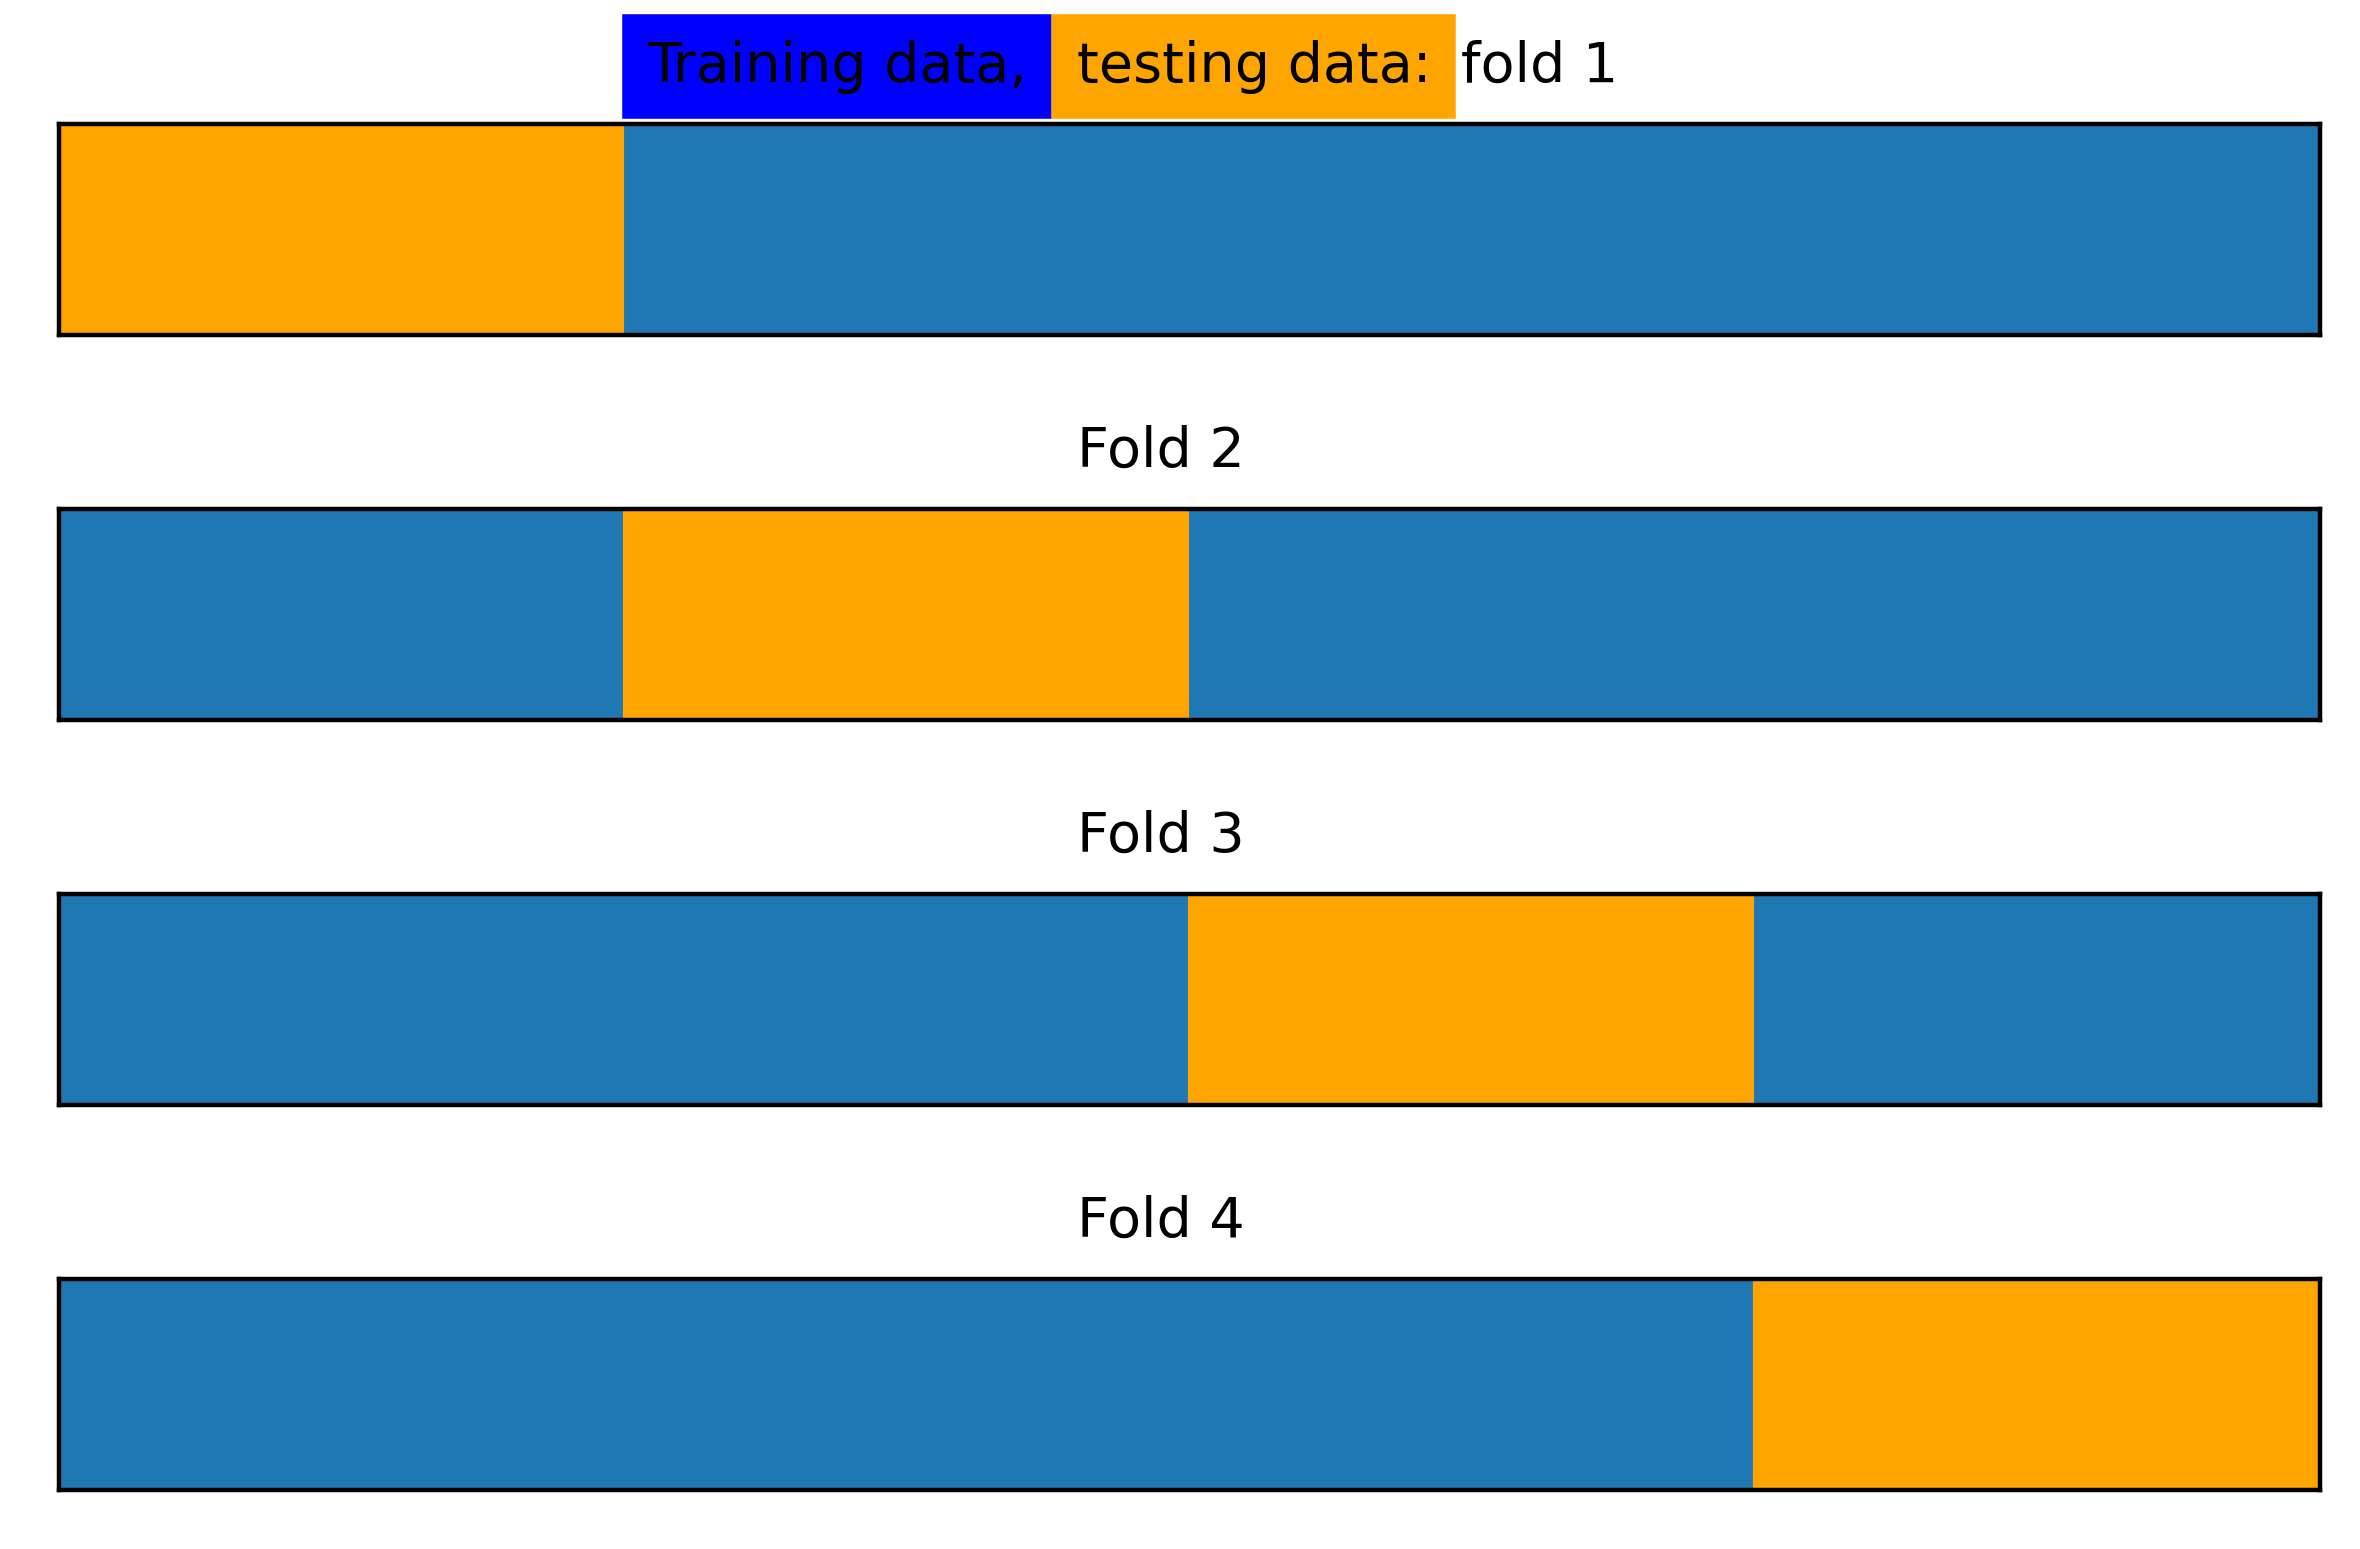

In [427]:
plot_kfolds(k_folds)

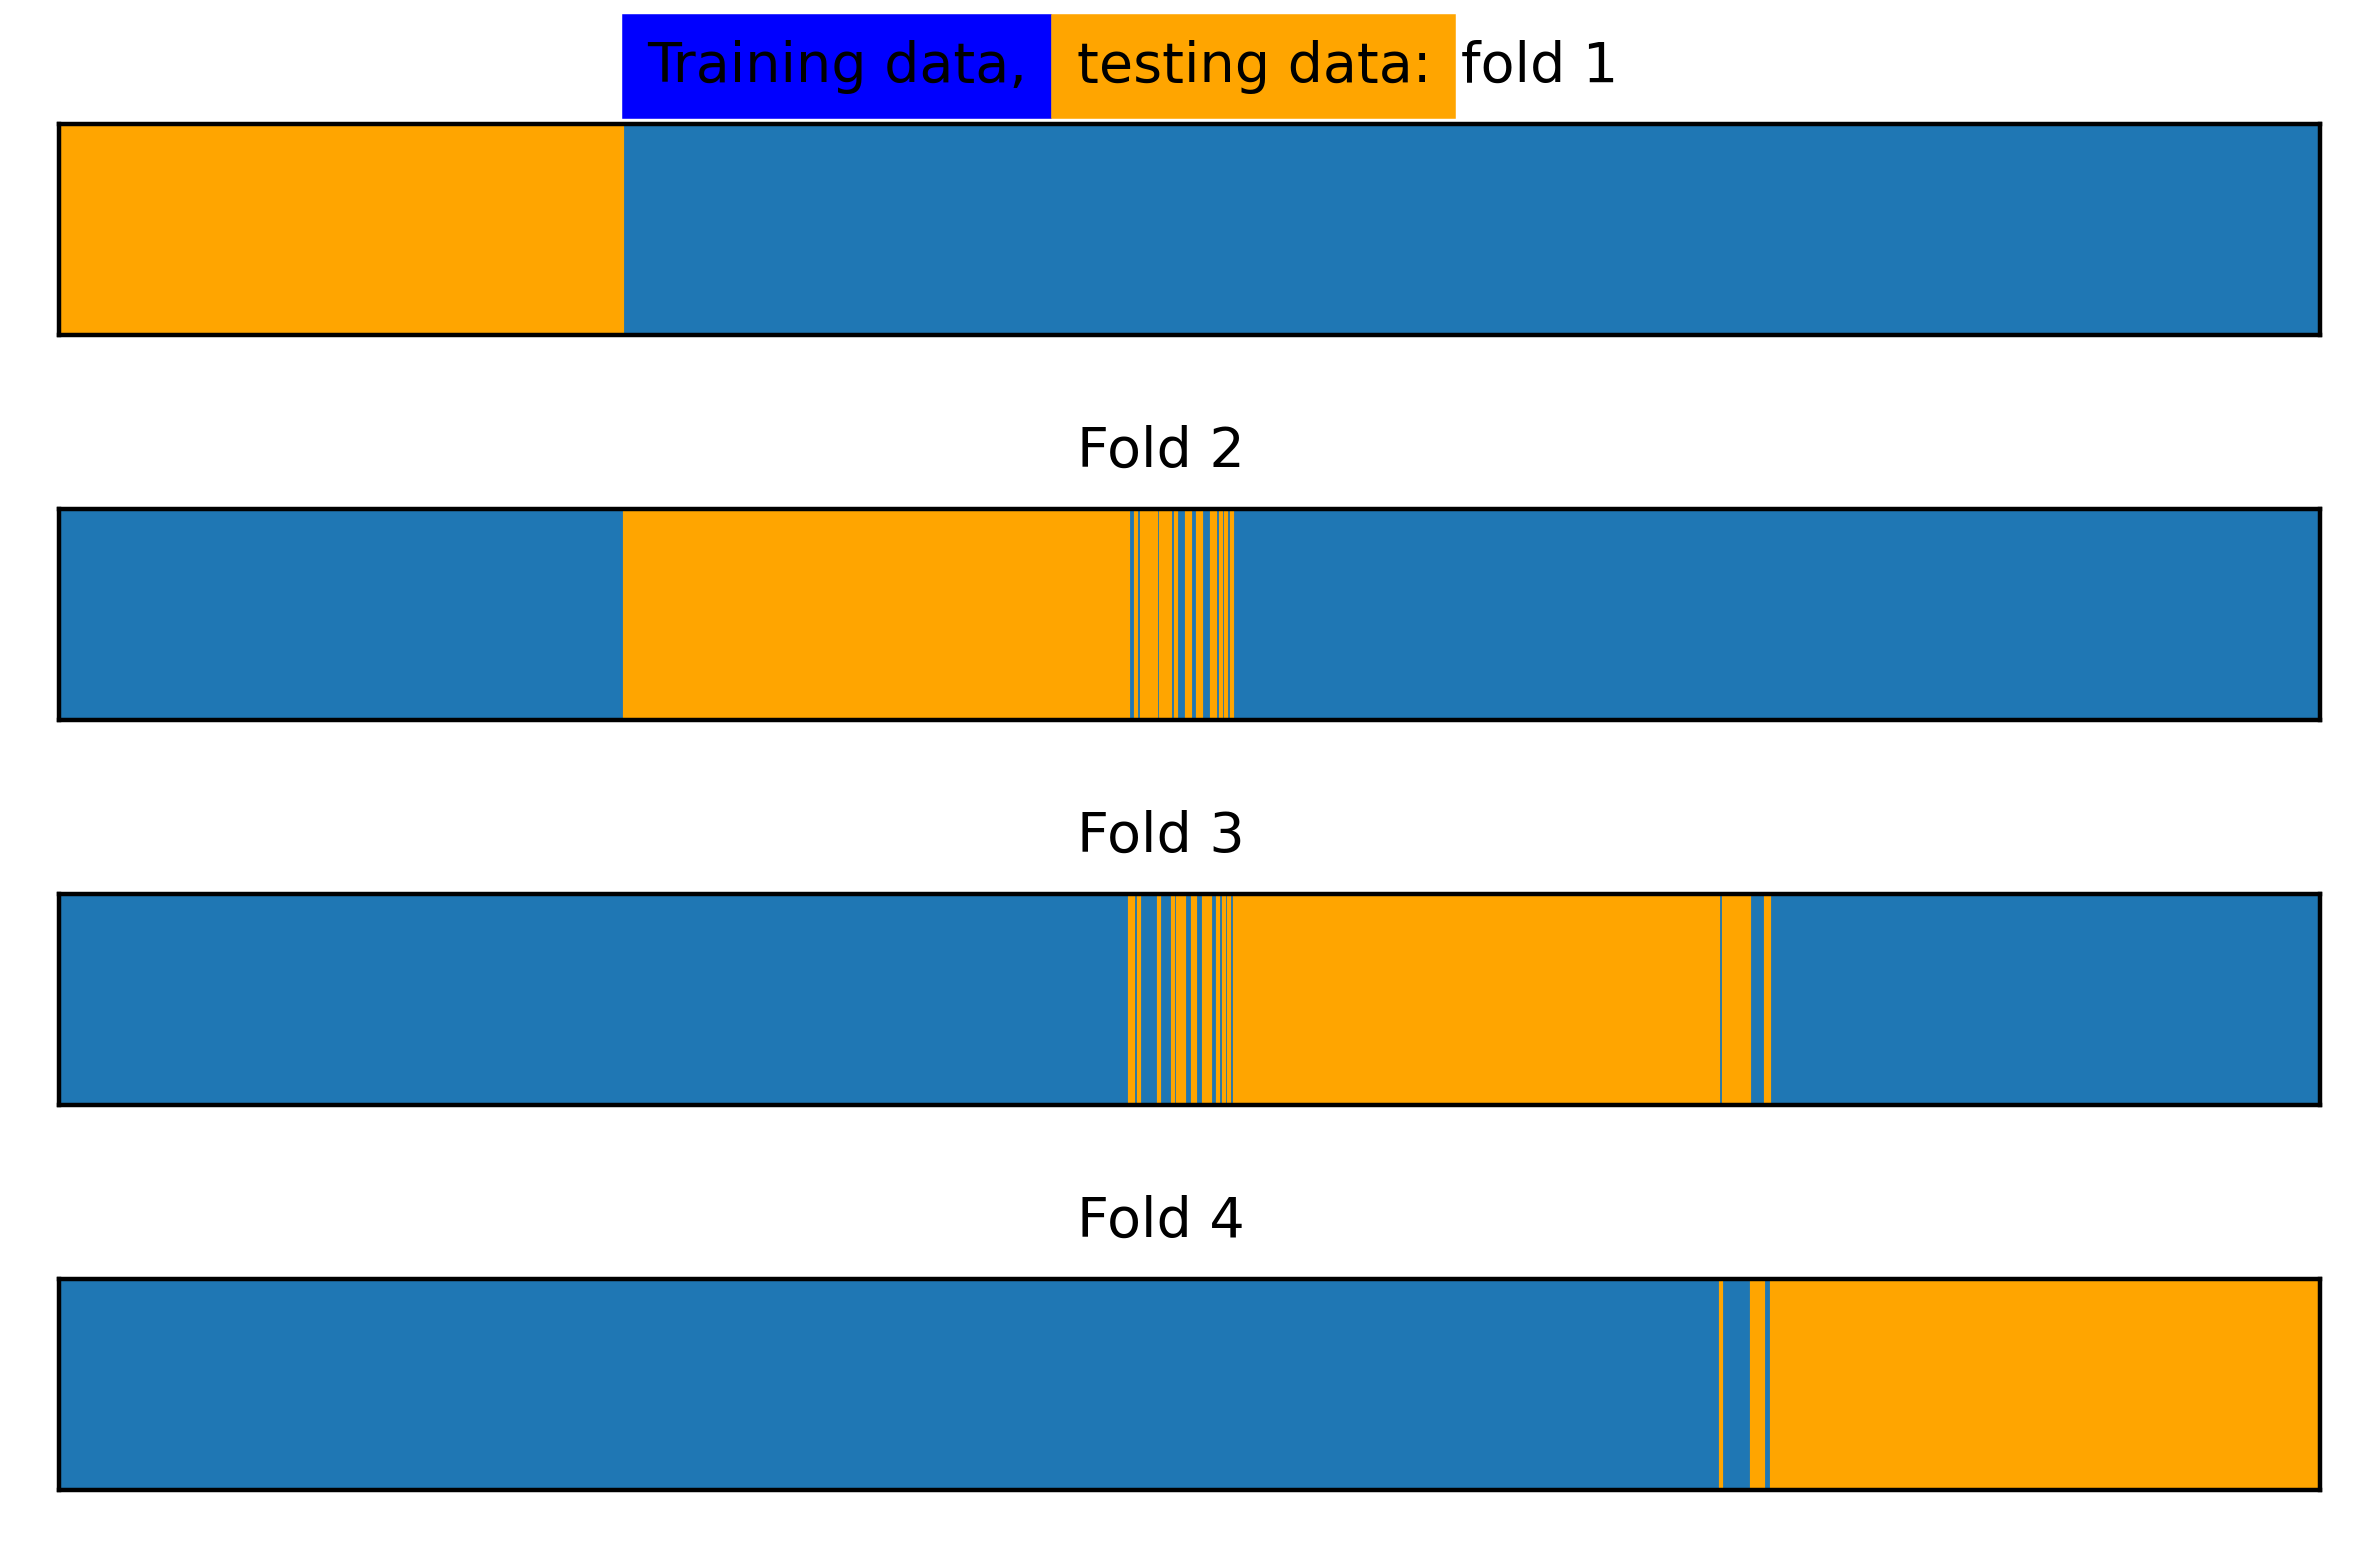

In [428]:
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=False, random_state=1)
plot_kfolds(k_folds)

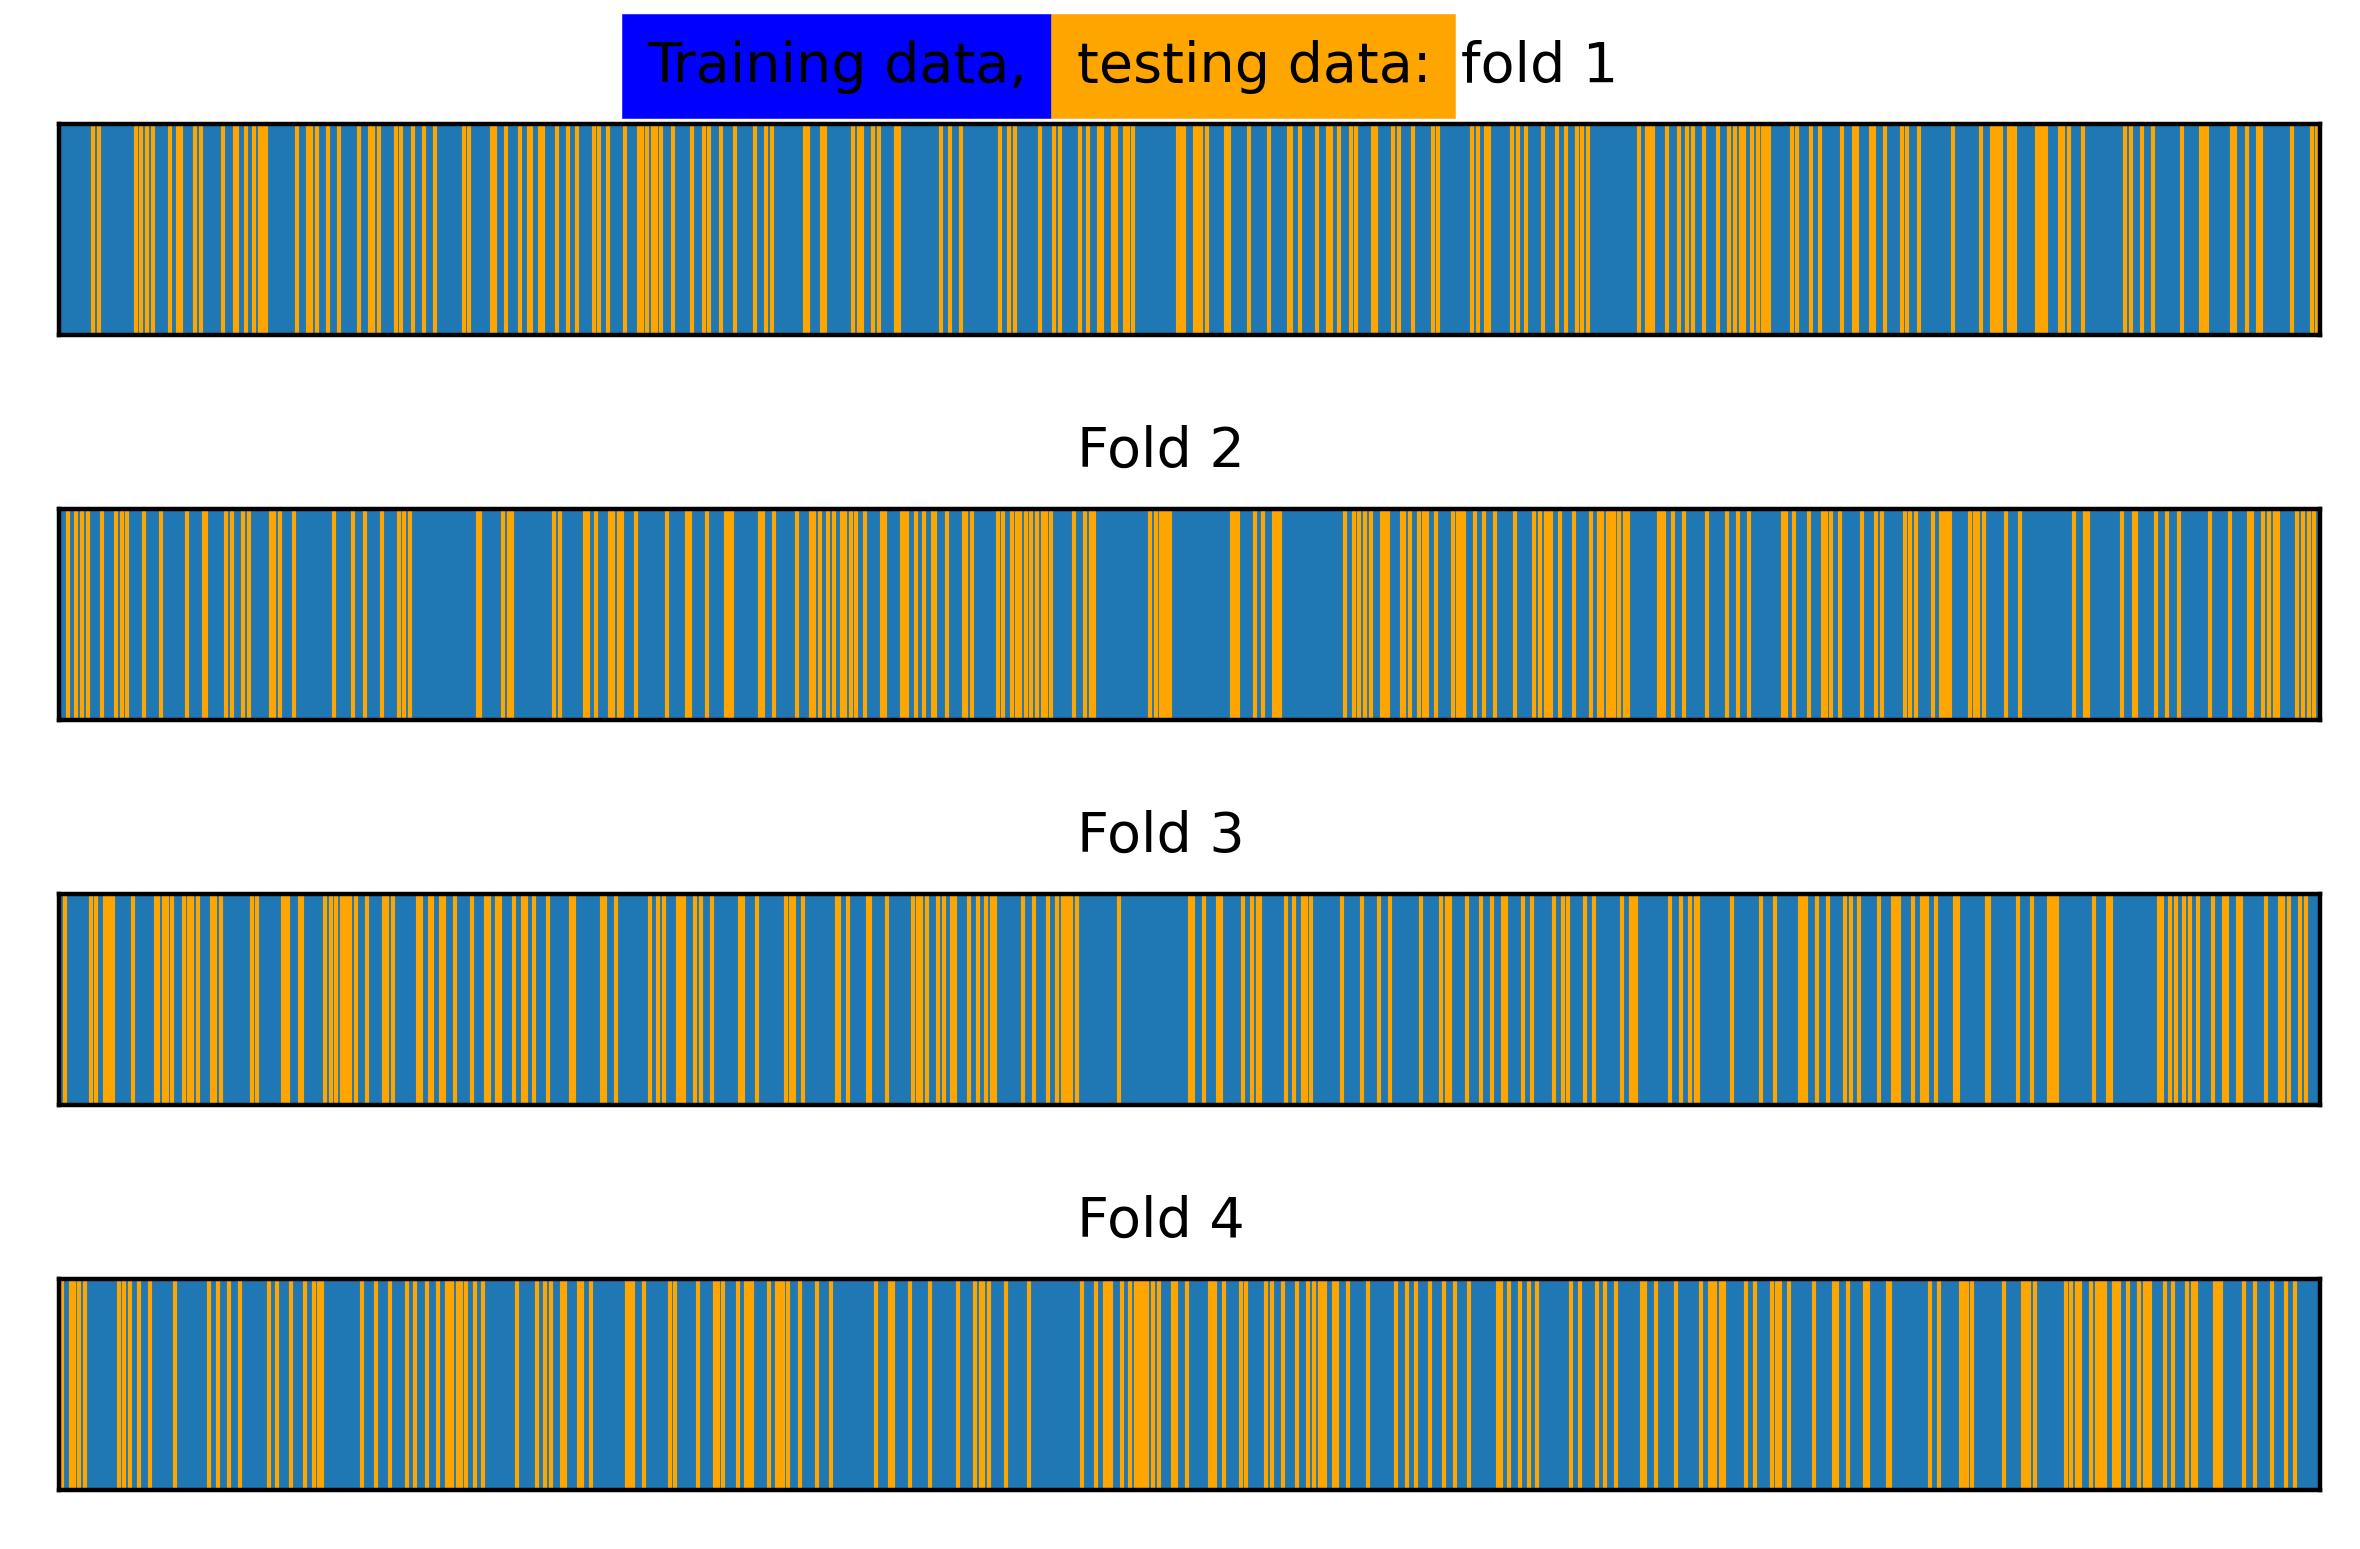

In [429]:
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
plot_kfolds(k_folds)

In [430]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [431]:
C_vals = np.float(10)**C_val_exponents
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [432]:
from sklearn.metrics import roc_curve

In [433]:
def cross_val_C_search(k_folds, C_vals, model, X, Y):
        n_folds = k_folds.n_splits
        cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
        cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
        cv_test_roc = [[]]*len(C_vals)
        for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
            model.C = C_vals[c_val_counter]
        #Count folds for each value of C
            fold_counter = 0
         #Get training and testing indices for each fold
            for train_index, test_index in k_folds.split(X, Y):
                        #Subset the features and response, for training and testing data for
            #this fold
                X_cv_train, X_cv_test = X[train_index], X[test_index]
                y_cv_train, y_cv_test = Y[train_index], Y[test_index]
            #Fit the model on the training data
                model.fit(X_cv_train, y_cv_train)
            #Get the training ROC AUC
                y_cv_train_predict_proba = model.predict_proba(X_cv_train)
                cv_train_roc_auc[fold_counter, c_val_counter] = \
                roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])
                        #Get the testing ROC AUC
                y_cv_test_predict_proba = model.predict_proba(X_cv_test)
                cv_test_roc_auc[fold_counter, c_val_counter] = \
                roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
            #Testing ROC curves for each fold
                this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
                cv_test_roc[c_val_counter].append(this_fold_roc)
            #Increment the fold counter
                fold_counter += 1
        #Indicate progress
            print('Done with C = {}'.format(lr_syn.C))
        return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [434]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation scores for each fold')

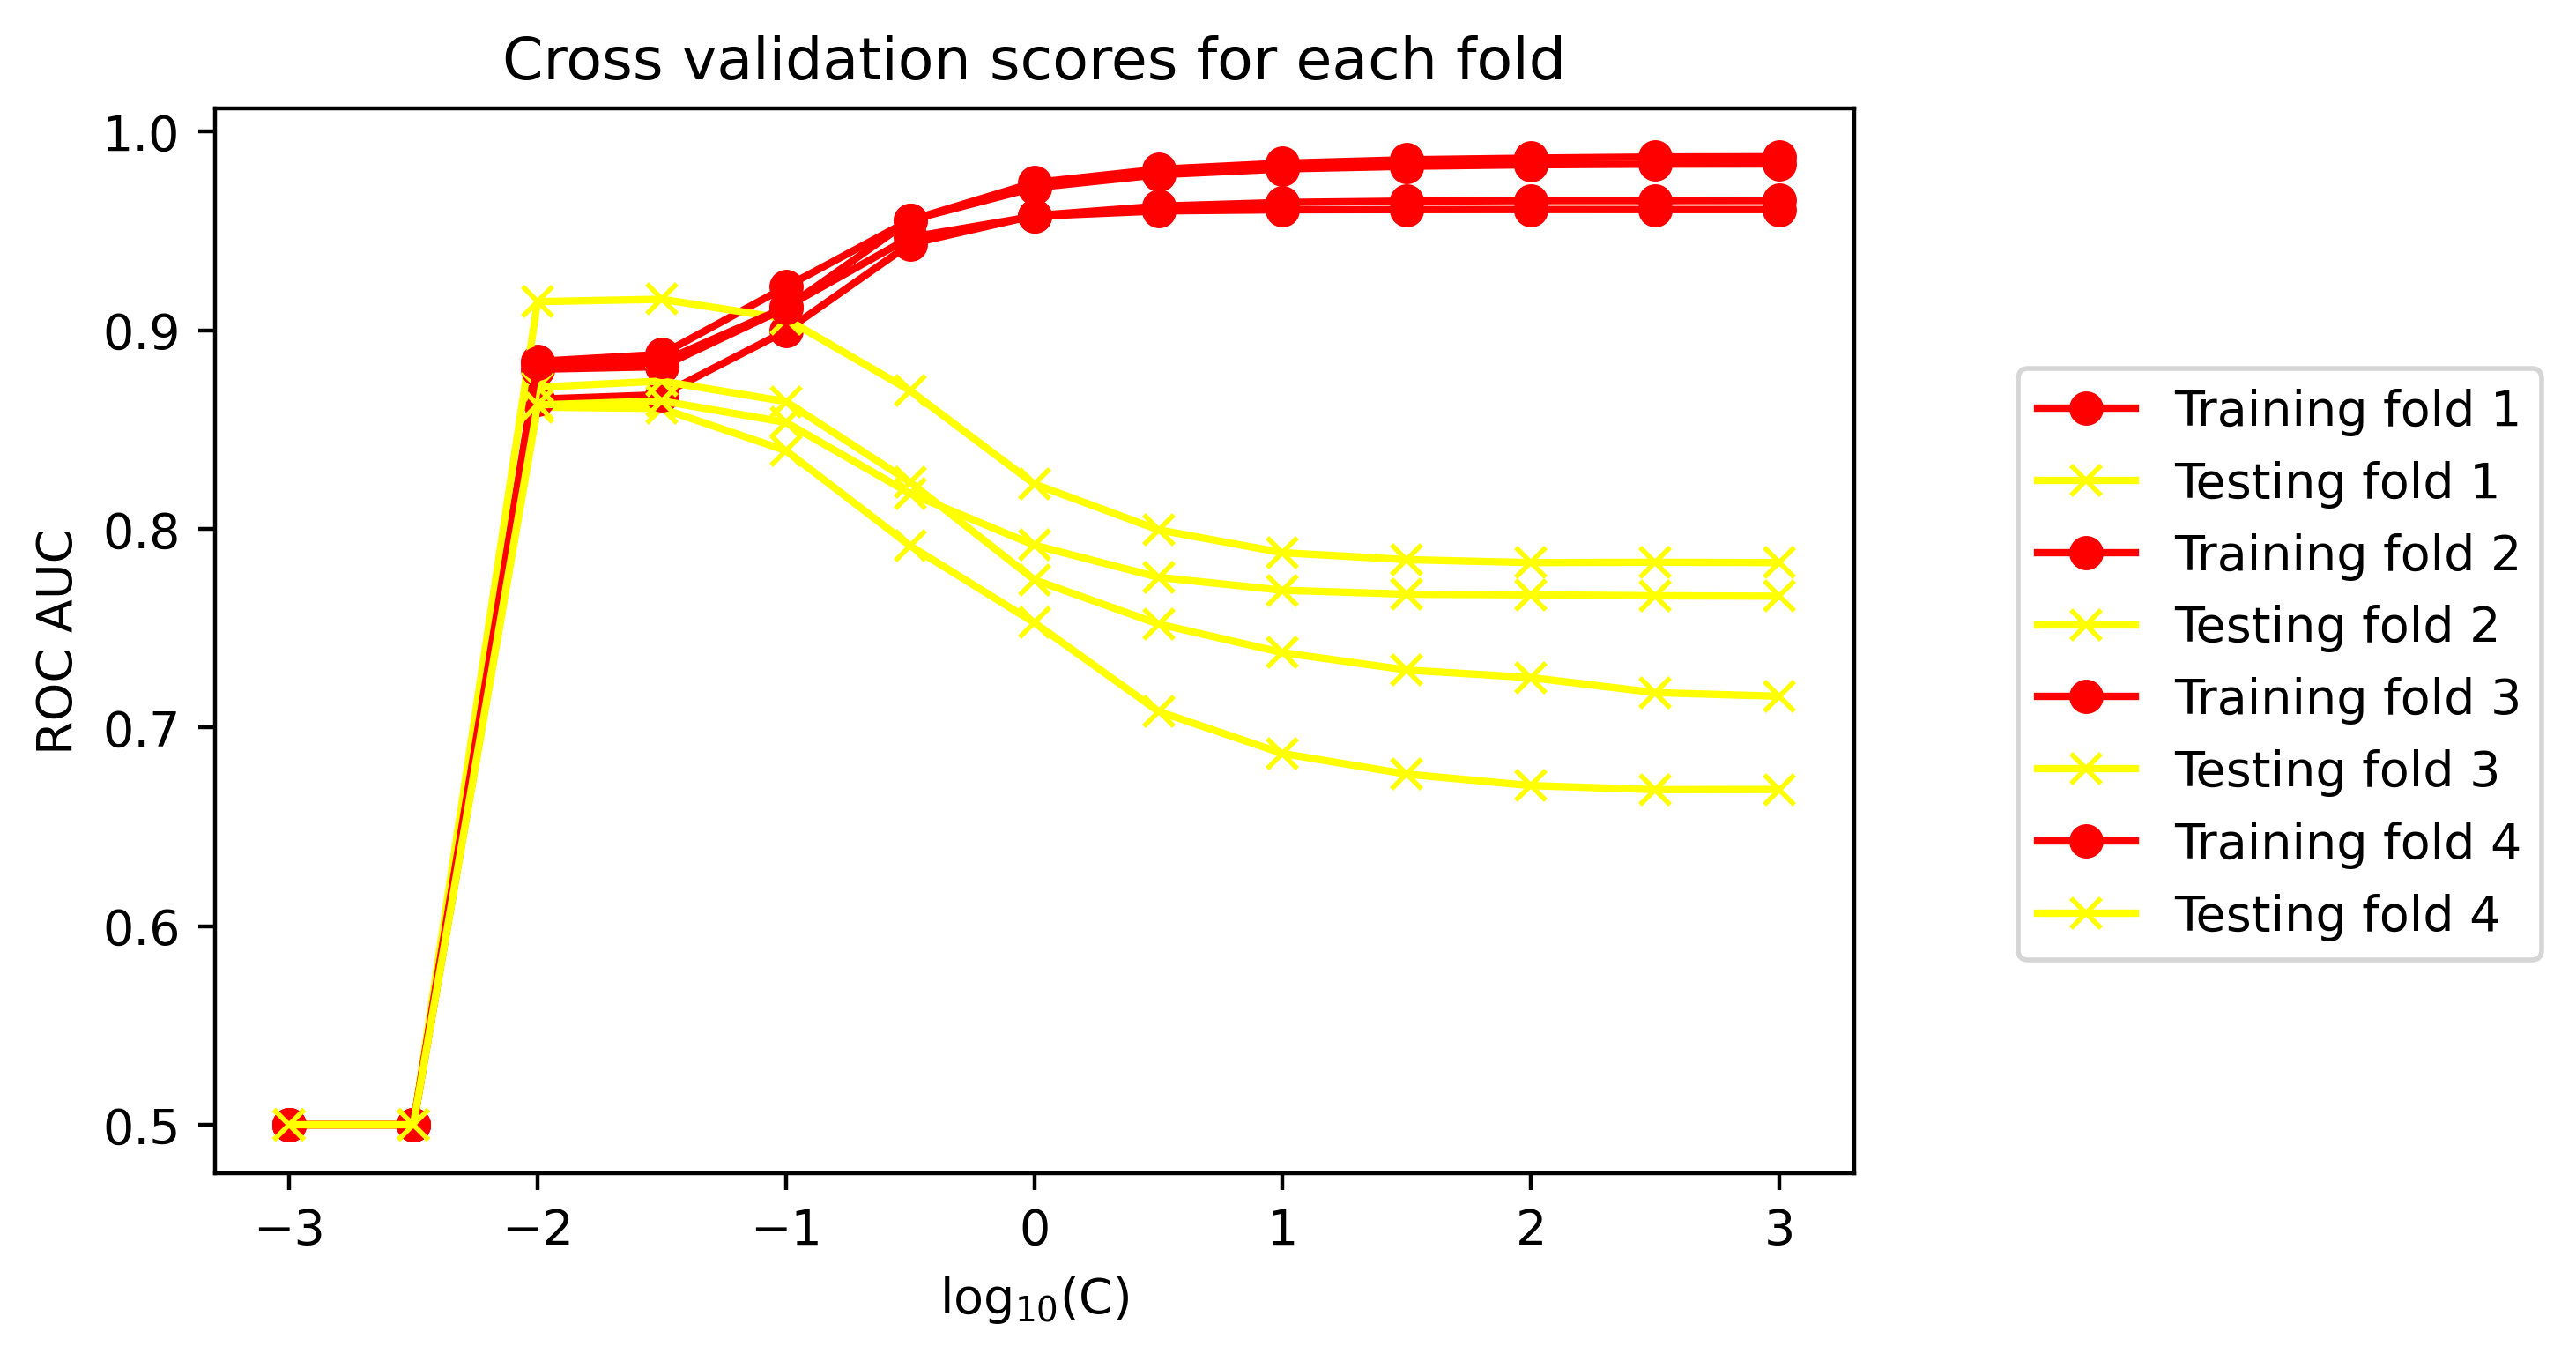

In [435]:
for this_fold in range(n_folds):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o',
             color='red', label='Training fold {}'.format(this_fold+1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x',
             color='yellow', label='Testing fold {}'.format(this_fold+1))
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

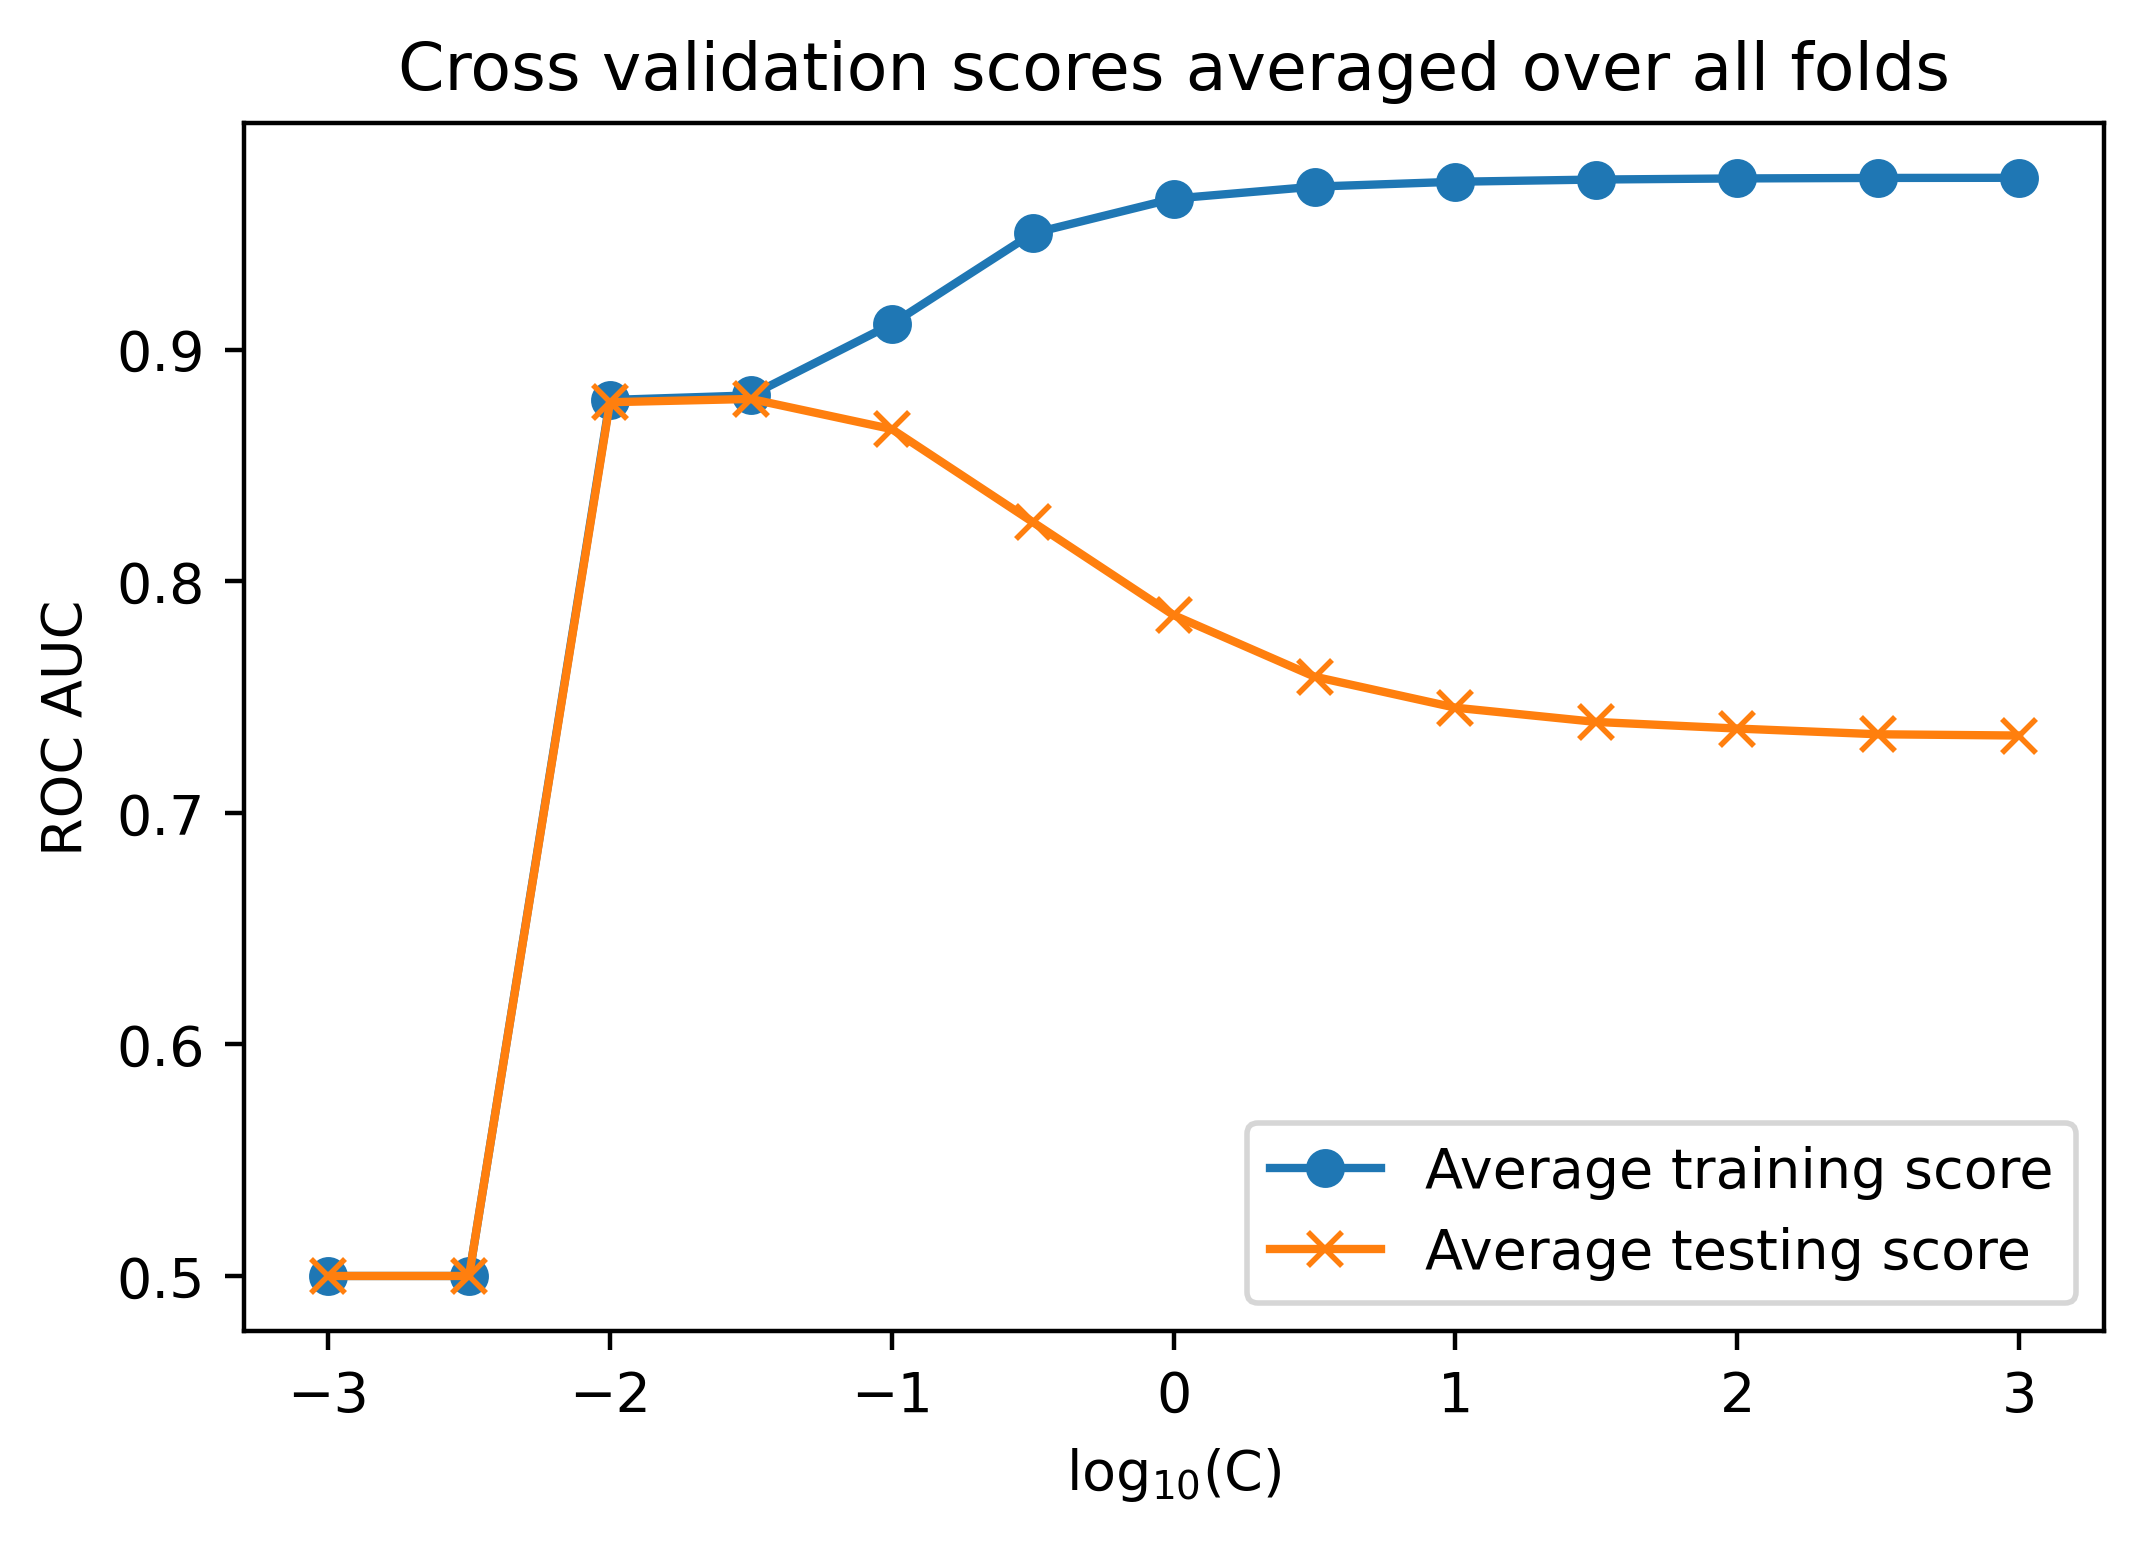

In [436]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

In [437]:
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [438]:
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
best_C_val_ix[0][0]

9

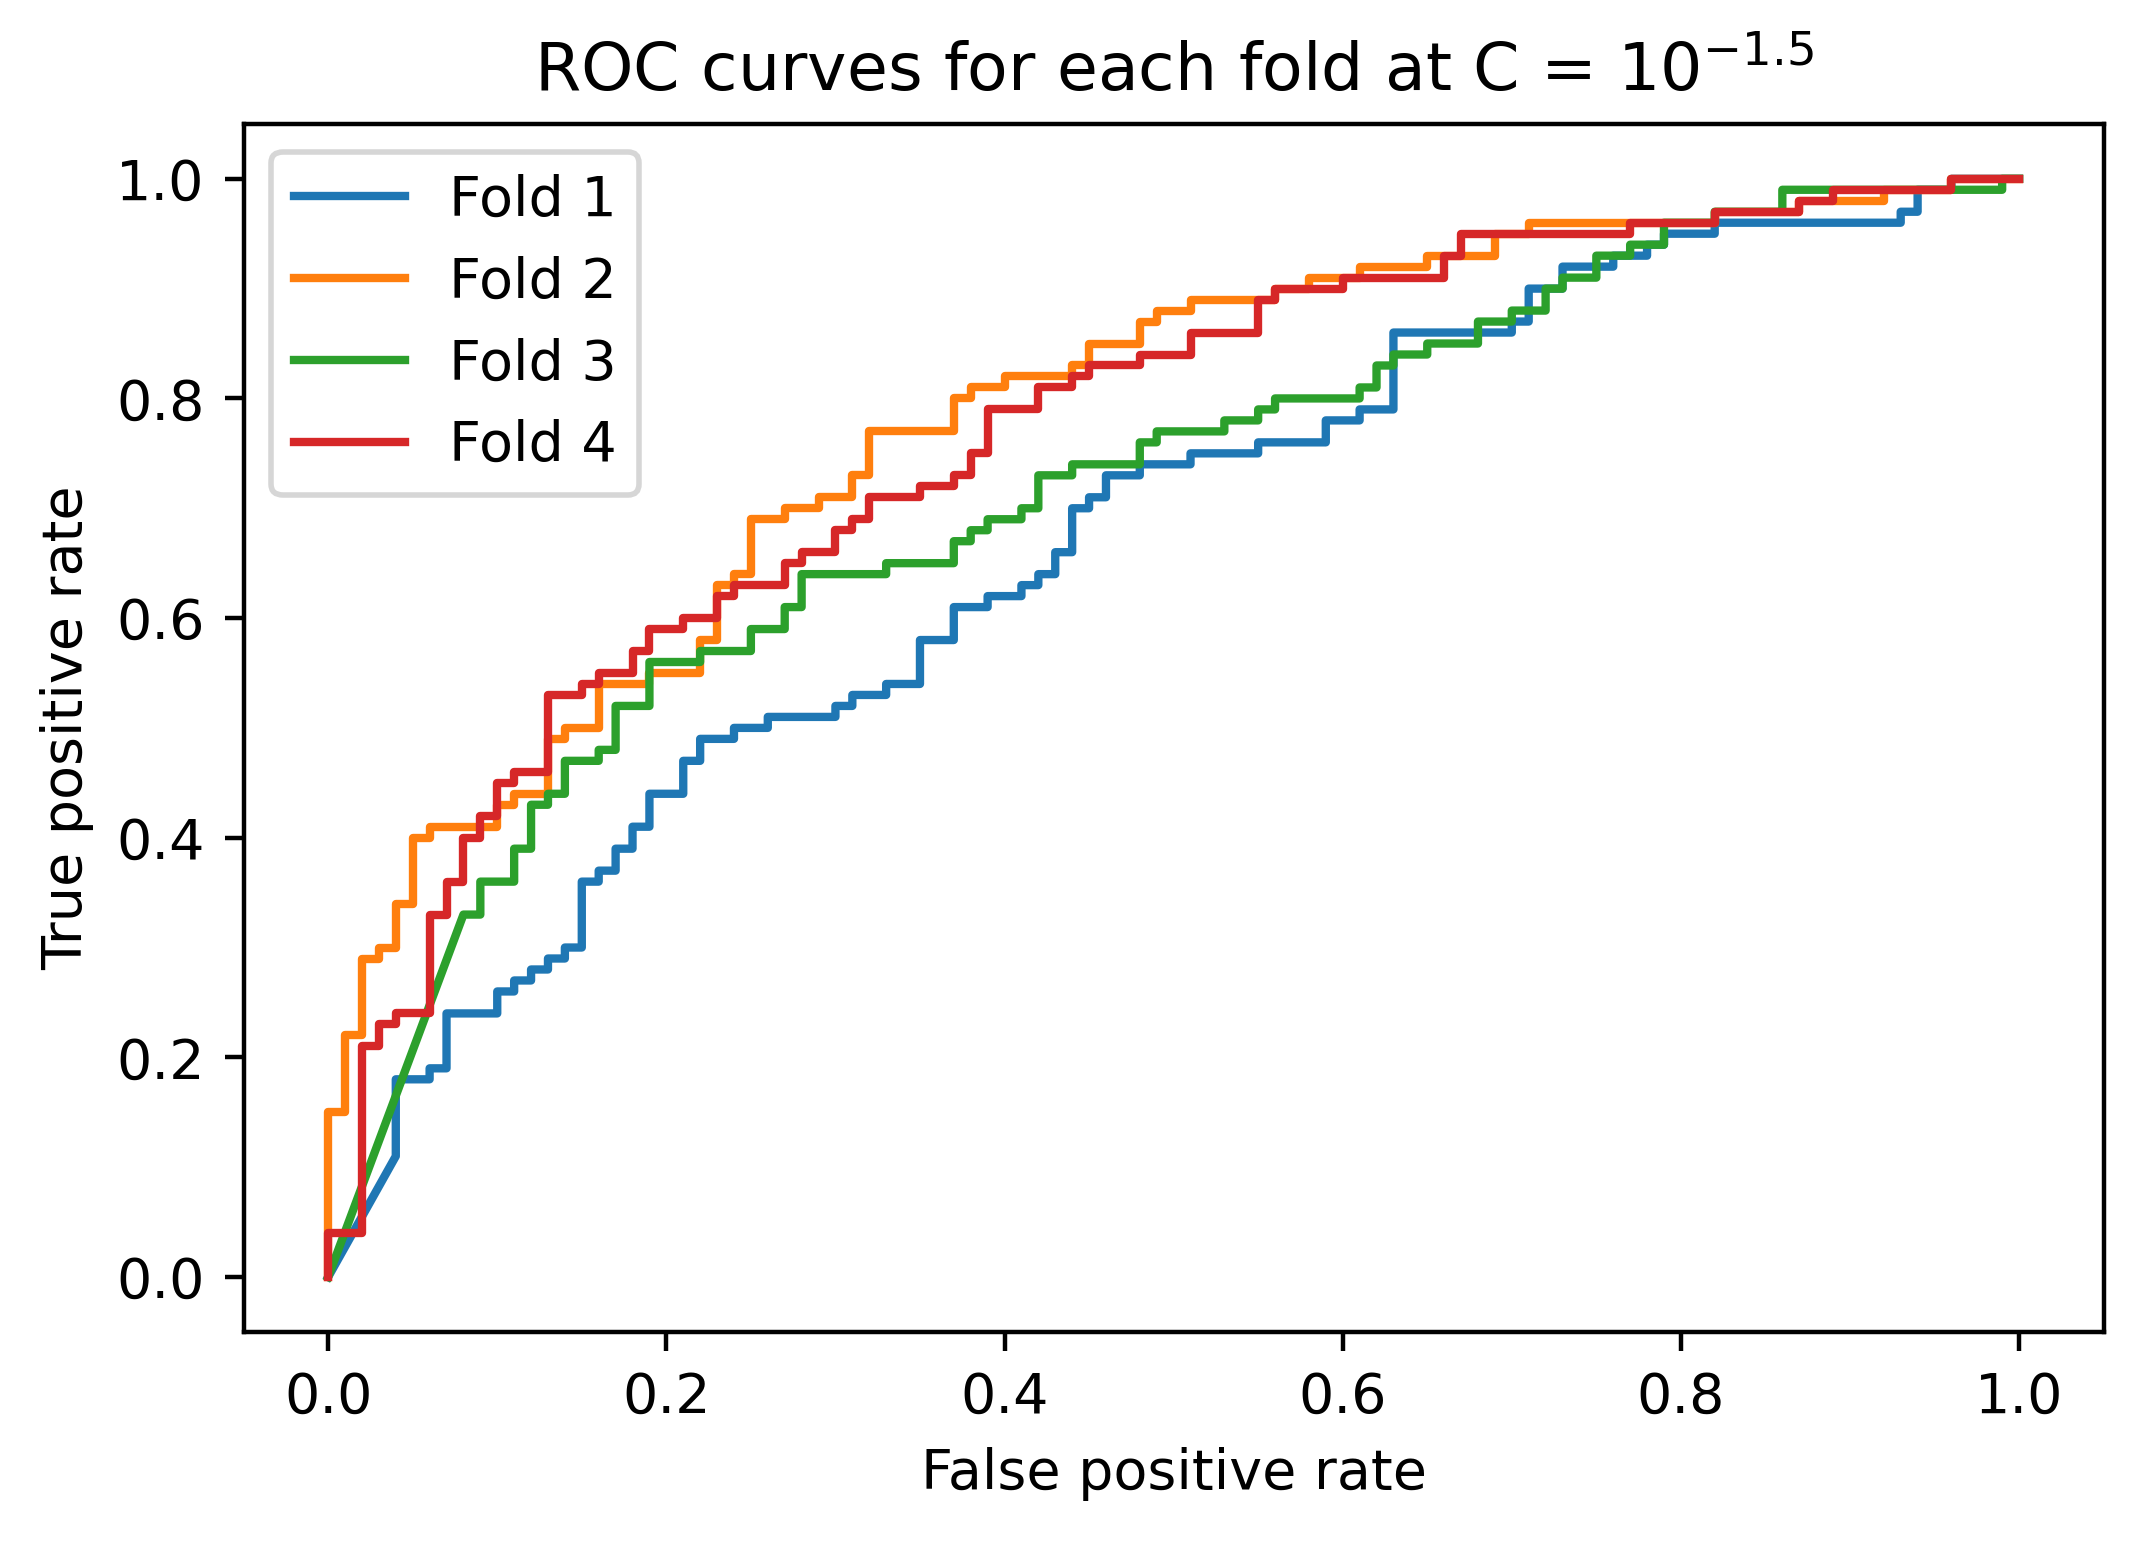

In [439]:
for this_fold in range(n_folds):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label='Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()

In [440]:
lr_syn.C = 10**(-1.5)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

In [441]:
LogisticRegression(C=0.03162277660168379, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.03162277660168379, multi_class='warn', penalty='l1',
                   random_state=1, solver='liblinear')

In [442]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.8802812499999999

In [443]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8847884788478848

In [444]:
sum((lr_syn.coef_ != 0)[0])

2

In [445]:
lr_syn.intercept_

array([0.])

In [446]:
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

In [447]:
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr_syn)])

In [448]:
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [449]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
!pip install graphviz
import graphviz #to visualize decision trees

In [450]:
features_response = df.columns.tolist()

In [451]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [452]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [537]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [538]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [539]:
dt.fit(X_train, y_train)
!pip install pydotplus
import pydotplus

In [548]:
!pip install graphviz
import graphviz
from graphviz import Digraph
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

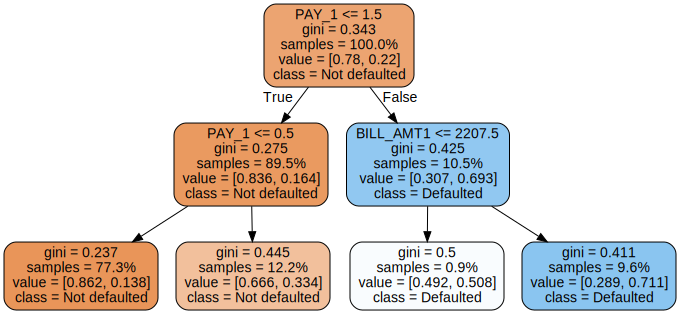

In [549]:
graph = graphviz.Source(dot_data) 
graph

In [458]:
features_response[:-1].index('PAY_1')

4

In [459]:
X_train.shape

(21583, 17)

In [460]:
sum(X_train[:,4] <= 1.5)/X_train.shape[0]

0.8953342908770792

In [461]:
np.mean(y_train)

0.21970995691053144

In [462]:
pm0 = np.linspace(0.01,0.99,99)

In [463]:
pm1 = 1 - pm0
misclassification_rate = np.minimum(pm0, pm1)

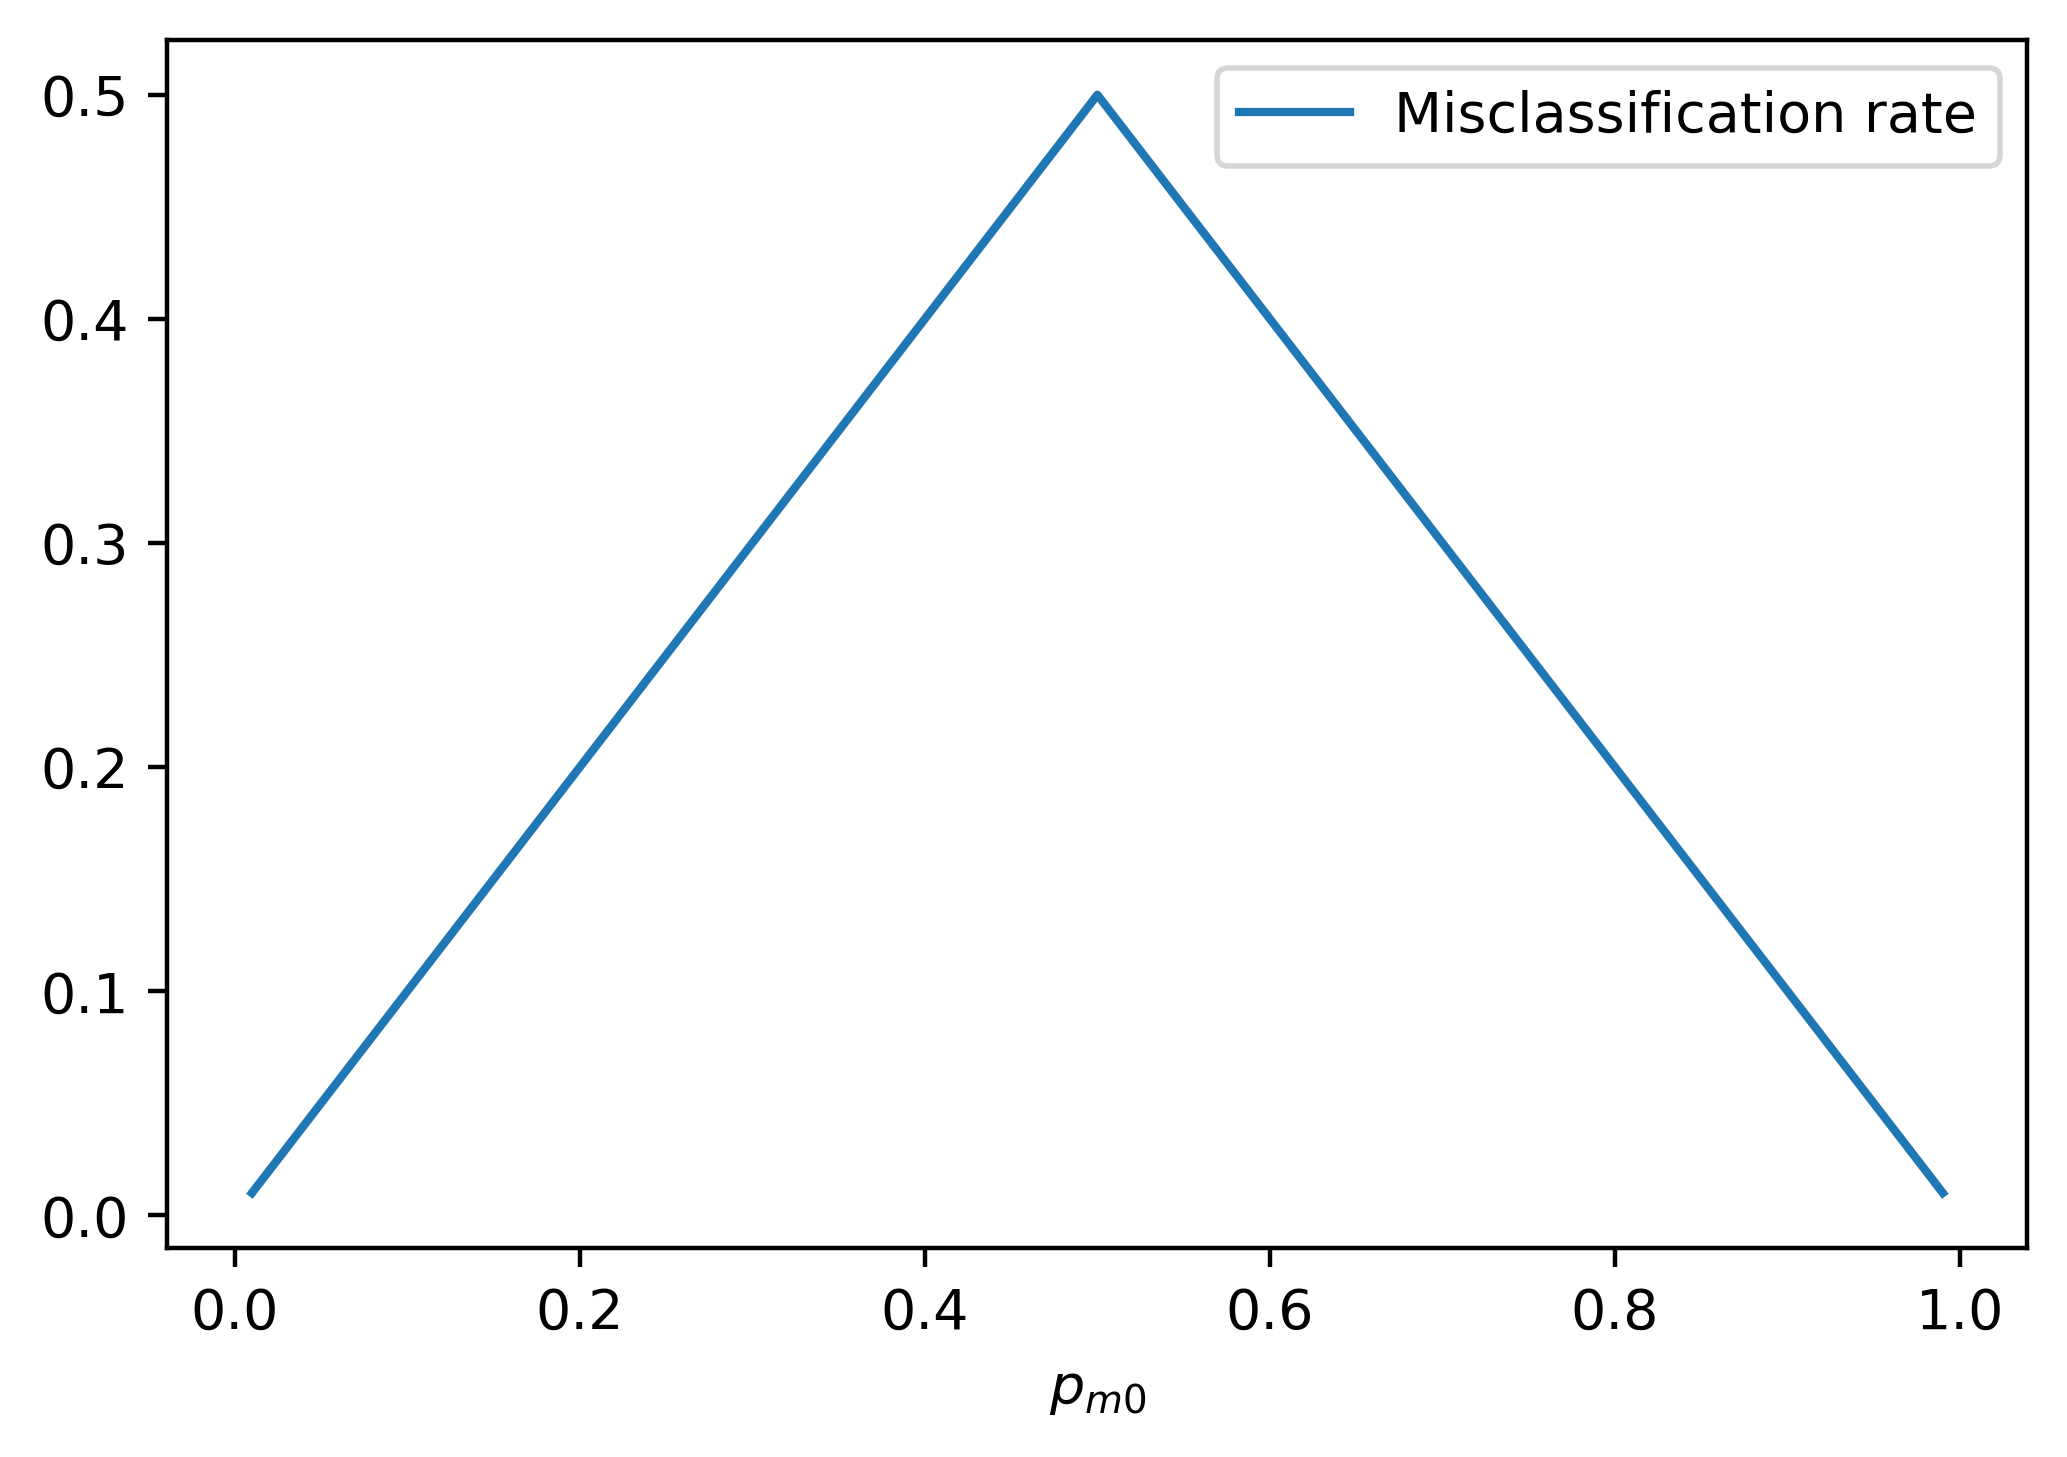

In [464]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

In [465]:
gini = (pm0*(1-pm0)) + (pm1*(1-pm1))

In [466]:
cross_ent = -1*((pm0*np.log(pm0)) + (pm1*np.log(pm1)))

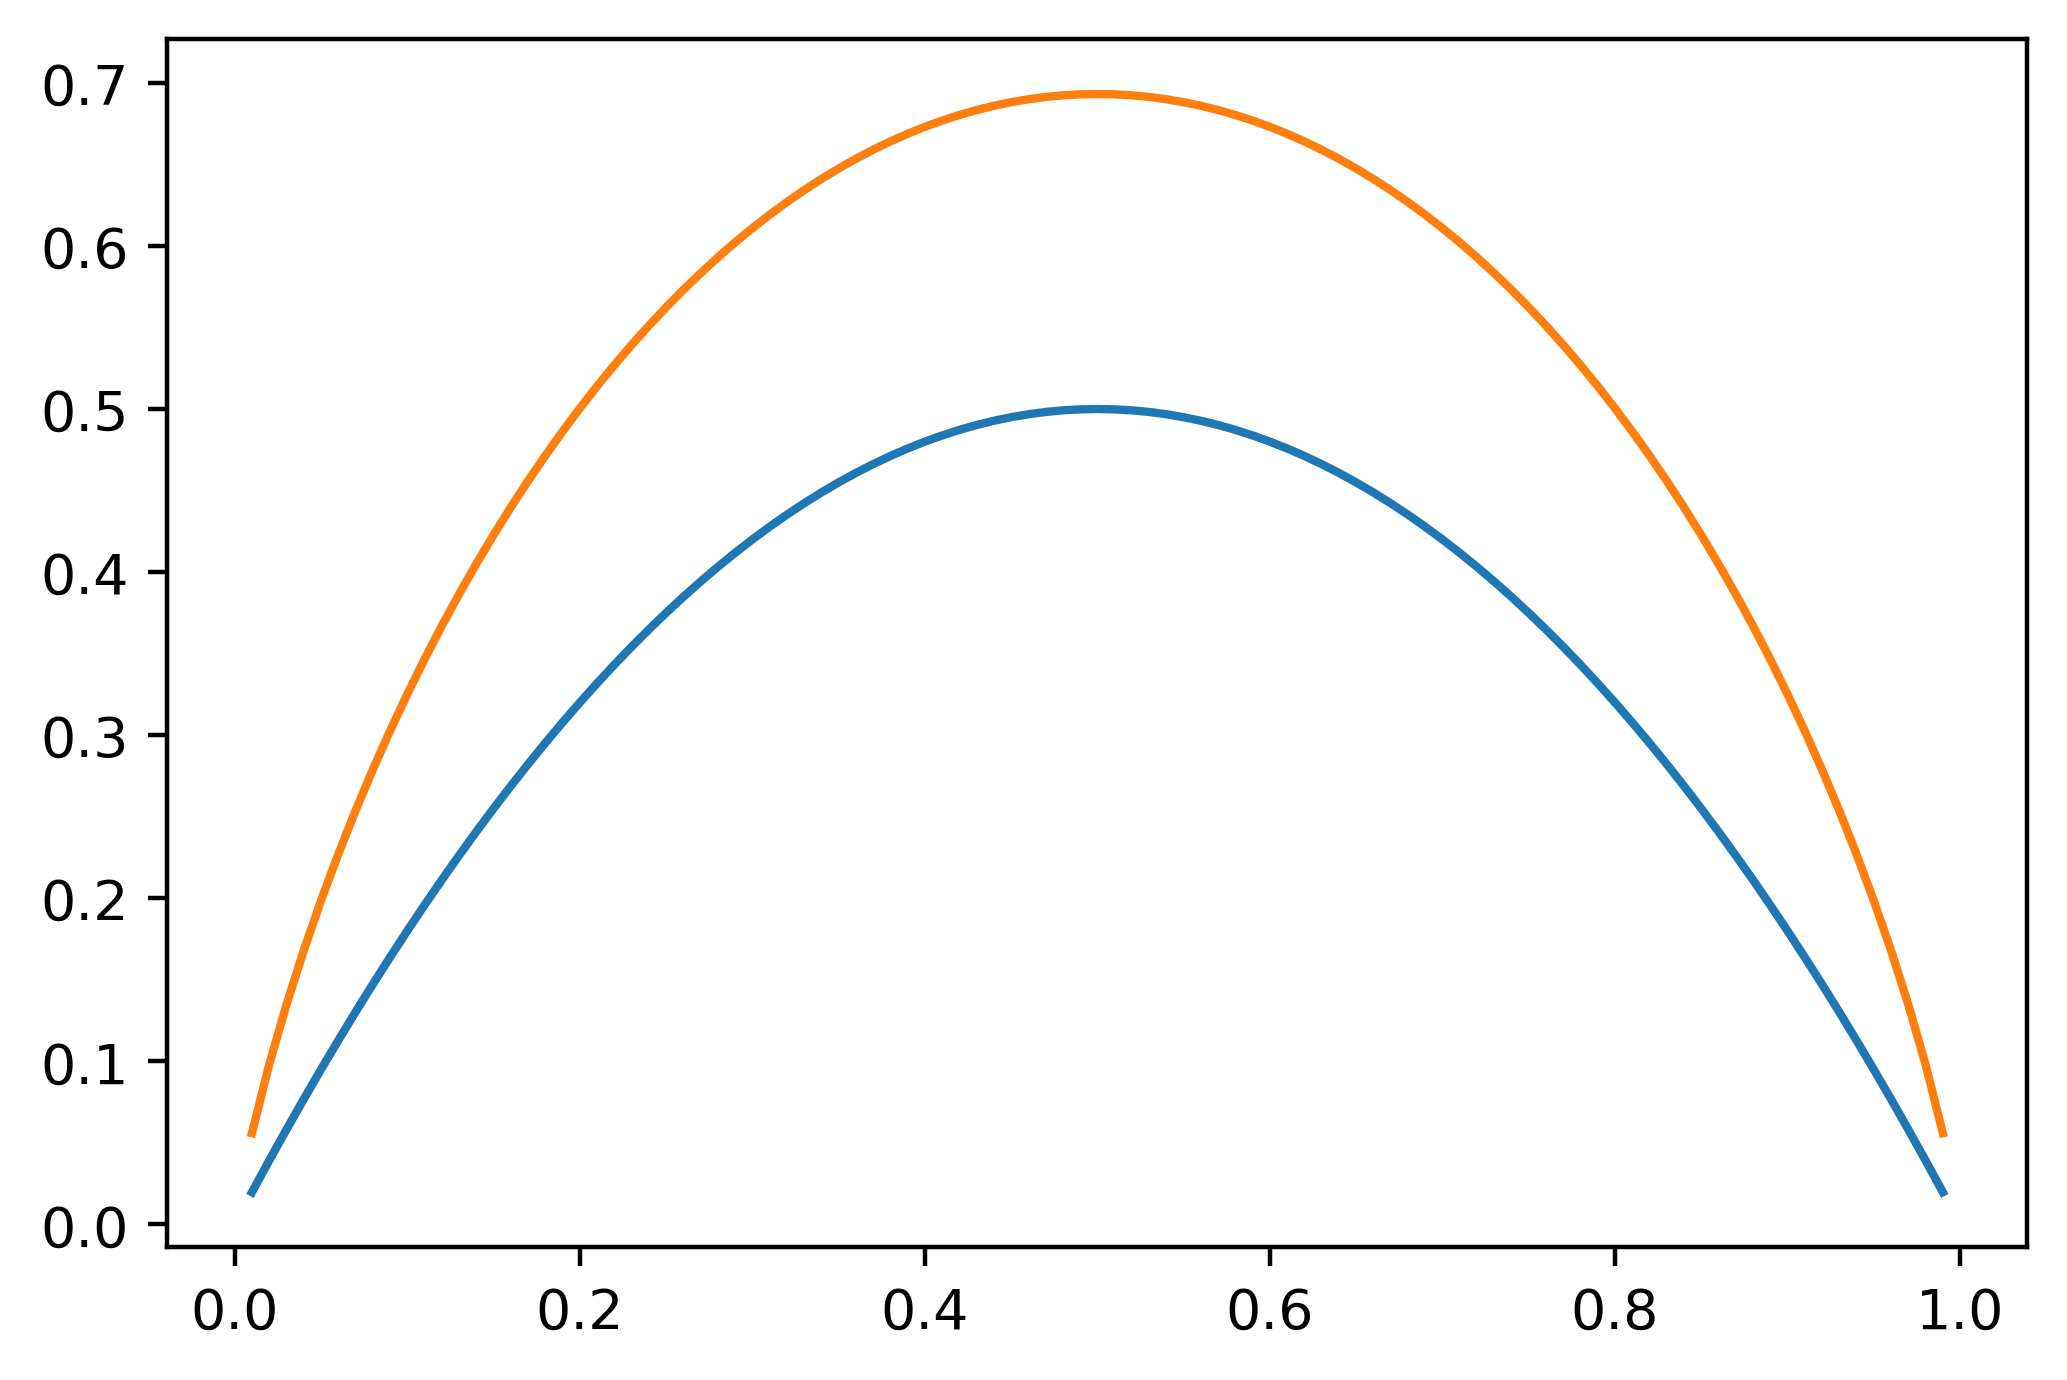

In [467]:
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')

In [468]:
from sklearn.model_selection import GridSearchCV
X_train.shape

(21583, 17)

In [469]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

In [470]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [471]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    2.9s finished
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2), iid=False,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [472]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.022179      0.003890         0.001995        0.000005   
1       0.037877      0.000717         0.002770        0.000846   
2       0.068816      0.000008         0.002496        0.000496   
3       0.098985      0.000434         0.002750        0.000430   
4       0.127423      0.000439         0.002991        0.000001   
5       0.153591      0.000001         0.002995        0.000004   
6       0.178762      0.000421         0.002744        0.000433   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               1   {'max_depth': 1}           0.655488           0.644317   
1               2   {'max_depth': 2}           0.708724           0.704521   
2               4   {'max_depth': 4}           0.759445           0.745320   
3               6   {'max_depth': 6}           0.767766           0.748381   
4               8   {'max_depth': 8}           0.758820           0.740254   
5              10  {'max_depth': 10}           0.733316           0.716437   
6              12  {'max_depth': 12}           0.695810           0.678307   

   split2_test_score  split3_test_score  mean_test_score  std_test_score  \
0           0.650421           0.627949         0.644544        0.010366   
1           0.699146           0.682065         0.698614        0.010140   
2           0.735722           0.732775         0.743316        0.010404   
3           0.738051           0.732594         0.746698        0.013420   
4           0.728220           0.726401         0.738424        0.012923   
5           0.713219           0.704345         0.716829        0.010499   
6           0.677414           0.681941         0.683368        0.007381   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.640899            0.644621   
1                5            0.695303            0.697079   
2                2            0.745931            0.747802   
3                1            0.767908            0.772099   
4                3            0.800605            0.805498   
5                4            0.836678            0.843917   
6                6            0.877075            0.883258   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.642586            0.650075          0.644545         0.003454  
1            0.698870            0.704360          0.698903         0.003393  
2            0.751549            0.755097          0.750095         0.003526  
3            0.775143            0.780963          0.774028         0.004757  
4            0.805052            0.806855          0.804503         0.002346  
5            0.841905            0.843006          0.841377         0.002804  
6            0.882896            0.884557          0.881947         0.002879

In [473]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

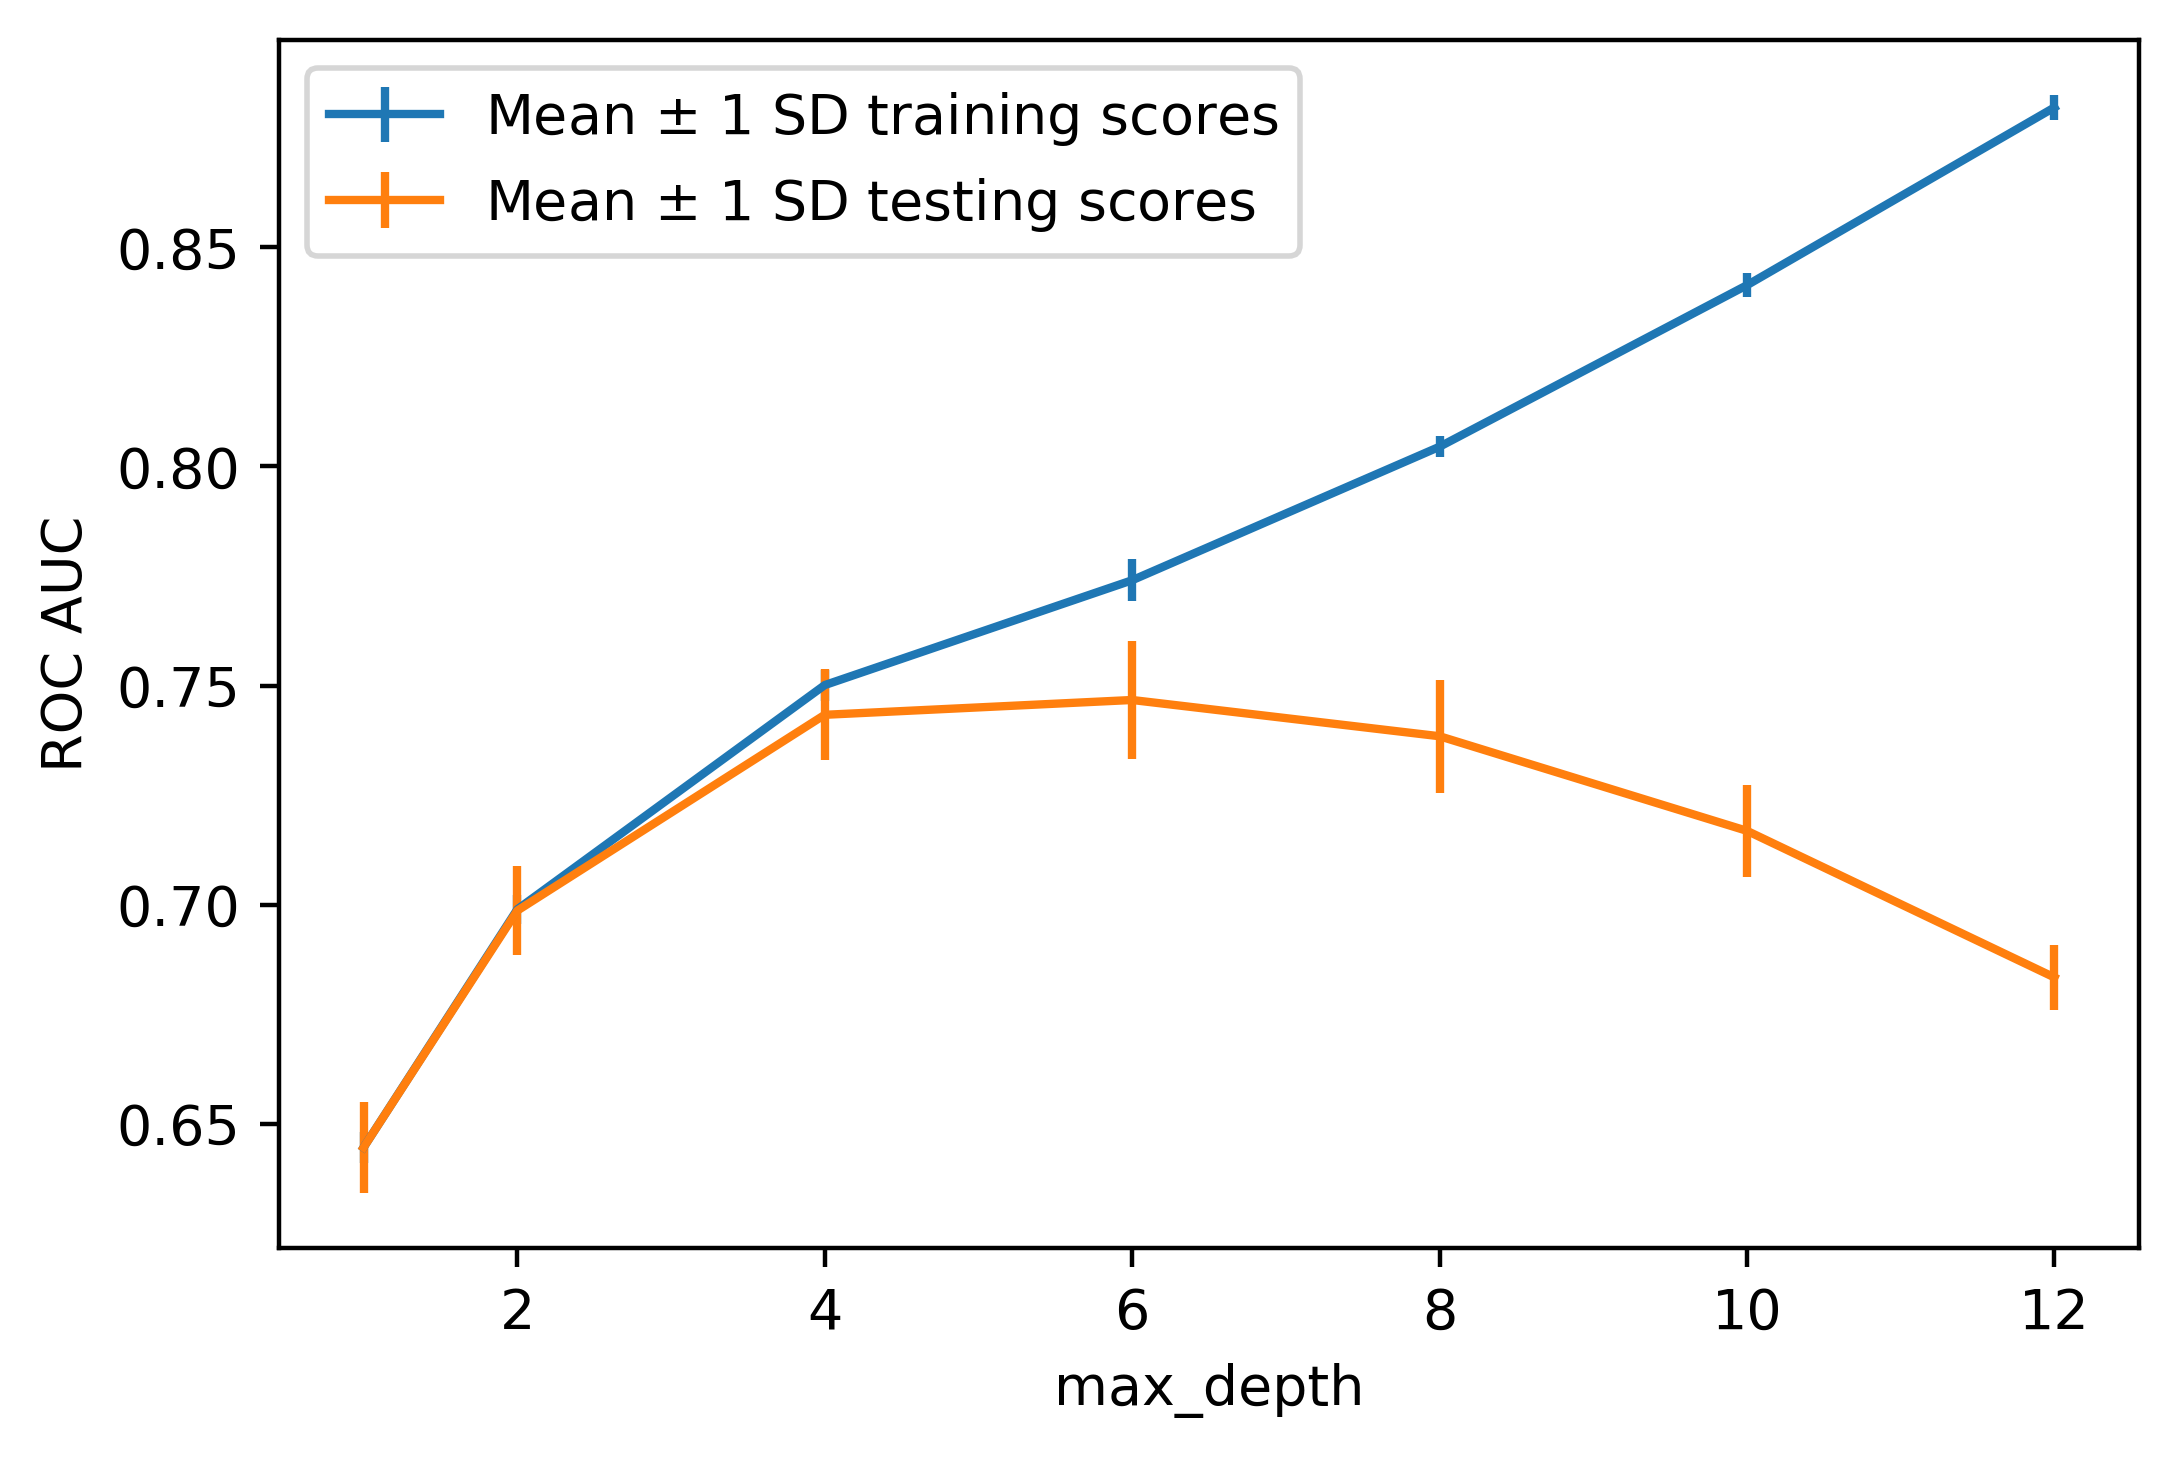

In [474]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [475]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None)

In [476]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [477]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [478]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   25.8s finished
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             iid=False,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [479]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

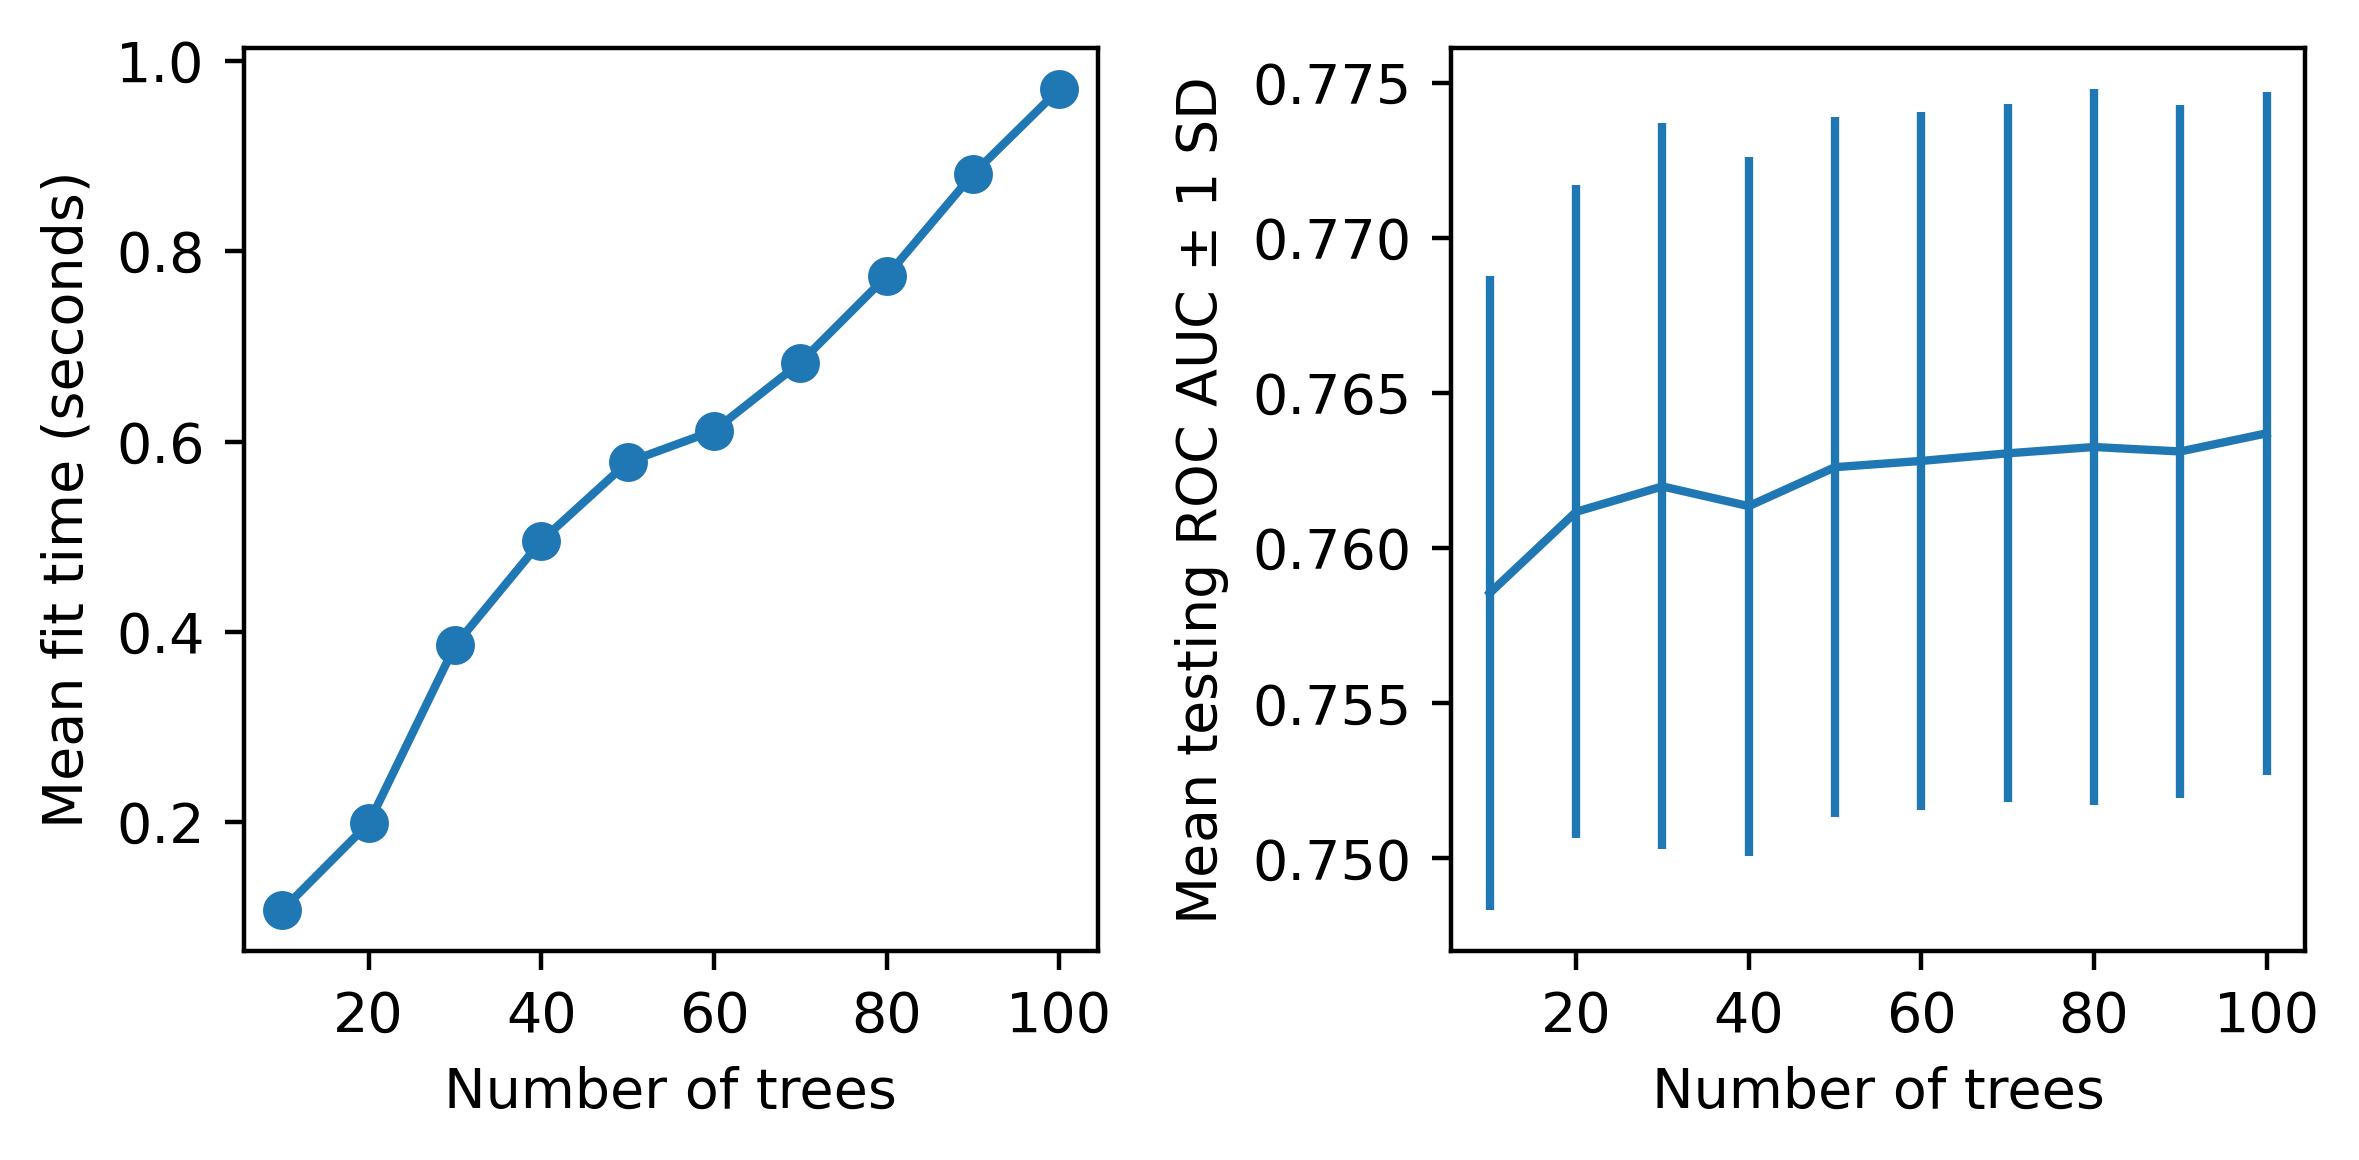

In [480]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [481]:
cv_rf_ex.best_params_

{'n_estimators': 100}

In [482]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending=False)

Feature name  Importance
4         PAY_1    0.623891
11     PAY_AMT1    0.082834
0     LIMIT_BAL    0.074765
12     PAY_AMT2    0.042287
13     PAY_AMT3    0.035158
14     PAY_AMT4    0.019284
1     EDUCATION    0.018959
6     BILL_AMT2    0.014846
8     BILL_AMT4    0.014525
15     PAY_AMT5    0.014295
10    BILL_AMT6    0.013019
16     PAY_AMT6    0.012051
7     BILL_AMT3    0.010744
5     BILL_AMT1    0.009448
3           AGE    0.007240
9     BILL_AMT5    0.005242
2      MARRIAGE    0.001410

In [483]:
xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [484]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Text(0, 0.5, 'Y coordinate')

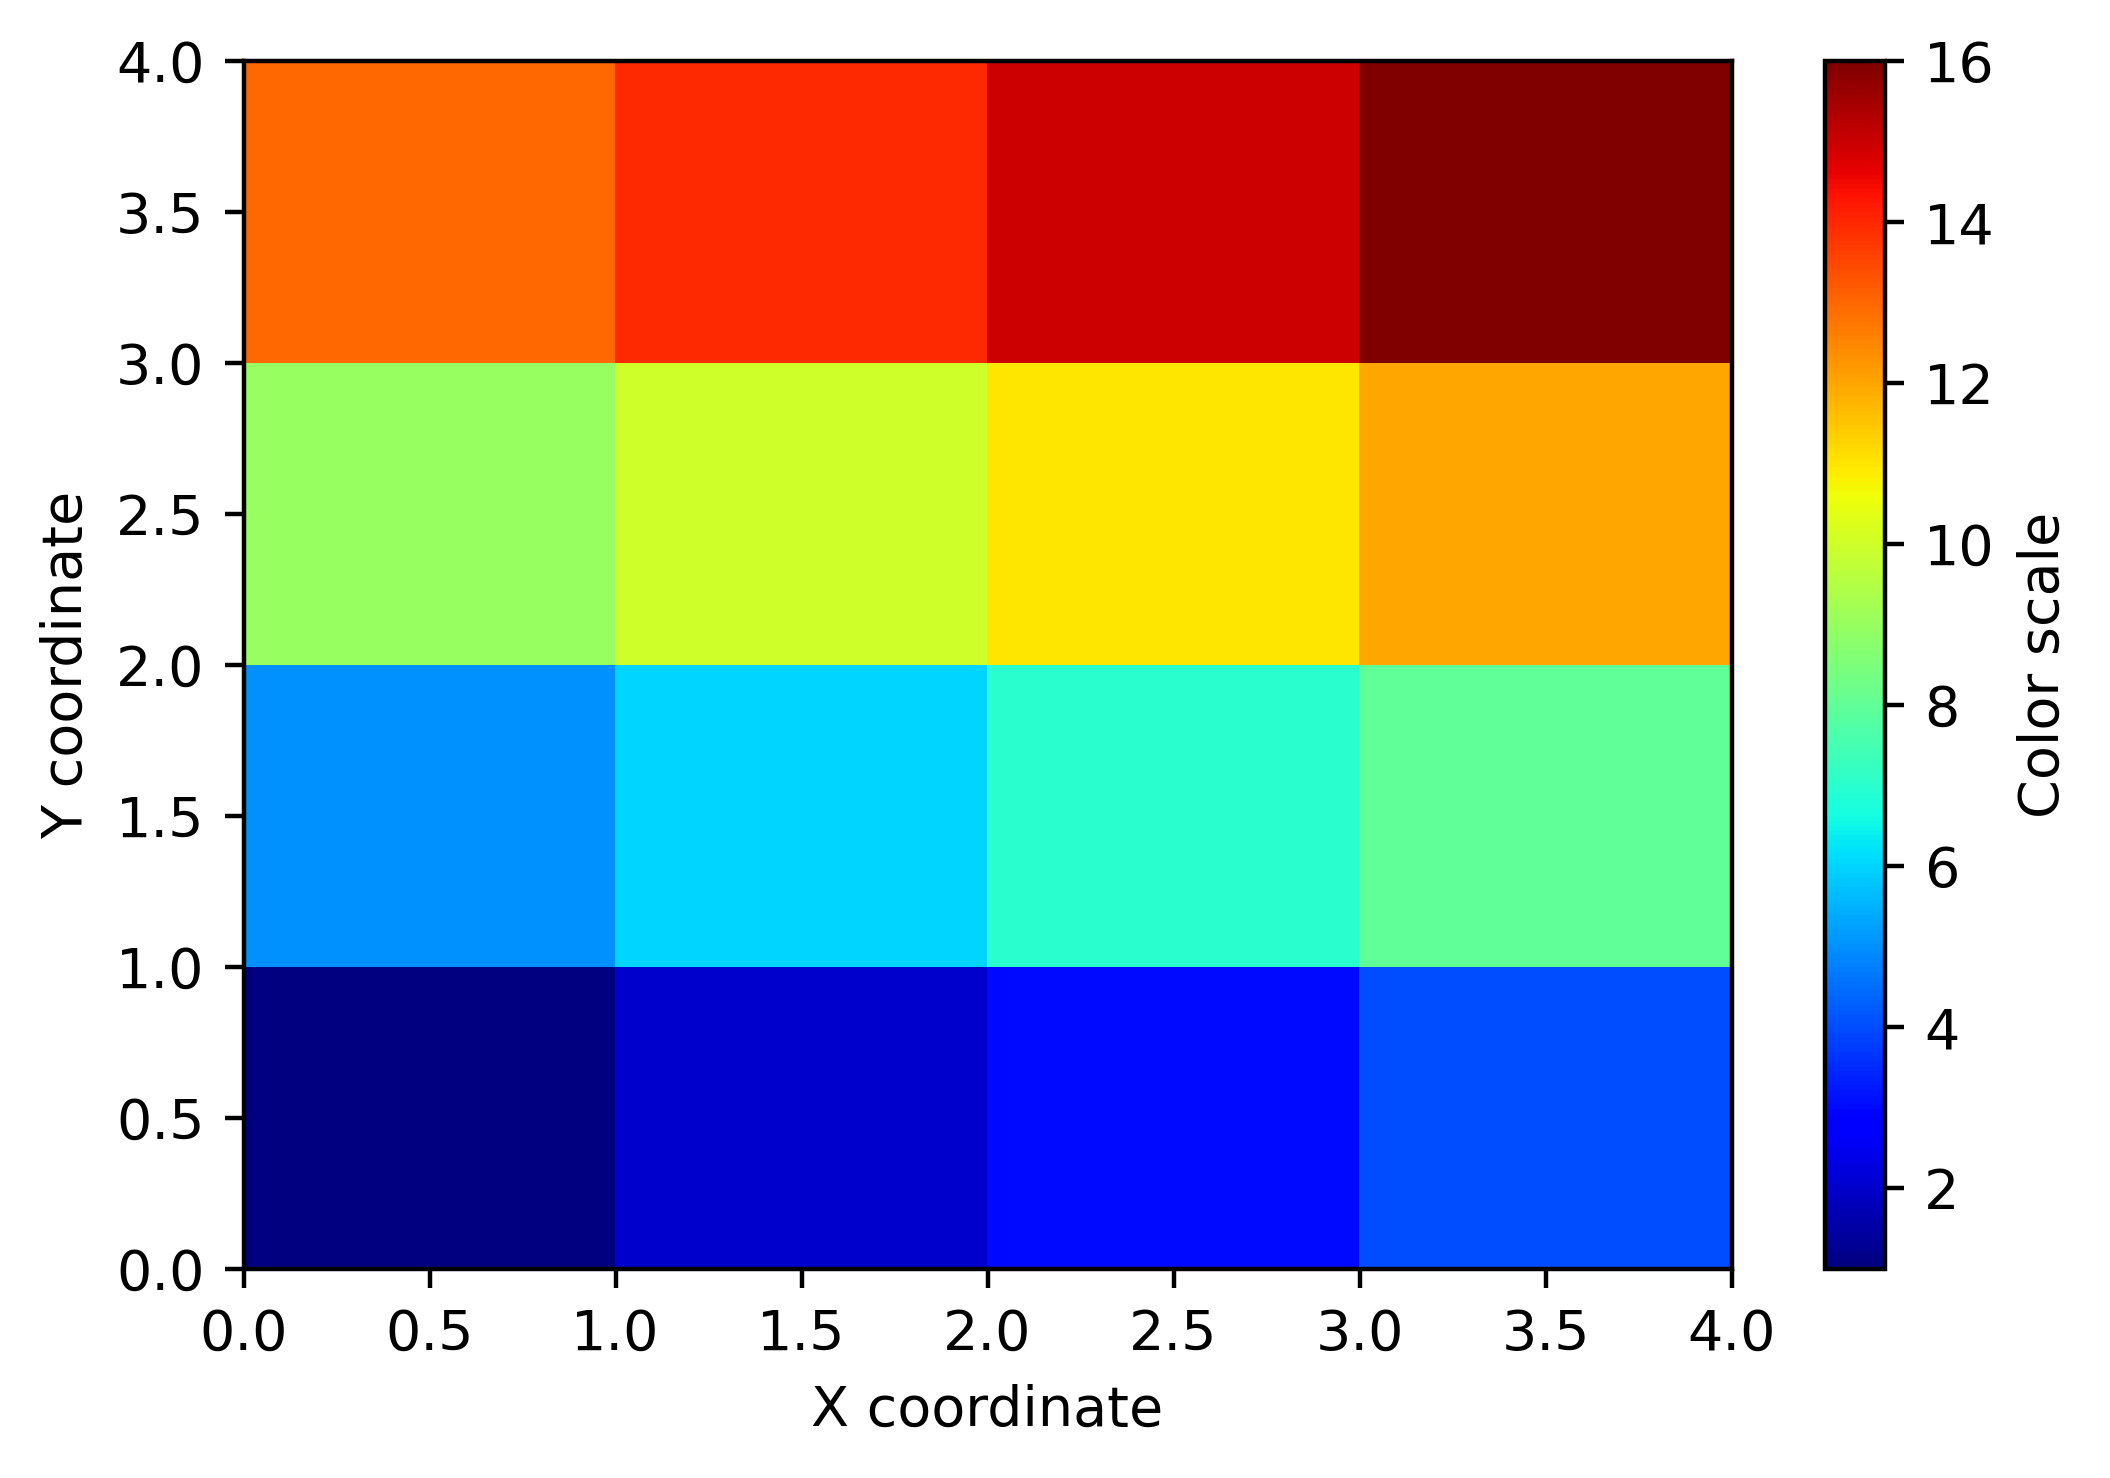

In [485]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

In [486]:
import pandas as pd
df_orig = pd.read_excel('default_of_credit_card_clients.xls')

In [487]:
df_zero_mask = df_orig == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [488]:
sum(feature_zero_mask)

315

In [489]:
df_clean = df_orig.loc[~feature_zero_mask,:].copy()
df_clean.shape

(29685, 25)

In [490]:
df_clean['ID'].nunique()

29685

In [491]:
df_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [492]:
df_clean['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [493]:
missing_pay_1_mask = df_clean['PAY_1'] == 'Not available'

In [494]:
sum(missing_pay_1_mask)

3021

In [495]:
df_missing_pay_1 = df_clean.loc[missing_pay_1_mask,:].copy()

In [496]:
df = pd.read_csv('cleaned_data.csv')

In [497]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [498]:
features_response = df.columns.tolist()

In [499]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [500]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [501]:
import numpy as np
from sklearn.model_selection import train_test_split

In [502]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [503]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21583, 17)
(5396, 17)
(21583,)
(5396,)


In [504]:
features_response[4]

'PAY_1'

In [505]:
np.median(X_train[:,4])

0.0

In [506]:
np.random.seed(seed=1)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,), replace=True)]

In [507]:
fill_strategy = ['mode', 'random']

In [508]:
fill_values[-1]

array([ 0,  0,  0, ...,  1, -1,  1], dtype=int64)

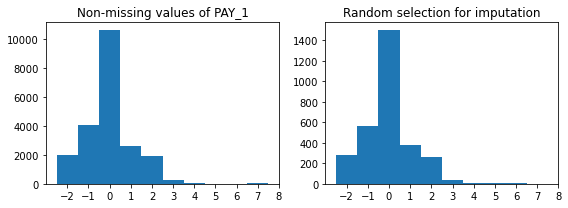

In [509]:
import matplotlib.pyplot as plt #plotting package
%matplotlib inline
fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4], bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(fill_values[-1], bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation')
plt.tight_layout()

In [510]:
from sklearn.model_selection import KFold
k_folds = KFold(n_splits=4, shuffle=True, random_state=1)

In [511]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200, criterion='gini', max_depth=9,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=1, warm_start=False, class_weight=None)

In [512]:
for counter in range(len(fill_values)):
    #Copy the data frame with missing PAY_1 and assign imputed values
    df_fill_pay_1_filled = df_missing_pay_1.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    #Split imputed data in to training and testing, using the same
    #80/20 split we have used for the data with non-missing PAY_1
    X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
    train_test_split(
        df_fill_pay_1_filled[features_response[:-1]].values,
        df_fill_pay_1_filled['default payment next month'].values,
    test_size=0.2, random_state=24)
    #Concatenate the imputed data with the array of non-missing data
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
    #Use the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
        cv=k_folds, n_jobs=-1, verbose=1,
        return_train_score=True, return_estimator=True,
        error_score='raise-deprecating')
 
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


mode imputation: mean testing score 0.7722864985184301, std 0.004671533355901269
random imputation: mean testing score 0.7698927874885768, std 0.005441816681109969


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   27.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   27.2s finished


In [513]:
pay_1_df = df.copy()

In [514]:
features_for_imputation = pay_1_df.columns.tolist()

In [515]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university', 'default payment next month', 'PAY_1']

In [516]:
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove]
features_for_imputation

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [517]:
X_impute_train, X_impute_test, y_impute_train, y_impute_test = \
train_test_split(
    pay_1_df[features_for_imputation].values,
    pay_1_df['PAY_1'].values,
test_size=0.2, random_state=24)

In [518]:
rf_impute_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [519]:
from sklearn.model_selection import GridSearchCV
cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring='accuracy', n_jobs=-1, iid=False, refit=True,
cv=4, verbose=2, error_score=np.nan, return_train_score=True)

In [521]:
cv_rf_impute.fit(X_impute_train, y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.6min finished
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.8s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=9, n_estimators=200,
                                              random_state=4, verbose=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [522]:
cv_rf_impute.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [523]:
cv_rf_impute.best_score_

0.7342814177391553

In [524]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()
pay_1_value_counts

-2     2476
-1     5047
 0    13402
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [525]:
pay_1_value_counts/pay_1_value_counts.sum()

-2    0.091775
-1    0.187071
 0    0.496757
 1    0.120872
 2    0.088143
 3    0.010823
 4    0.002335
 5    0.000853
 6    0.000408
 7    0.000334
 8    0.000630
Name: PAY_1, dtype: float64

In [526]:
y_impute_predict = cv_rf_impute.predict(X_impute_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [527]:
from sklearn import metrics
metrics.accuracy_score(y_impute_test, y_impute_predict)

0.752594514455152

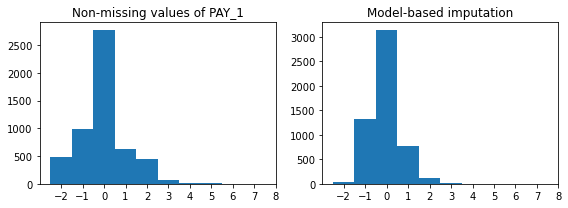

In [528]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()

In [529]:
X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values

In [530]:
rf_impute = RandomForestClassifier(n_estimators=100, max_depth=12)

In [531]:
rf_impute.fit(X_impute_all, y_impute_all)

RandomForestClassifier(max_depth=12)

In [532]:
df_fill_pay_1_model = df_missing_pay_1.copy()

In [533]:
df_fill_pay_1_model['PAY_1'].head()

17    Not available
28    Not available
29    Not available
54    Not available
60    Not available
Name: PAY_1, dtype: object

In [534]:
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)

In [551]:
df_fill_pay_1_model['PAY_1'].head()

17    0
28   -1
29    0
54    0
60    0
Name: PAY_1, dtype: int64

In [552]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      35
-1     763
 0    1722
 1     440
 2      50
 3       7
 4       2
 6       1
 7       1
Name: PAY_1, dtype: int64

In [553]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
    test_size=0.2, random_state=24)

In [554]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)

In [555]:
rf

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=4, verbose=1)

In [556]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
cv=k_folds, n_jobs=-1, verbose=1,
    return_train_score=True, return_estimator=True,
    error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.7s finished


In [557]:
np.mean(imputation_compare_cv['test_score'])

0.7726185453664808

In [558]:
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)

In [559]:
df_fill_pay_1_model['PAY_1'].unique()

array([0], dtype=int64)

In [560]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [561]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [562]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
cv=k_folds, n_jobs=-1, verbose=1,
    return_train_score=True, return_estimator=True,
    error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.6s finished


In [563]:
np.mean(imputation_compare_cv['test_score'])

0.7722864985184301

In [564]:
rf.fit(X_train_all, y_train_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.1s finished


RandomForestClassifier(max_depth=9, n_estimators=200, random_state=4, verbose=1)

In [565]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [566]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])

0.7820680544835993

In [567]:
thresholds = np.linspace(0, 1, 101)

In [568]:
df[features_response[:-1]].columns[5]

'BILL_AMT1'

In [569]:
savings_per_default = np.mean(X_test_all[:, 5])
savings_per_default

51794.04182636227

In [570]:
cost_per_counseling = 7500

In [571]:
effectiveness = 0.70

In [572]:
n_pos_pred = np.empty_like(thresholds)
cost_of_all_counselings = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
savings_of_all_counselings = np.empty_like(thresholds)
savings_based_on_balances = np.empty_like(thresholds)

In [573]:
counter = 0
for threshold in thresholds:
    pos_pred = y_test_all_predict_proba[:,1]>threshold
    n_pos_pred[counter] = sum(pos_pred)
    cost_of_all_counselings[counter] = n_pos_pred[counter] * cost_per_counseling
    true_pos = pos_pred & y_test_all.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    savings_of_all_counselings[counter] = n_true_pos[counter] * savings_per_default * effectiveness
    counter += 1


In [574]:
net_savings = savings_of_all_counselings - cost_of_all_counselings

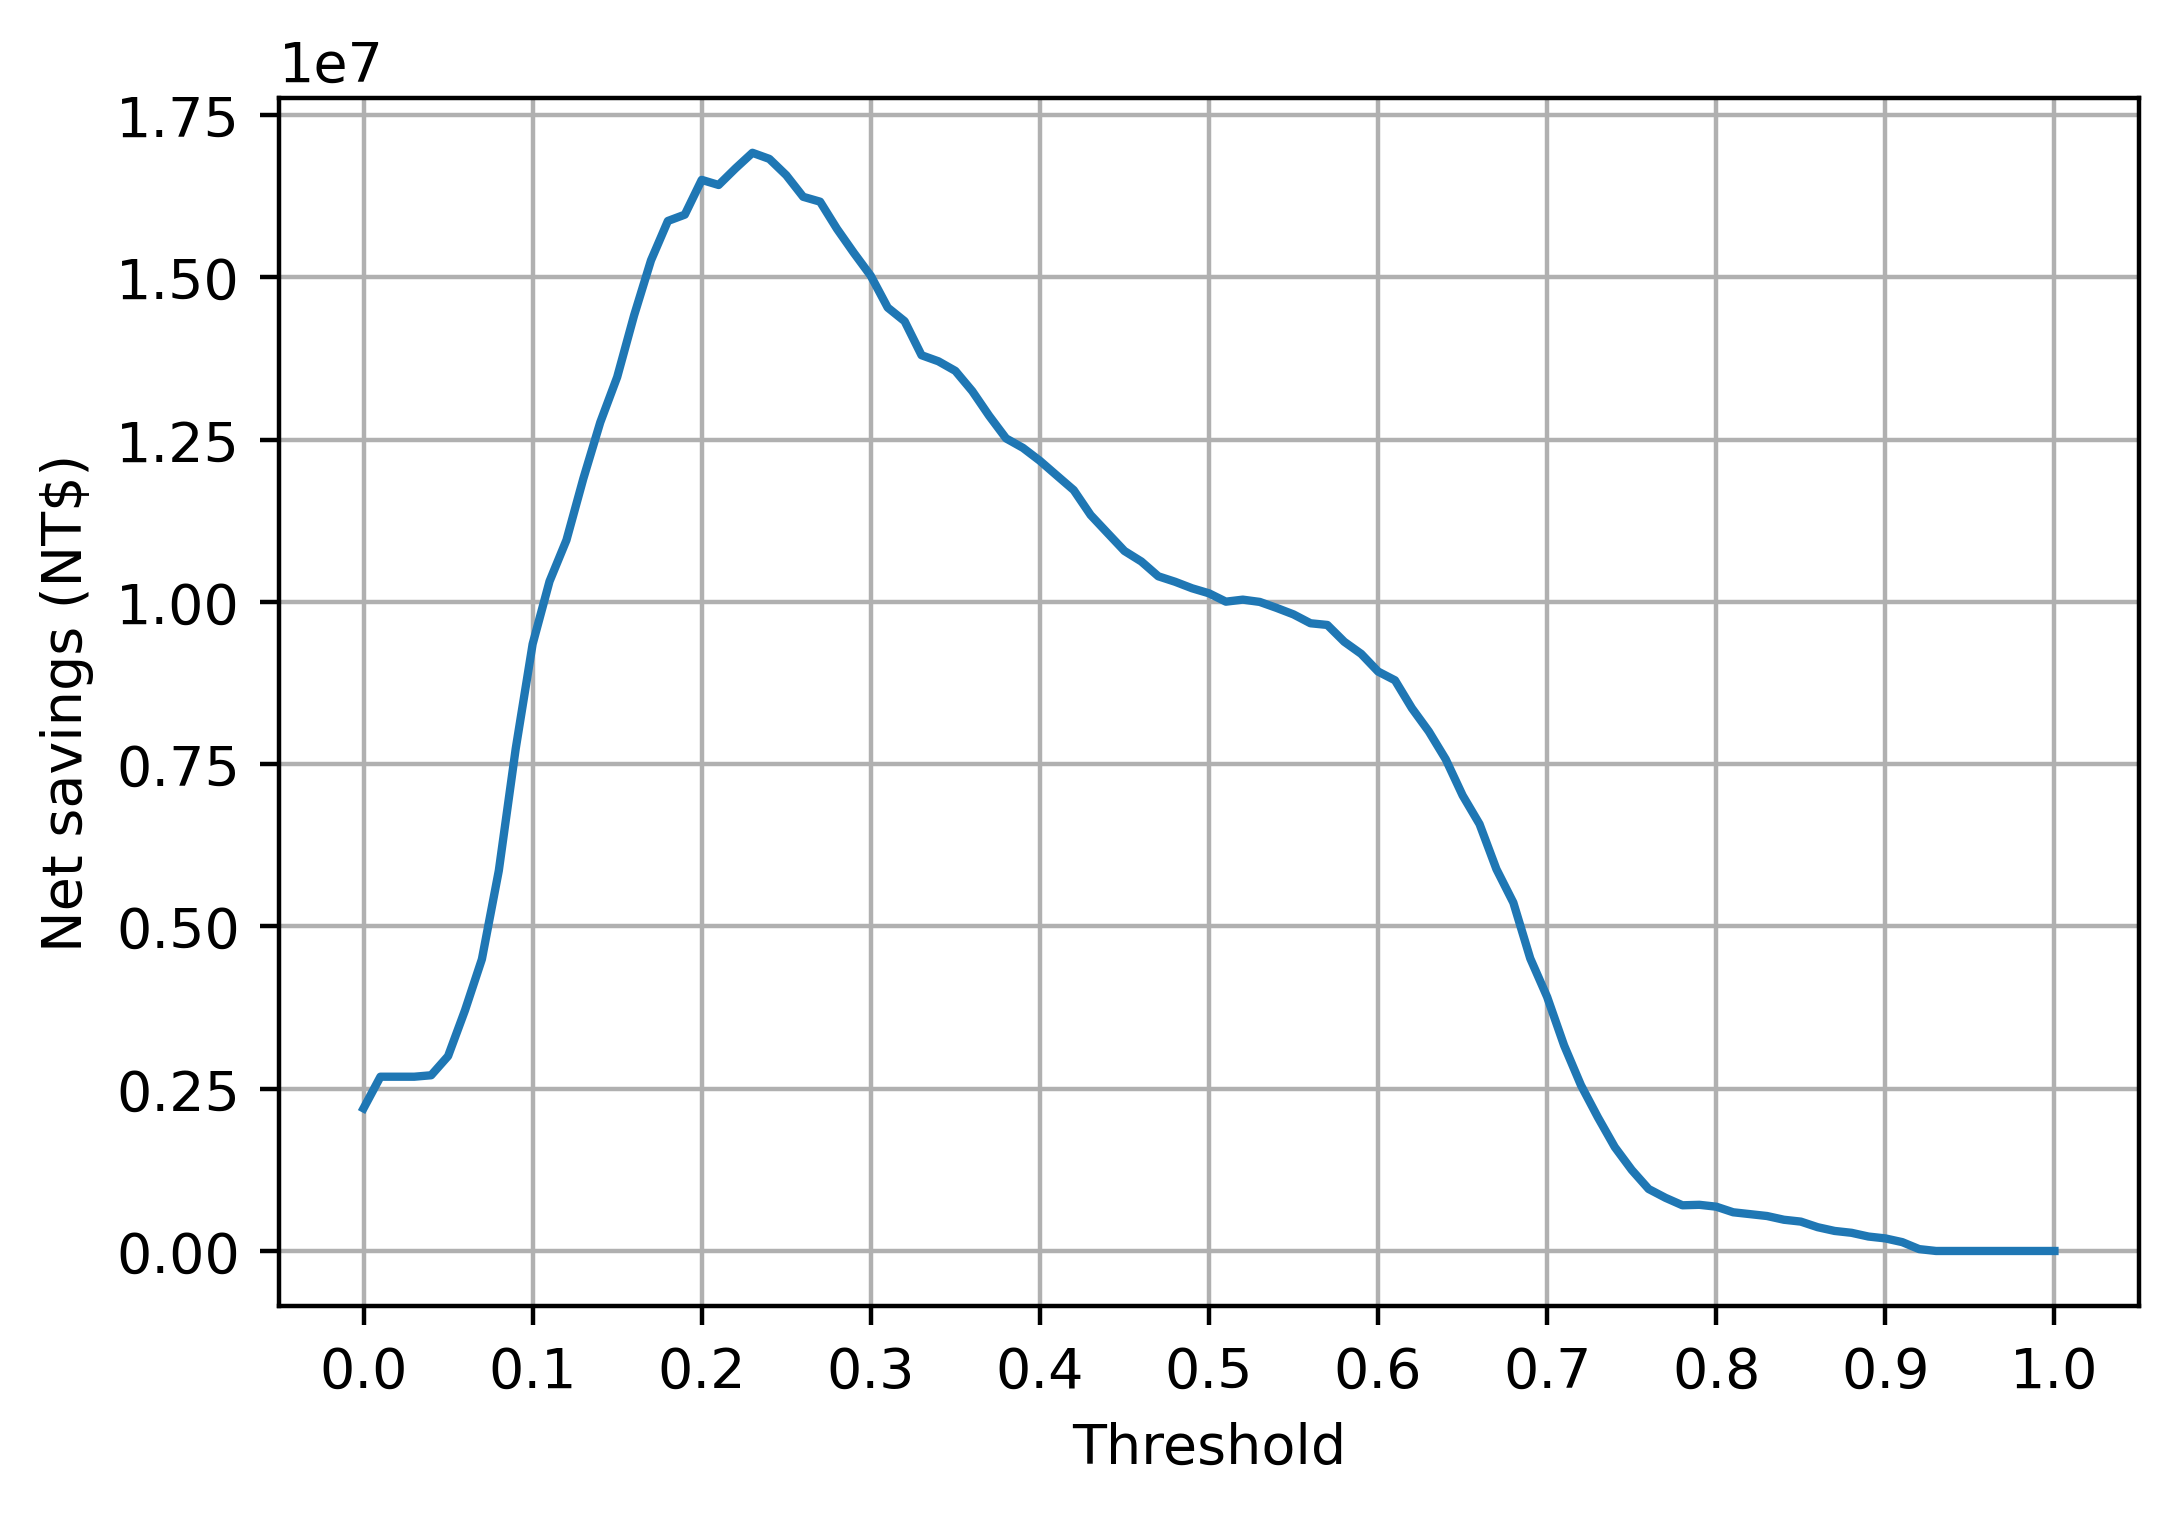

In [575]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

In [576]:
max_savings_ix = np.argmax(net_savings)

In [577]:
thresholds[max_savings_ix]

0.23

In [578]:
net_savings[max_savings_ix]

16921059.154724207

Text(0, 0.5, 'Number of accounts')

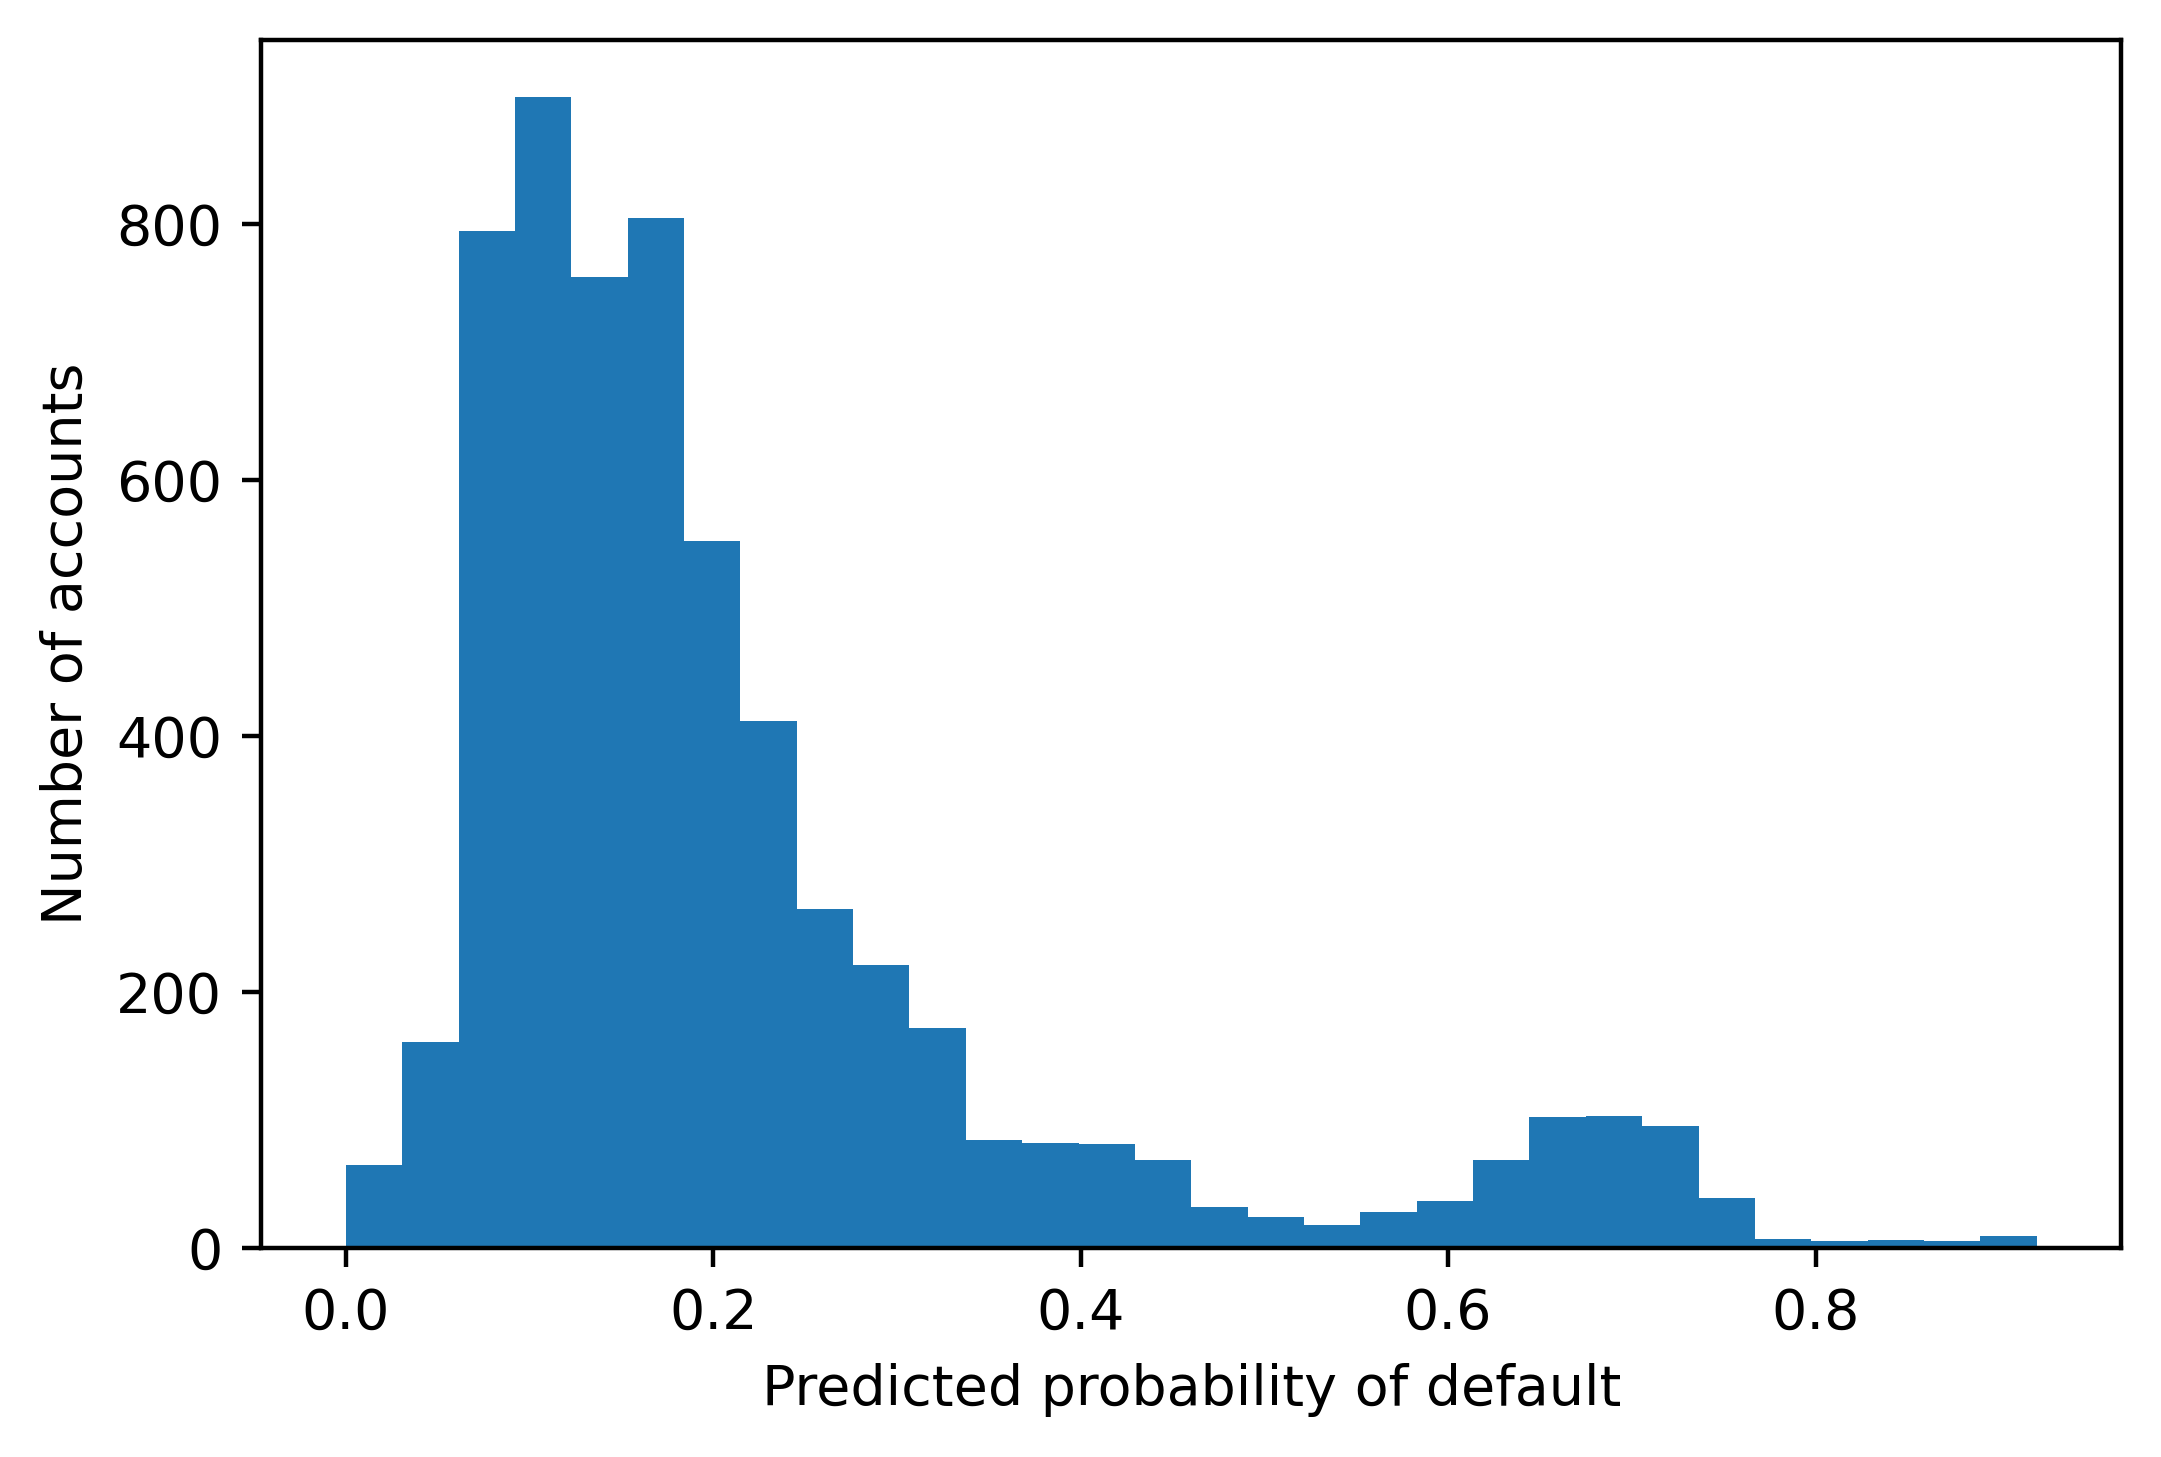

In [579]:
plt.hist(y_test_all_predict_proba[:,1], bins=30)
plt.xlabel('Predicted probability of default')
plt.ylabel('Number of accounts')